# Project title - **Student Dropout Prediction**

### **Team members:** 
- Baidrakhman Zere
- Ilyassova Akerke
- Kalmaganbetova Aziza

### **Course:** Machine Learning

### **Course:** Machine Learning

### **Instructor:** Professor Dr. Abdul Razaque, PhD & Postdoc 

### Project description:

The Student Dropout Prediction project focuses on identifying students who are at risk of dropping out from educational programs. Using historical academic, demographic, and behavioral data, the project applies machine learning techniques to predict potential dropouts. This helps educational institutions implement timely interventions, improve student retention, and enhance overall academic success.

### Objective:

The main objective of this project is to develop a predictive model that accurately identifies students at risk of dropout, enabling educational institutions to provide targeted support and reduce dropout rates.

### 1. Introduction and Problem Statement
Student attrition is a serious problem for higher education institutions worldwide.
#### Early identification of students at high risk of attrition allows for:
 - Timely provision of academic and psychological support
 - Reduction of financial losses for students and the university
 - Improvement of academic performance and the university's reputation

### Project Goals:
1. Build a machine learning model to predict student dropout risk
2. Identify key factors influencing dropout probability
3. Develop practical recommendations for educational institutions

### **Project implementation:**
#### 1. Importing the required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Scikit-learn components

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report, roc_auc_score,
                           roc_curve, auc, precision_recall_curve)

#### Machine learning models 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                            AdaBoostClassifier, VotingClassifier, StackingClassifier,
                            BaggingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#### To handle class imbalances

In [13]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline

#### To analyze the importance of features

In [14]:
!pip install eli5

In [15]:
import eli5
from eli5.sklearn import PermutationImportance

#### Display settings

In [16]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
%matplotlib inline

print("All libraries successfully imported!")

All libraries successfully imported!


### 2. Loading the dataset

In [24]:
import pandas as pd

df = pd.read_csv('data.csv', sep=';')
print(f" Data were uploaded: {df.shape[0]} rowss, {df.shape[1]} columns")
print(f" Data sample:")
print(df.head(2))
print(f"Total students: {len(df)}")  
print(f"Columns: {len(df.columns)}") 
print(f"Target variable: {df['Target'].unique()}") 

 Data were uploaded: 4424 rowss, 37 columns
 Data sample:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   

 

### 3. Initial data analysis

- The data is entirely numeric, except for Target and Quadrant
- No gaps → the dataset is clean
- Most features are categorical, encoded as numbers → it is important to handle scaling correctly
- The Target is multi-class (Dropout, Graduate, Enrolled)
- Semester features (Curricular units) have high variability → potentially strong predictors

In [75]:
print("\n" + "-"*30)
print(" INITIAL DATA ANALYS")
print("-"*30)

print(f"\n Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")

print(f"\n 1st 5 rows:")
display(df.head())

print(f"\n Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print(f"\n Data types:")
print(df.dtypes.value_counts())

print(f"\n Missing values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
}).sort_values('Missing Values', ascending=False)

if missing_df['Missing Values'].sum() > 0:
    display(missing_df[missing_df['Missing Values'] > 0])
else:
    print("No missing values!")

print(f"\n Descriptive statistics for numerical features:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    display(df[numeric_cols].describe().round(2))
else:
    print("No numerical features found")


------------------------------
 INITIAL DATA ANALYS
------------------------------

 Dataset size: 4424 rows, 38 columns

 1st 5 rows:


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0                      12  ...                                    0   
1                       3  ...                                    6   
2                      37  ...                                    6   
3                      37  ...                                    6   
4                      38  ...                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  Quadrant  
0             1.4  1.74   Dropout        Q3  
1            -0.3  0.79  Graduate        Q1  
2             1.4  1.74   Dropout        Q3  
3            -0.8 -3.12  Graduate        Q1  
4            -0.3  0.79  Graduate        Q1  

[5 rows x 38 columns]


 Column names:
 1. Marital status
 2. Application mode
 3. Application order
 4. Course
 5. Daytime/evening attendance	
 6. Previous qualification
 7. Previous qualification (grade)
 8. Nacionality
 9. Mother's qualification
10. Father's qualification
11. Mother's occupation
12. Father's occupation
13. Admission grade
14. Displaced
15. Educational special needs
16. Debtor
17. Tuition fees up to date
18. Gender
19. Scholarship holder
20. Age at enrollment
21. International
22. Curricular units 1st sem (credited)
23. Curricular units 1st sem (enrolled)
24. Curricular units 1st sem (evaluations)
25. Curricular units 1st sem (approved)
26. Curricular units 1st sem (grade)
27. Curricular units 1st sem (without evaluations)
28. Curricular units 2nd sem (credited)
29. Curricular units 2nd sem (enrolled)
30. Curricular units 2nd sem (evaluations)
31. Curricular units 2nd sem (approved)
32. Curricular units 2nd sem (grade)
33. Curricular units 2nd sem (without evaluations)
34. Unemployment rat

Marital status  Application mode  Application order   Course  \
count         4424.00           4424.00            4424.00  4424.00   
mean             1.18             18.67               1.73  8856.64   
std              0.61             17.48               1.31  2063.57   
min              1.00              1.00               0.00    33.00   
25%              1.00              1.00               1.00  9085.00   
50%              1.00             17.00               1.00  9238.00   
75%              1.00             39.00               2.00  9556.00   
max              6.00             57.00               9.00  9991.00   

       Daytime/evening attendance\t  Previous qualification  \
count                       4424.00                 4424.00   
mean                           0.89                    4.58   
std                            0.31                   10.22   
min                            0.00                    1.00   
25%                            1.00                    1.00   
50%                            1.00                    1.00   
75%                            1.00                    1.00   
max                            1.00                   43.00   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                         4424.00      4424.00                 4424.00   
mean                           132.61         1.87                   19.56   
std                             13.19         6.91                   15.60   
min                             95.00         1.00                    1.00   
25%                            125.00         1.00                    2.00   
50%                            133.10         1.00                   19.00   
75%                            140.00         1.00                   37.00   
max                            190.00       109.00                   44.00   

       Father's qualification  ...  \
count                 4424.00  ...   
mean                    22.28  ...   
std                     15.34  ...   
min                      1.00  ...   
25%                      3.00  ...   
50%                     19.00  ...   
75%                     37.00  ...   
max                     44.00  ...   

       Curricular units 1st sem (without evaluations)  \
count                                         4424.00   
mean                                             0.14   
std                                              0.69   
min                                              0.00   
25%                                              0.00   
50%                                              0.00   
75%                                              0.00   
max                                             12.00   

       Curricular units 2nd sem (credited)  \
count                              4424.00   
mean                                  0.54   
std                                   1.92   
min                                   0.00   
25%                                   0.00   
50%                                   0.00   
75%                                   0.00   
max                                  19.00   

       Curricular units 2nd sem (enrolled)  \
count                              4424.00   
mean                                  6.23   
std                                   2.20   
min                                   0.00   
25%                                   5.00   
50%                                   6.00   
75%                                   7.00   
max                                  23.00   

       Curricular units 2nd sem (evaluations)  \
count                                 4424.00   
mean                                     8.06   
std                                      3.95   
min                                      0.00   
25%                                      6.00   
50%                                      8.00   
75%                                     10.00   
max              

### 3.1 Target variable analysis


Target variable distribution:


Count  Percentage
Target                     
Graduate   2209       49.93
Dropout    1421       32.12
Enrolled    794       17.95

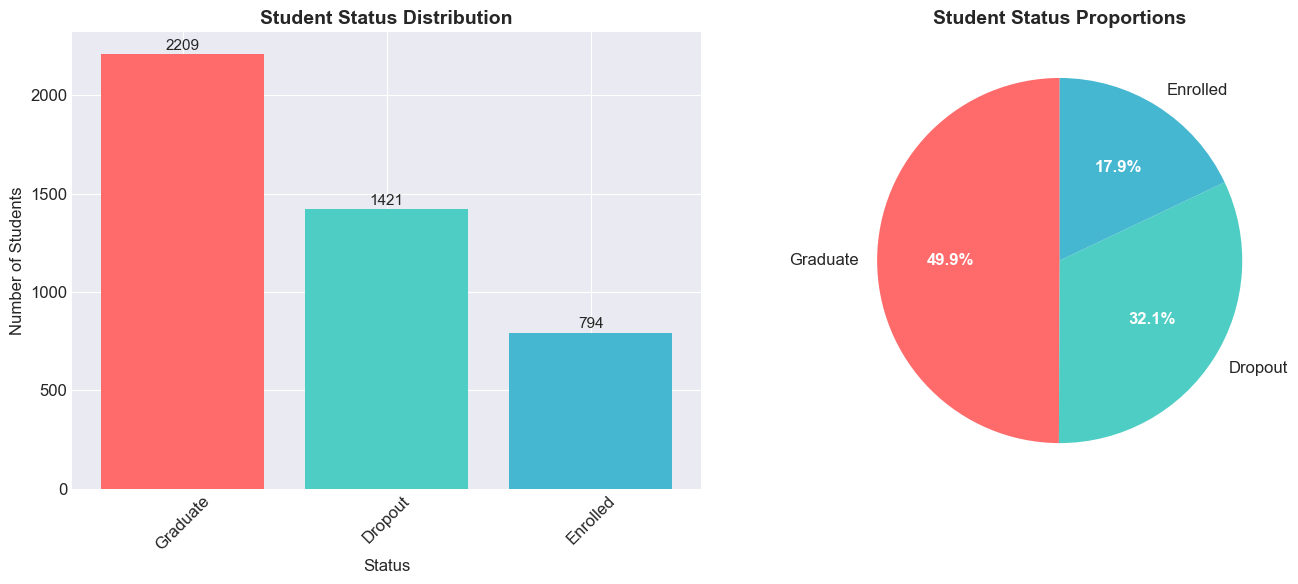


 Insights:
- Total students: 4424
- Dropouts: 1421 (32.12%)
- Graduates: 2209 (49.93%)
- Currently enrolled: 794 (17.95%)


In [76]:
# Check for TV presence
target_col = None
possible_targets = ['Target', 'target', 'STATUS', 'Status', 'Dropout', 'Result']

for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col:
    # Rename for convenience
    if target_col != 'Target':
        df = df.rename(columns={target_col: 'Target'})
        print(f" Target variable renamed to 'Target'")
    
    print(f"\nTarget variable distribution:")
    target_dist = df['Target'].value_counts()
    target_percent = (target_dist / len(df) * 100).round(2)
    
    target_summary = pd.DataFrame({
        'Count': target_dist,
        'Percentage': target_percent
    })
    display(target_summary)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  
    bars = axes[0].bar(target_summary.index, target_summary['Count'], color=colors[:len(target_summary)])
    axes[0].set_title('Student Status Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Status', fontsize=12)
    axes[0].set_ylabel('Number of Students', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Add values
    for bar, count in zip(bars, target_summary['Count']):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + max(target_summary['Count'])*0.01,
                    f'{count}', ha='center', fontsize=11)
    
    # Pie chart
    wedges, texts, autotexts = axes[1].pie(target_summary['Count'], 
                                          labels=target_summary.index,
                                          colors=colors[:len(target_summary)],
                                          autopct='%1.1f%%',
                                          startangle=90)
    axes[1].set_title('Student Status Proportions', fontsize=14, fontweight='bold')
    
    # Improve readability
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Insights:")
    print(f"- Total students: {len(df)}")
    print(f"- Dropouts: {target_summary.loc['Dropout', 'Count'] if 'Dropout' in target_summary.index else 'N/A'} ({target_summary.loc['Dropout', 'Percentage'] if 'Dropout' in target_summary.index else 'N/A'}%)")
    print(f"- Graduates: {target_summary.loc['Graduate', 'Count'] if 'Graduate' in target_summary.index else 'N/A'} ({target_summary.loc['Graduate', 'Percentage'] if 'Graduate' in target_summary.index else 'N/A'}%)")
    print(f"- Currently enrolled: {target_summary.loc['Enrolled', 'Count'] if 'Enrolled' in target_summary.index else 'N/A'} ({target_summary.loc['Enrolled', 'Percentage'] if 'Enrolled' in target_summary.index else 'N/A'}%)")
    
else:
    print("TV not found!")
    print("Available columns:", df.columns.tolist())

### 4. Exploratory Data Analysis (EDA)

Outliers were identified using the IQR method. Due to the educational nature of the data, outliers were retained to preserve real-world variability.


---------------
 ED-Analysis
---------------

 Numerical features distribution


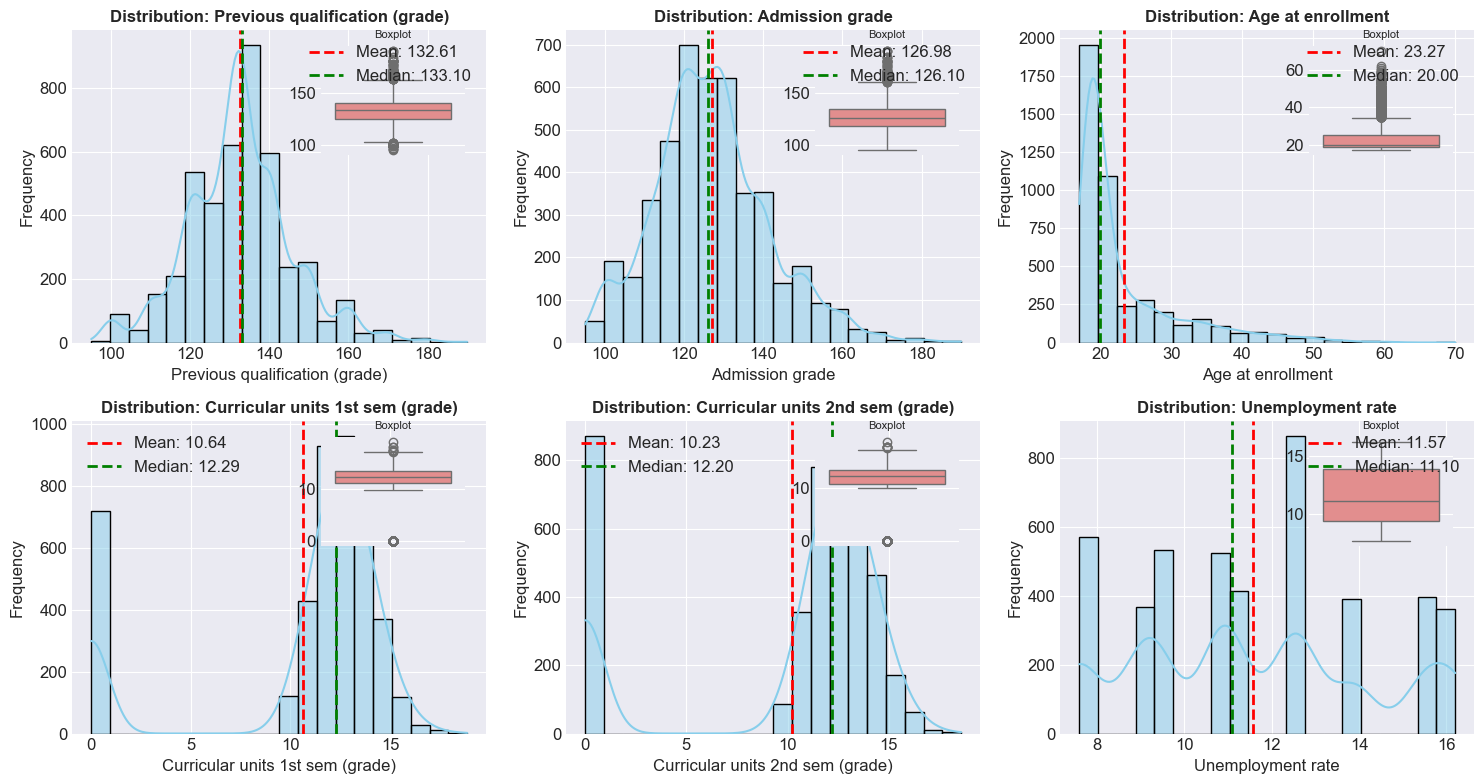


 Outlier analysis for numerical features:


Feature  Outliers Count Outliers % Lower Bound  \
0    Previous qualification (grade)             179      4.05%      102.50   
1                   Admission grade              86      1.94%       92.55   
2                 Age at enrollment             441      9.97%       10.00   
3  Curricular units 1st sem (grade)             726     16.41%        7.40   
4  Curricular units 2nd sem (grade)             877     19.82%        6.87   

  Upper Bound  
0      162.50  
1      160.15  
2       34.00  
3       17.00  
4       17.21

In [77]:
print("\n" + "-"*15)
print(" ED-Analysis")
print("-"*15)


#Numerical features distribution analysis
print("\n Numerical features distribution")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    # Select most interesting numerical features
    interesting_numeric = [col for col in numeric_cols if 'grade' in col.lower() or 'age' in col.lower() or 'rate' in col.lower()]
    
    if len(interesting_numeric) > 0:
        n_plots = min(6, len(interesting_numeric))
        n_cols = 3
        n_rows = (n_plots + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
        axes = axes.flatten()
        
        for i, col in enumerate(interesting_numeric[:n_plots]):
            ax = axes[i]
            
            # Histogram with KDE
            sns.histplot(df[col], kde=True, ax=ax, color='skyblue', bins=20)
            ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
            ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
            
            ax.set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.legend()
            
            # Add boxplot inset
            ax_box = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
            sns.boxplot(y=df[col], ax=ax_box, color='lightcoral')
            ax_box.set_ylabel('')
            ax_box.set_title('Boxplot', fontsize=8)
        
        # Hide empty subplots
        for i in range(len(interesting_numeric[:n_plots]), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Outlier analysis
        print("\n Outlier analysis for numerical features:")
        outlier_summary = []
        
        for col in interesting_numeric[:5]:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_percent = (len(outliers) / len(df)) * 100
            
            outlier_summary.append({
                'Feature': col,
                'Outliers Count': len(outliers),
                'Outliers %': f'{outlier_percent:.2f}%',
                'Lower Bound': f'{lower_bound:.2f}',
                'Upper Bound': f'{upper_bound:.2f}'
            })
        
        display(pd.DataFrame(outlier_summary))
        
else:
    print("No numerical features found")


### 4.1 Categorical features analysis

Low-cardinality categorical features were analyzed using frequency distributions and their relationship with the target variable. Features showing minimal variation across student outcomes were noted as potentially weak predictors.

In [37]:
print("Data types in dataset:")
print(df.dtypes)
print("\nObject columns:")
print(df.select_dtypes(include=['object']).columns.tolist())

Data types in dataset:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                          

In [38]:
print("All columns and their types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique values: {df[col].nunique()}")
    if df[col].nunique() < 10:  
        print(f"  Values: {df[col].unique()}")

All columns and their types:
Marital status: int64, Unique values: 6
  Values: [1 2 4 3 5 6]
Application mode: int64, Unique values: 18
Application order: int64, Unique values: 8
  Values: [5 1 2 4 3 6 9 0]
Course: int64, Unique values: 17
Daytime/evening attendance	: int64, Unique values: 2
  Values: [1 0]
Previous qualification: int64, Unique values: 17
Previous qualification (grade): float64, Unique values: 101
Nacionality: int64, Unique values: 21
Mother's qualification: int64, Unique values: 29
Father's qualification: int64, Unique values: 34
Mother's occupation: int64, Unique values: 32
Father's occupation: int64, Unique values: 46
Admission grade: float64, Unique values: 620
Displaced: int64, Unique values: 2
  Values: [1 0]
Educational special needs: int64, Unique values: 2
  Values: [0 1]
Debtor: int64, Unique values: 2
  Values: [0 1]
Tuition fees up to date: int64, Unique values: 2
  Values: [1 0]
Gender: int64, Unique values: 2
  Values: [1 0]
Scholarship holder: int64, Uni

#### Find columns with low cardinality 


In [40]:
low_cardinality_cols = []
for col in df.columns:
    if col != 'Target':  
        nunique = df[col].nunique()
        if nunique <= 10:  
            low_cardinality_cols.append((col, nunique))

#### Sort by number of unique values


In [41]:
low_cardinality_cols.sort(key=lambda x: x[1])

print(f"Found {len(low_cardinality_cols)} features with <=10 unique values")


Found 14 features with <=10 unique values



Low-cardinality features:
  • Daytime/evening attendance	: 2 unique values
    Values: [0, 1]
  • Displaced: 2 unique values
    Values: [0, 1]
  • Educational special needs: 2 unique values
    Values: [0, 1]
  • Debtor: 2 unique values
    Values: [0, 1]
  • Tuition fees up to date: 2 unique values
    Values: [0, 1]
  • Gender: 2 unique values
    Values: [0, 1]
  • Scholarship holder: 2 unique values
    Values: [0, 1]
  • International: 2 unique values
    Values: [0, 1]
  • Marital status: 6 unique values
  • Application order: 8 unique values


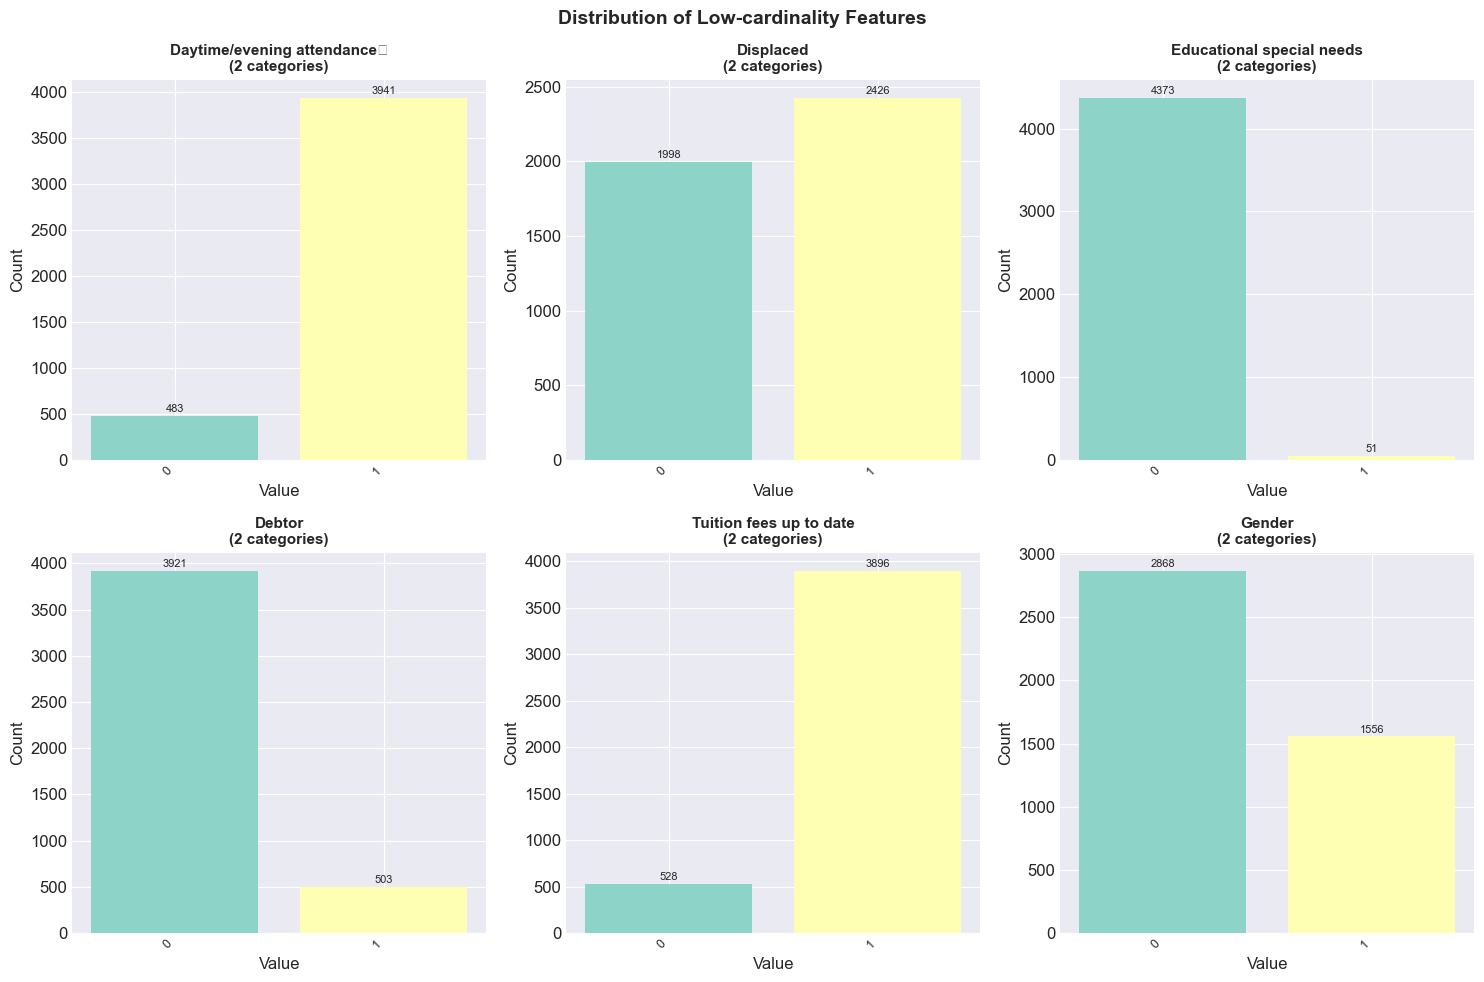


 Relationship with target variable (top 3 features):

Daytime/evening attendance	:


Target                        Dropout  Enrolled  Graduate
Daytime/evening attendance\t                             
0                               42.86     15.53     41.61
1                               30.80     18.24     50.95

<Figure size 1000x600 with 0 Axes>

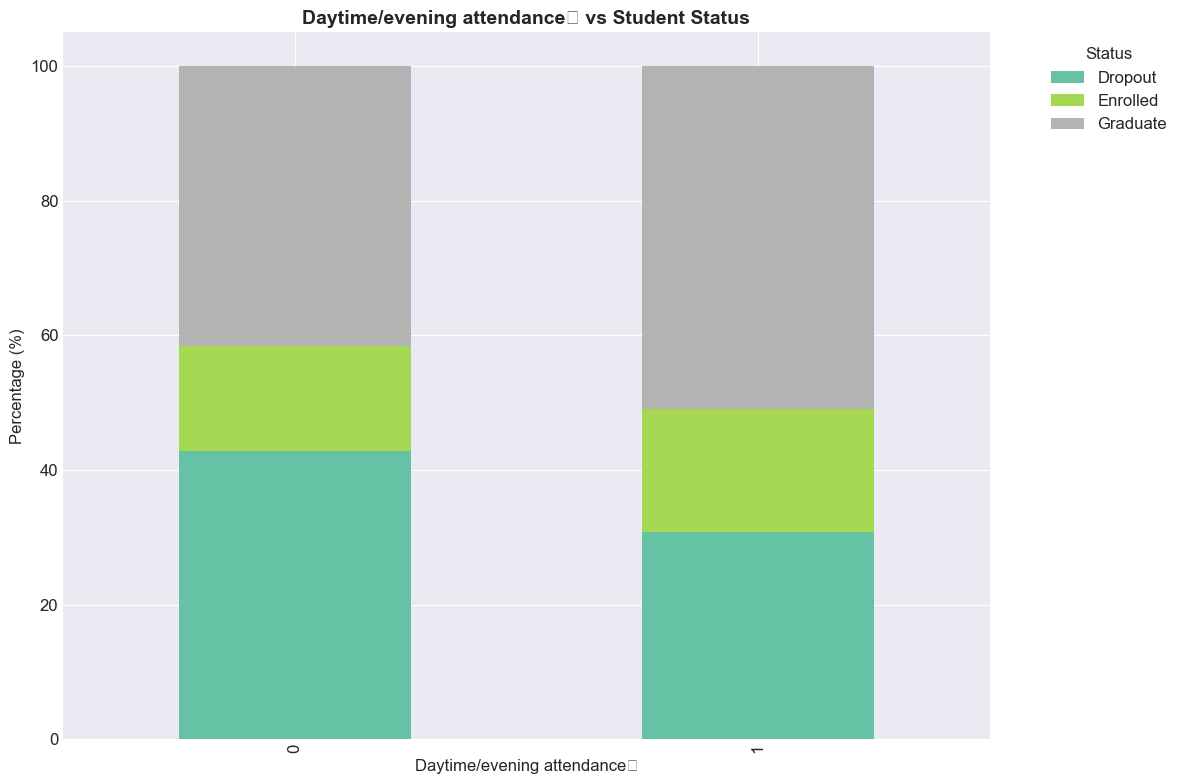


Displaced:


Target     Dropout  Enrolled  Graduate
Displaced                             
0            37.64     18.07     44.29
1            27.58     17.85     54.58

<Figure size 1000x600 with 0 Axes>

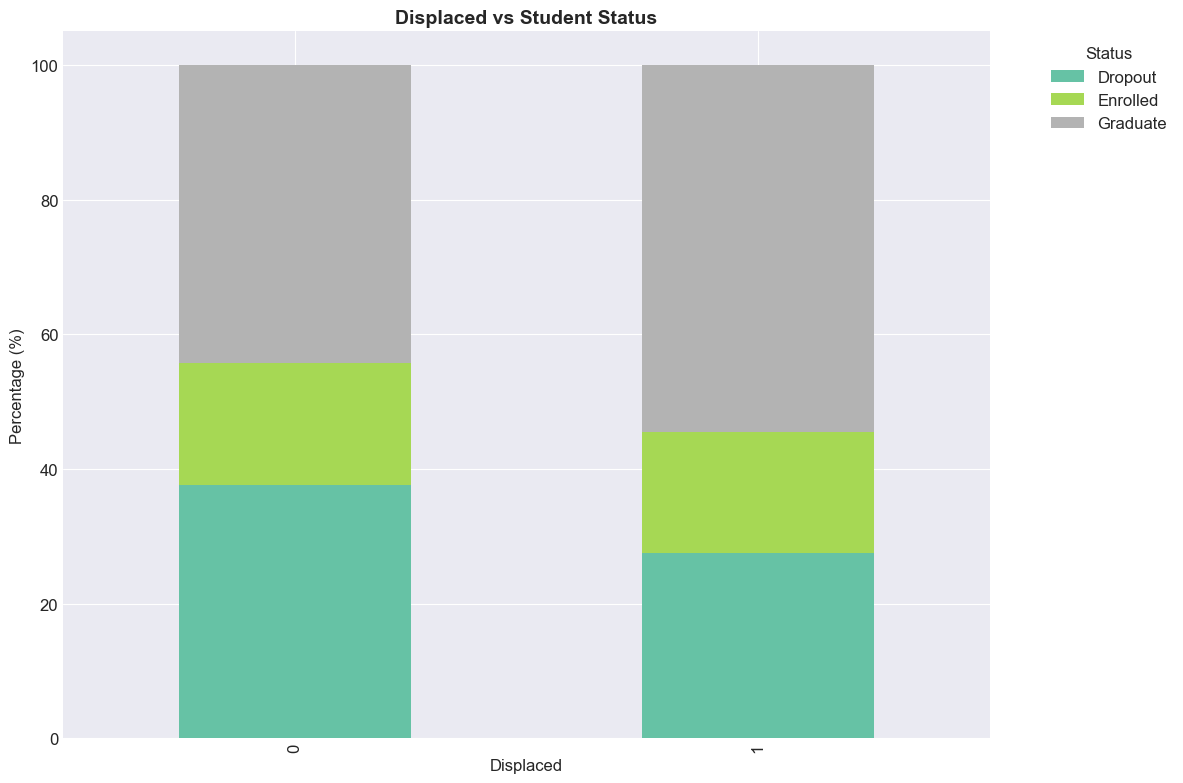


Educational special needs:


Target                     Dropout  Enrolled  Graduate
Educational special needs                             
0                            32.11     17.91     49.99
1                            33.33     21.57     45.10

<Figure size 1000x600 with 0 Axes>

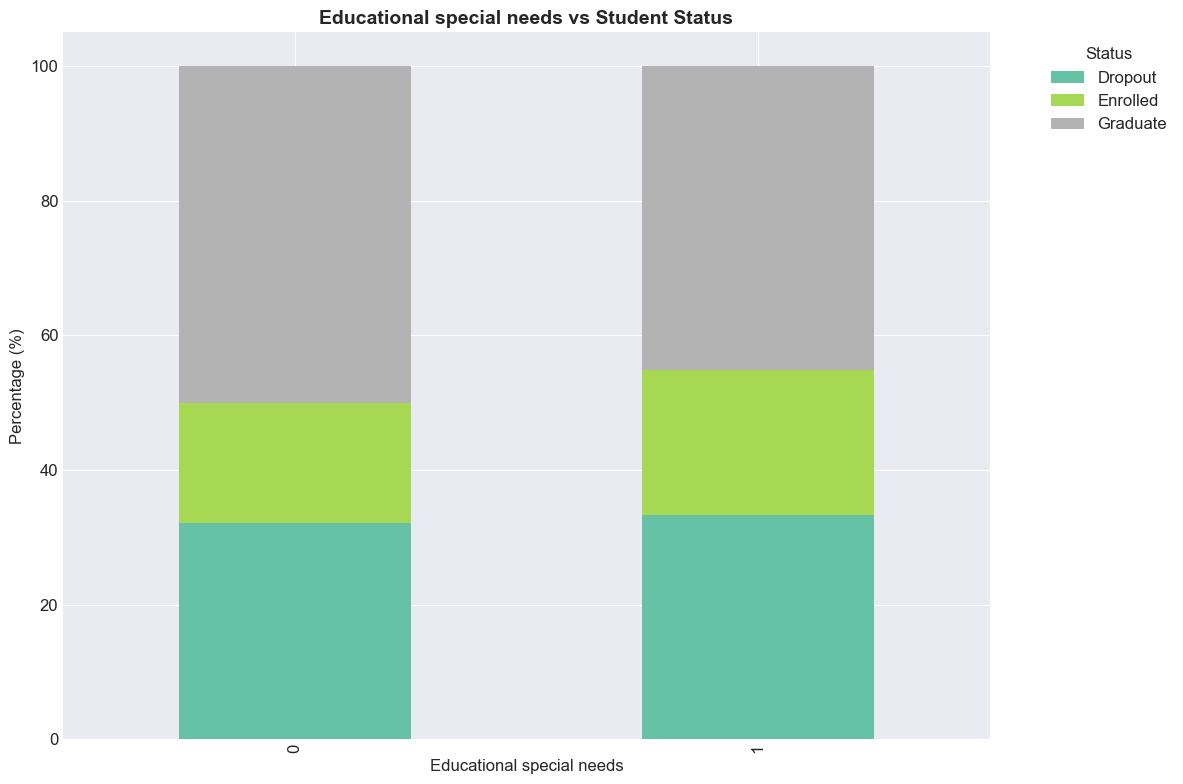

In [42]:
if len(low_cardinality_cols) > 0:
    #showing information about the signs
    print("\nLow-cardinality features:")
    for col, nunique in low_cardinality_cols[:10]:  
        print(f"  • {col}: {nunique} unique values")
        if nunique <= 5:
            print(f"    Values: {sorted(df[col].unique().tolist())}")
    
    #visualization of distribution for the top 6 features
    top_features = [col for col, _ in low_cardinality_cols[:6]]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(top_features):
        ax = axes[i]
        
        
        value_counts = df[col].value_counts().sort_index() #get the value and their frequency
        
        #creating bar plot
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                     color=plt.cm.Set3(range(len(value_counts))))
        
        ax.set_title(f'{col}\n({len(value_counts)} categories)', fontsize=11, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')
        ax.set_xticks(range(len(value_counts)))
        
        #formatting X-Axis Labels
        if len(value_counts) <= 8:
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
        else:
            ax.set_xticklabels([str(i) for i in range(len(value_counts))], fontsize=8)
        
        #ddding values to columns
        for j, (bar, count) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            if height > 0:  #to avoid displaying on zero columns
                ax.text(bar.get_x() + bar.get_width()/2, height + max(value_counts.values)*0.01,
                       f'{count}', ha='center', fontsize=8)
    
    #hiding empty subplots
    for i in range(len(top_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Distribution of Low-cardinality Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    #analysis of the relationship with TV for top 3 features
    if 'Target' in df.columns:
        print("\n Relationship with target variable (top 3 features):")
        
        for col in top_features[:3]:
            print(f"\n{col}:")
            
            #creating a cross-tab
            cross_tab = pd.crosstab(df[col], df['Target'], normalize='index') * 100
            display(cross_tab.round(2))
            
            #visualization
            plt.figure(figsize=(10, 6))
            cross_tab.plot(kind='bar', stacked=True, colormap='Set2')
            plt.title(f'{col} vs Student Status', fontsize=14, fontweight='bold')
            plt.xlabel(col)
            plt.ylabel('Percentage (%)')
            plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            
else:
    print("No features with <=10 unique values found")
    
    #simple analysis
    print("\nChecking columns that might be categorical by name:")
    categorical_keywords = ['gender', 'marital', 'debtor', 'scholarship']
    for col in df.columns:
        if any(keyword in col.lower() for keyword in categorical_keywords):
            nunique = df[col].nunique()
            print(f"  • {col}: {nunique} unique values")
            if nunique <= 15:
                print(f"    Might be categorical with {nunique} categories")

### 4.2 Correlation analysis

#### *Correlation analysis was used only for exploratory insights and feature understanding, not for direct prediction or causal inference.*

To better understand the relationships between features and the target variable, a correlation analysis was conducted on numerical features.  
The target variable was ordinally encoded (Dropout = 0, Enrolled = 1, Graduate = 2) to enable exploratory correlation analysis.

Correlation coefficients were used solely for exploratory purposes to identify potentially informative features and detect multicollinearity.  
Due to the multi-class and categorical nature of the target variable, correlation results are not interpreted as causal relationships.

The analysis revealed that academic performance indicators from the first and second semesters show the strongest positive correlation with graduation outcomes, while factors such as age at enrollment, debtor status, and application mode exhibit negative correlations.

Additionally, strong correlations were observed among several academic features across semesters, indicating potential multicollinearity, which will be addressed during the feature selection and model development stages.



Checking data types in dataframe

In [78]:
print(f" Data types overview in dataset:")
print(df.dtypes.value_counts())

 Data types overview in dataset:
int64      29
float64     7
object      2
Name: count, dtype: int64


Extracting only numerical columns

In [74]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n Numerical features ({len(numeric_cols)} columns):")
for i, col in enumerate(numeric_cols, 1):
    print(f"{i:3}. {col}")


 Numerical features (36 columns):
  1. Marital status
  2. Application mode
  3. Application order
  4. Course
  5. Daytime/evening attendance	
  6. Previous qualification
  7. Previous qualification (grade)
  8. Nacionality
  9. Mother's qualification
 10. Father's qualification
 11. Mother's occupation
 12. Father's occupation
 13. Admission grade
 14. Displaced
 15. Educational special needs
 16. Debtor
 17. Tuition fees up to date
 18. Gender
 19. Scholarship holder
 20. Age at enrollment
 21. International
 22. Curricular units 1st sem (credited)
 23. Curricular units 1st sem (enrolled)
 24. Curricular units 1st sem (evaluations)
 25. Curricular units 1st sem (approved)
 26. Curricular units 1st sem (grade)
 27. Curricular units 1st sem (without evaluations)
 28. Curricular units 2nd sem (credited)
 29. Curricular units 2nd sem (enrolled)
 30. Curricular units 2nd sem (evaluations)
 31. Curricular units 2nd sem (approved)
 32. Curricular units 2nd sem (grade)
 33. Curricular unit

#### Creating DataFrame with only numerical data

In [60]:
df_numeric = df[numeric_cols].copy()

Adding encoded target variable for correlation analysis

In [61]:
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_numeric['Target_encoded'] = df['Target'].map(target_mapping)

Checking for missing values after encoding

In [79]:
missing_after_encoding = df_numeric['Target_encoded'].isnull().sum()
if missing_after_encoding > 0:
    print(f"\n Warning: {missing_after_encoding} missing values after encoding Target")
    df_numeric['Target_encoded'] = df_numeric['Target_encoded'].fillna(-1)

print(f"\n Ready for correlation analysis. df_numeric shape: {df_numeric.shape}")


 Ready for correlation analysis. df_numeric shape: (4424, 37)


Calculating correlations with target variable

In [80]:
correlations = df_numeric.corr()['Target_encoded'].sort_values(ascending=False)

#creating DataFrame with correlation results
corr_results = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values
})

#removing Target_encoded from results
corr_results = corr_results[corr_results['Feature'] != 'Target_encoded']

#### Displaying top-15 positive correlations

In [81]:
print("\n TOP-15 POSITIVE CORRELATIONS")
print("   (higher correlation → more likely to be 'Graduate')")
print("-"*70)
positive_corr = corr_results[corr_results['Correlation'] > 0].head(15)
for i, (feature, corr) in enumerate(positive_corr.values, 1):
    bar = "█" * int(abs(corr) * 40)  # Visualization with bars
    print(f"{i:2}. {feature:35} : {corr:+.4f} {bar}")


 TOP-15 POSITIVE CORRELATIONS
   (higher correlation → more likely to be 'Graduate')
----------------------------------------------------------------------
 1. Curricular units 2nd sem (approved) : +0.6242 ████████████████████████
 2. Curricular units 2nd sem (grade)    : +0.5668 ██████████████████████
 3. Curricular units 1st sem (approved) : +0.5291 █████████████████████
 4. Curricular units 1st sem (grade)    : +0.4852 ███████████████████
 5. Tuition fees up to date             : +0.4098 ████████████████
 6. Scholarship holder                  : +0.2976 ███████████
 7. Curricular units 2nd sem (enrolled) : +0.1758 ███████
 8. Curricular units 1st sem (enrolled) : +0.1560 ██████
 9. Admission grade                     : +0.1209 ████
10. Displaced                           : +0.1140 ████
11. Previous qualification (grade)      : +0.1038 ████
12. Curricular units 2nd sem (evaluations) : +0.0927 ███
13. Application order                   : +0.0898 ███
14. Daytime/evening attendance	  

#### Displaying top-15 negative correlations

In [82]:
print("\n  TOP-15 NEGATIVE CORRELATIONS")
print("   (lower correlation → more likely to be 'Dropout')")
print("-"*70)
negative_corr = corr_results[corr_results['Correlation'] < 0].tail(15)
for i, (feature, corr) in enumerate(negative_corr.values, 1):
    bar = "█" * int(abs(corr) * 40)  # Visualization with bars
    print(f"{i:2}. {feature:35} : {corr:+.4f} {bar}")


  TOP-15 NEGATIVE CORRELATIONS
   (lower correlation → more likely to be 'Dropout')
----------------------------------------------------------------------
 1. Father's qualification              : -0.0014 
 2. Father's occupation                 : -0.0019 
 3. Mother's occupation                 : -0.0056 
 4. Educational special needs           : -0.0074 
 5. Nacionality                         : -0.0148 
 6. Inflation rate                      : -0.0269 █
 7. Mother's qualification              : -0.0432 █
 8. Previous qualification              : -0.0560 ██
 9. Curricular units 1st sem (without evaluations) : -0.0687 ██
10. Marital status                      : -0.0898 ███
11. Curricular units 2nd sem (without evaluations) : -0.0940 ███
12. Application mode                    : -0.2217 ████████
13. Gender                              : -0.2293 █████████
14. Debtor                              : -0.2410 █████████
15. Age at enrollment                   : -0.2434 █████████


#### Statistics on correlation strength

In [83]:
print("\n CORRELATION STRENGTH STATISTICS:")
print("-"*70)
print(f"Strong positive correlation (>0.5): {len(corr_results[corr_results['Correlation'] > 0.5])} features")
print(f"Moderate positive correlation (0.3-0.5): {len(corr_results[(corr_results['Correlation'] > 0.3) & (corr_results['Correlation'] <= 0.5)])} features")
print(f"Weak positive correlation (0.1-0.3): {len(corr_results[(corr_results['Correlation'] > 0.1) & (corr_results['Correlation'] <= 0.3)])} features")
print(f"Very weak correlation (-0.1-0.1): {len(corr_results[(corr_results['Correlation'] >= -0.1) & (corr_results['Correlation'] <= 0.1)])} features")
print(f"Weak negative correlation (-0.3-0.1): {len(corr_results[(corr_results['Correlation'] >= -0.3) & (corr_results['Correlation'] < -0.1)])} features")
print(f"Moderate negative correlation (-0.5-0.3): {len(corr_results[(corr_results['Correlation'] >= -0.5) & (corr_results['Correlation'] < -0.3)])} features")
print(f"Strong negative correlation (<-0.5): {len(corr_results[corr_results['Correlation'] < -0.5])} features")


 CORRELATION STRENGTH STATISTICS:
----------------------------------------------------------------------
Strong positive correlation (>0.5): 3 features
Moderate positive correlation (0.3-0.5): 2 features
Weak positive correlation (0.1-0.3): 6 features
Very weak correlation (-0.1-0.1): 21 features
Weak negative correlation (-0.3-0.1): 4 features
Moderate negative correlation (-0.5-0.3): 0 features
Strong negative correlation (<-0.5): 0 features


#### Visualization of correlations


 CORRELATION VISUALIZATIONS
----------------------------------------------------------------------


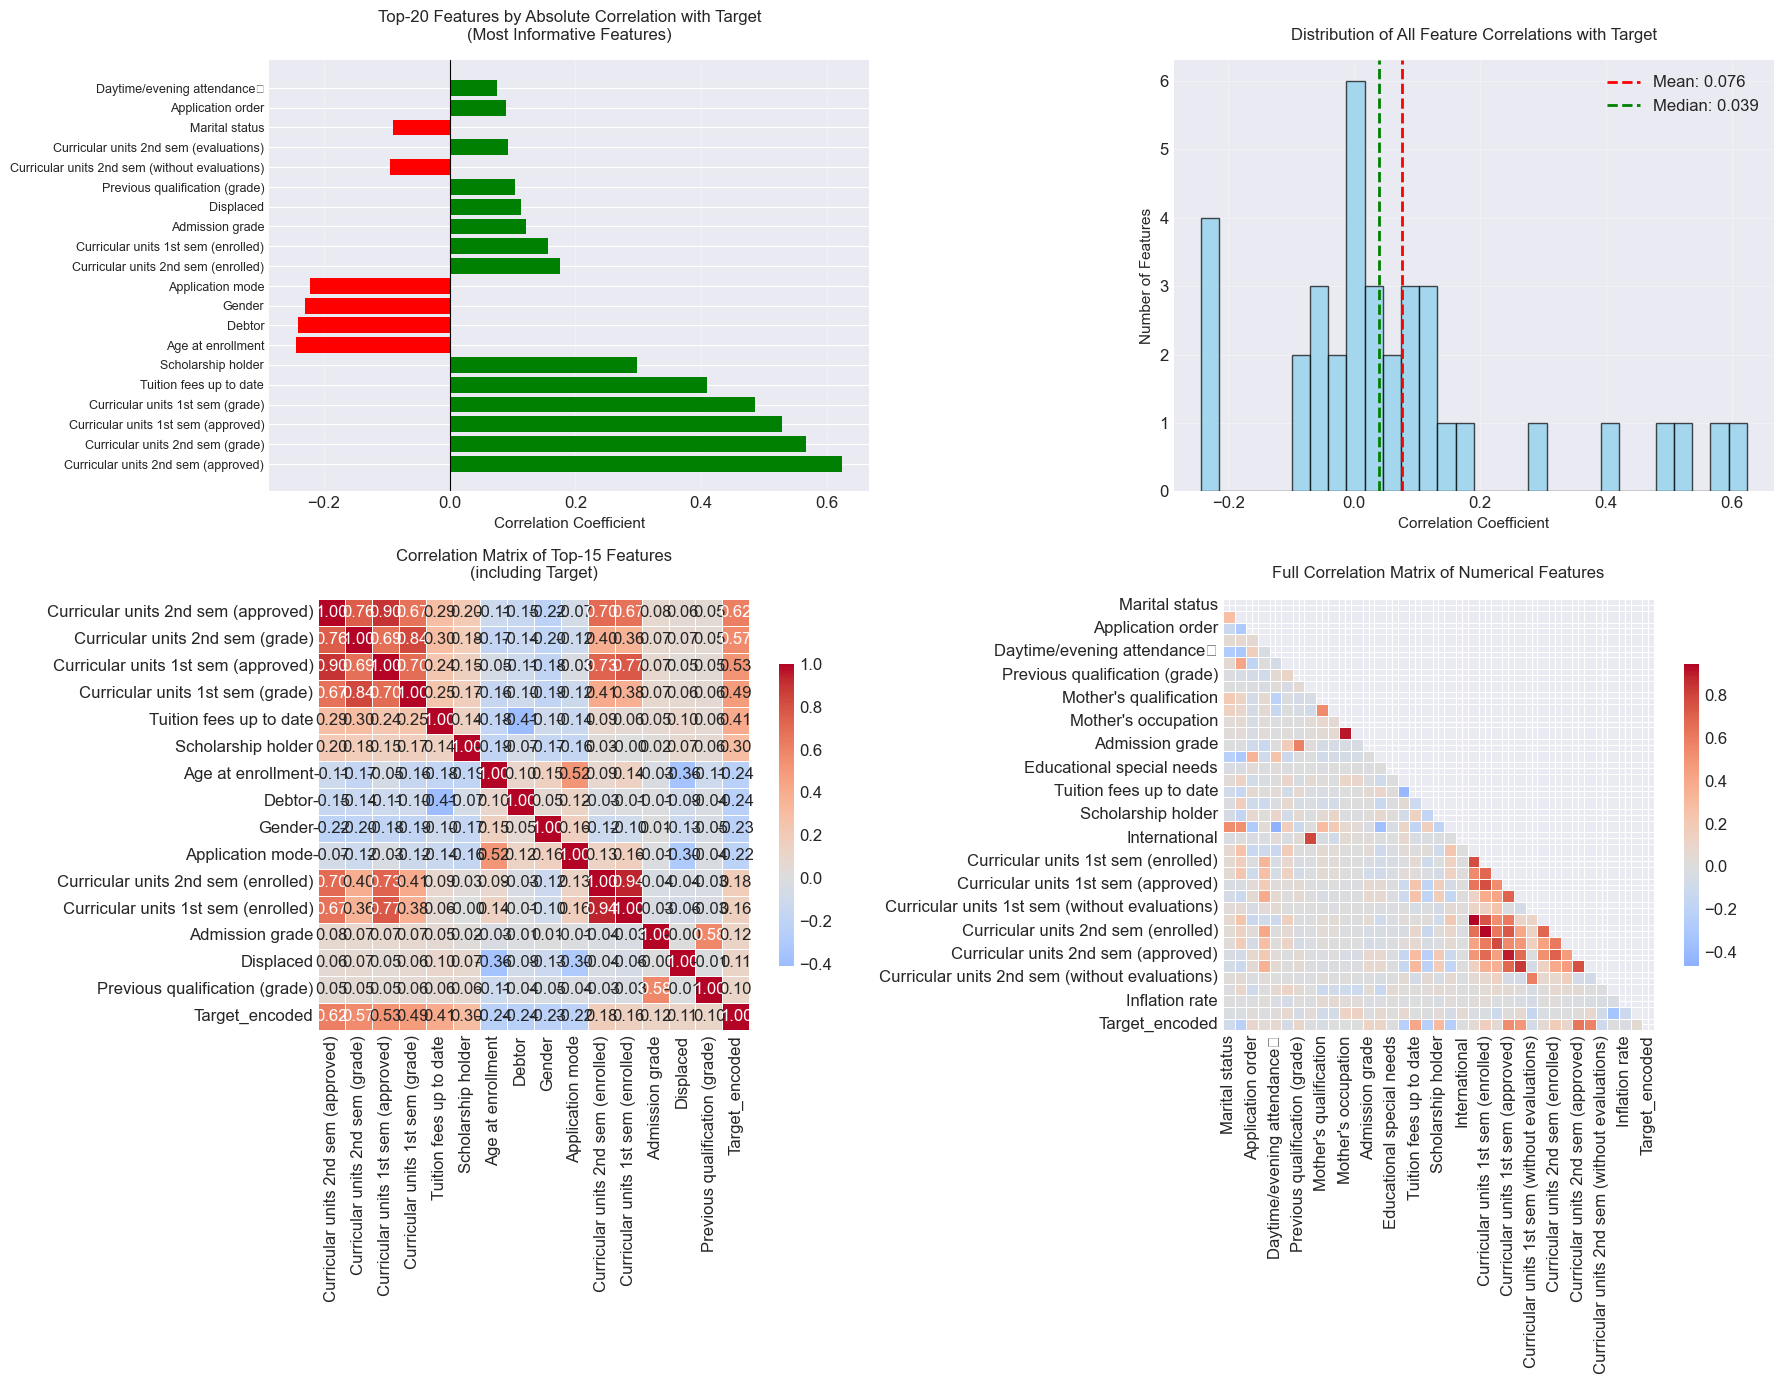

In [84]:
print("\n CORRELATION VISUALIZATIONS")
print("-"*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

#Top-20 absolute correlations
top_20_abs = corr_results.sort_values('Correlation', key=abs, ascending=False).head(20)
axes[0, 0].barh(range(len(top_20_abs)), top_20_abs['Correlation'], 
                color=['red' if x < 0 else 'green' for x in top_20_abs['Correlation']])
axes[0, 0].set_yticks(range(len(top_20_abs)))
axes[0, 0].set_yticklabels(top_20_abs['Feature'], fontsize=9)
axes[0, 0].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0, 0].set_title('Top-20 Features by Absolute Correlation with Target\n(Most Informative Features)', fontsize=12, pad=15)
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 0].grid(axis='x', alpha=0.3)

#Distribution of correlations
axes[0, 1].hist(corr_results['Correlation'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=corr_results['Correlation'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {corr_results["Correlation"].mean():.3f}')
axes[0, 1].axvline(x=corr_results['Correlation'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {corr_results["Correlation"].median():.3f}')
axes[0, 1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0, 1].set_ylabel('Number of Features', fontsize=11)
axes[0, 1].set_title('Distribution of All Feature Correlations with Target', fontsize=12, pad=15)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

#Heatmap of top-15 correlating features
top_15_features = top_20_abs.head(15)['Feature'].tolist()
top_15_features.append('Target_encoded')
corr_top_15 = df_numeric[top_15_features].corr()

sns.heatmap(corr_top_15, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix of Top-15 Features\n(including Target)', fontsize=12, pad=15)

#Full correlation matrix (simplified)
corr_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, ax=axes[1, 1])
axes[1, 1].set_title('Full Correlation Matrix of Numerical Features', fontsize=12, pad=15)

plt.tight_layout()
plt.show()

#### Multicollinearity analysis among top features

In [70]:
print("\n MULTICOLLINEARITY ANALYSIS AMONG TOP FEATURES")
print("-"*70)

#checking for strongly correlated pairs among features (excluding Target_encoded)
high_corr_pairs = []
features_to_check = corr_results.sort_values('Correlation', key=abs, ascending=False).head(30)['Feature'].tolist()

if len(features_to_check) > 1:
    corr_matrix_top = df_numeric[features_to_check].corr()
    
    for i in range(len(features_to_check)):
        for j in range(i+1, len(features_to_check)):
            corr_val = corr_matrix_top.iloc[i, j]
            if abs(corr_val) > 0.7:  # Threshold for strong correlation
                high_corr_pairs.append((features_to_check[i], features_to_check[j], corr_val))

if high_corr_pairs:
    print(f"  Found {len(high_corr_pairs)} strongly correlated feature pairs (>0.7):")
    for pair in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
        print(f"   • {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")
    print("\n Recommendation: Consider removing one feature from each strongly correlated pair")
else:
    print(" No strong correlations among top features (correlation < 0.7)")


 MULTICOLLINEARITY ANALYSIS AMONG TOP FEATURES
----------------------------------------------------------------------
  Found 11 strongly correlated feature pairs (>0.7):
   • Curricular units 2nd sem (credited) ↔ Curricular units 1st sem (credited): 0.945
   • Curricular units 2nd sem (enrolled) ↔ Curricular units 1st sem (enrolled): 0.943
   • Curricular units 2nd sem (approved) ↔ Curricular units 1st sem (approved): 0.904
   • Curricular units 2nd sem (grade) ↔ Curricular units 1st sem (grade): 0.837
   • Curricular units 2nd sem (evaluations) ↔ Curricular units 1st sem (evaluations): 0.779
   • Curricular units 1st sem (enrolled) ↔ Curricular units 1st sem (credited): 0.774
   • Curricular units 1st sem (approved) ↔ Curricular units 1st sem (enrolled): 0.769
   • Curricular units 2nd sem (approved) ↔ Curricular units 2nd sem (grade): 0.761
   • Curricular units 1st sem (enrolled) ↔ Curricular units 2nd sem (credited): 0.754
   • Curricular units 1st sem (approved) ↔ Curricular uni

#### Key insights

In [71]:
print("\n" + "="*70)
print(" KEY INSIGHTS FROM CORRELATION ANALYSIS")
print("="*70)

# Find the most important features
top_positive = corr_results.head(5)
top_negative = corr_results.tail(5)

print("\nMost important features for PREDICTING GRADUATES:")
for i, (feature, corr) in enumerate(top_positive.values, 1):
    print(f"{i}. {feature} (correlation: {corr:+.3f})")

print("\nMost important features for PREDICTING DROPOUTS:")
for i, (feature, corr) in enumerate(top_negative.values, 1):
    print(f"{i}. {feature} (correlation: {corr:+.3f})")

print("\n Practical recommendations for the university:")
print("1. Monitor academic performance in 1st and 2nd semesters (key indicators)")
print("2. Pay attention to students with academic debt")
print("3. Consider age at enrollment as a risk factor")
print("4. Create an early warning system based on top-5 features")


 KEY INSIGHTS FROM CORRELATION ANALYSIS

Most important features for PREDICTING GRADUATES:
1. Curricular units 2nd sem (approved) (correlation: +0.624)
2. Curricular units 2nd sem (grade) (correlation: +0.567)
3. Curricular units 1st sem (approved) (correlation: +0.529)
4. Curricular units 1st sem (grade) (correlation: +0.485)
5. Tuition fees up to date (correlation: +0.410)

Most important features for PREDICTING DROPOUTS:
1. Curricular units 2nd sem (without evaluations) (correlation: -0.094)
2. Application mode (correlation: -0.222)
3. Gender (correlation: -0.229)
4. Debtor (correlation: -0.241)
5. Age at enrollment (correlation: -0.243)

 Practical recommendations for the university:
1. Monitor academic performance in 1st and 2nd semesters (key indicators)
2. Pay attention to students with academic debt
3. Consider age at enrollment as a risk factor
4. Create an early warning system based on top-5 features


### 4.3 Feature interaction analysis


To further explore relationships between the most informative features, an interaction analysis was conducted using the two numerical variables with the highest absolute correlation to the target variable.

Scatter plots colored by class labels and hexbin density plots were used to visualize class separability and data density.  
The analysis shows a strong positive relationship between academic performance indicators and graduation outcomes.

A quadrant-based analysis using median splits highlights clear differences in student outcomes, with students in the high-performance quadrant showing a significantly higher probability of graduation.  
The quadrant variable was created for exploratory purposes only and was not used in model training.


####  - The quadrant feature was created for exploratory analysis only and was not used in model training.

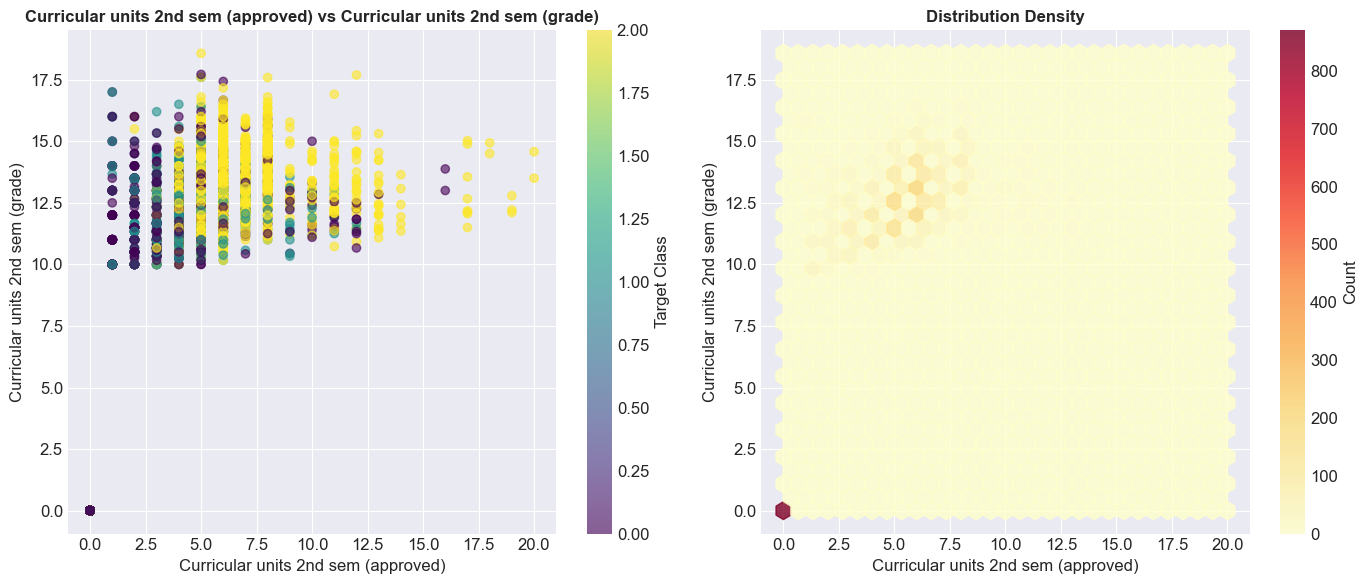


 Statistics for features Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade):
Correlation between features: 0.761

 Distribution by quadrants (%):


Target    Dropout  Enrolled  Graduate
Quadrant                             
Q1           7.97     10.57     81.47
Q2          37.67     37.40     24.93
Q3          68.06     21.10     10.85
Q4          15.61     20.91     63.48

In [44]:
if 'Target' in df.columns and len(numeric_cols) >= 2:
    
    if len(numeric_cols) >= 2:
        
        if 'Target_encoded' in df_corr.columns:
            corr_with_target = df_corr[numeric_cols + ['Target_encoded']].corr()['Target_encoded'].drop('Target_encoded')
            top_features = corr_with_target.abs().nlargest(2).index.tolist()
            
            if len(top_features) == 2:
                fig, axes = plt.subplots(1, 2, figsize=(14, 6))
                
                #scatter plot colored by class
                scatter = axes[0].scatter(df[top_features[0]], df[top_features[1]], 
                                         c=df_corr['Target_encoded'], cmap='viridis', alpha=0.6)
                axes[0].set_xlabel(top_features[0])
                axes[0].set_ylabel(top_features[1])
                axes[0].set_title(f'{top_features[0]} vs {top_features[1]}', fontsize=12, fontweight='bold')
                plt.colorbar(scatter, ax=axes[0], label='Target Class')
                
                #Hexbin plot for density visualization
                hb = axes[1].hexbin(df[top_features[0]], df[top_features[1]], 
                                    gridsize=30, cmap='YlOrRd', alpha=0.8)
                axes[1].set_xlabel(top_features[0])
                axes[1].set_ylabel(top_features[1])
                axes[1].set_title(f'Distribution Density', fontsize=12, fontweight='bold')
                plt.colorbar(hb, ax=axes[1], label='Count')
                
                plt.tight_layout()
                plt.show()
                
                print(f"\n Statistics for features {top_features[0]} and {top_features[1]}:")
                print(f"Correlation between features: {df[top_features[0]].corr(df[top_features[1]]):.3f}")
                
                #Quadrant analysis
                median_x = df[top_features[0]].median()
                median_y = df[top_features[1]].median()
                
                df['Quadrant'] = 'Q1'  # Default
                df.loc[(df[top_features[0]] >= median_x) & (df[top_features[1]] >= median_y), 'Quadrant'] = 'Q1'
                df.loc[(df[top_features[0]] < median_x) & (df[top_features[1]] >= median_y), 'Quadrant'] = 'Q2'
                df.loc[(df[top_features[0]] < median_x) & (df[top_features[1]] < median_y), 'Quadrant'] = 'Q3'
                df.loc[(df[top_features[0]] >= median_x) & (df[top_features[1]] < median_y), 'Quadrant'] = 'Q4'
                
                quadrant_analysis = df.groupby('Quadrant')['Target'].value_counts(normalize=True).unstack().fillna(0) * 100
                print("\n Distribution by quadrants (%):")
                display(quadrant_analysis.round(2))



### 4.4 Temporal trend analysis (if temporal data exists)

Temporal trend analysis was considered to examine potential changes in student outcomes over time.  
However, the dataset does not contain explicit temporal features such as dates, years, or timestamps related to enrollment or academic progress.

Although the feature *Daytime/evening attendance* contains the word "time", it represents a categorical attribute rather than a temporal variable.

Therefore, temporal trend analysis is not applicable for this dataset.

In [46]:
#сheck for timestamps
time_cols = []
for col in df.columns:
    col_lower = col.lower()
    # 
    if (('year' in col_lower and 'enrollment' not in col_lower) or 
        ('date' in col_lower and 'up to date' not in col_lower) or  
        'semester' in col_lower or 
        'month' in col_lower or
        'day' in col_lower or
        'time' in col_lower):
        time_cols.append(col)

if time_cols:
    print(f"Found temporal features: {time_cols}")
    
    for col in time_cols[:2]:  #analyze first 2 temporal features
        print(f"\nTemporal feature analysis: {col}")
        
        # check the data type
        print(f"Data type: {df[col].dtype}")
        print(f"Sample values: {df[col].head(3).tolist()}")
        
        if df[col].dtype in ['object', 'str']:
            #try to convert to datetime
            try:
                df[col] = pd.to_datetime(df[col])
                print(f" Feature {col} converted to datetime")
                
                # Year/month analysis
                df['Year'] = df[col].dt.year
                df['Month'] = df[col].dt.month
                
                if 'Target' in df.columns:
                    #Dropout analysis by year
                    yearly_dropout = df.groupby('Year')['Target'].apply(
                        lambda x: (x == 'Dropout').mean() * 100
                    ).reset_index()
                    
                    plt.figure(figsize=(12, 6))
                    plt.plot(yearly_dropout['Year'], yearly_dropout['Target'], marker='o', linewidth=2)
                    plt.title(f'Dropout percentage by year', fontsize=14, fontweight='bold')
                    plt.xlabel('Year')
                    plt.ylabel('Dropout percentage (%)')
                    plt.grid(True, alpha=0.3)
                    
                    #ddd trend line
                    z = np.polyfit(yearly_dropout['Year'], yearly_dropout['Target'], 1)
                    p = np.poly1d(z)
                    plt.plot(yearly_dropout['Year'], p(yearly_dropout['Year']), "r--", alpha=0.5, label='Trend')
                    
                    plt.legend()
                    plt.tight_layout()
                    plt.show()
                    
            except Exception as e:
                print(f" Could not convert {col} to datetime: {e}")
                continue
        else:
            print(f" {col} is not string/object type. Current dtype: {df[col].dtype}")
            
else:
    print("No temporal features found")
    print("\n Checking for potential temporal data in other columns...")
    
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            unique_vals = df[col].unique()
            if len(unique_vals) <= 10:  
                
                if all(1900 <= val <= 2100 for val in unique_vals if pd.notnull(val)):
                    print(f"  • {col} might represent years: {sorted(unique_vals)}")

Found temporal features: ['Daytime/evening attendance\t']

Temporal feature analysis: Daytime/evening attendance	
Data type: int64
Sample values: [1, 1, 1]
 Daytime/evening attendance	 is not string/object type. Current dtype: int64


## FEATURE ENGINEERING

Creating a copy for feature engineering

In [85]:
df_engineered = df.copy()

print("Creation of new features based on data analysis...")

Creation of new features based on data analysis...


ACADEMIC INDICES

- Checking the presence of the required columns in your dataset

In [144]:
available_columns = df_engineered.columns.tolist()
print(f"Available columns: {available_columns[:10]}...")

Available columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification"]...


- Creating indexes depending on what columns exist

In [145]:
# Admission score normalization (z-score)
if 'Admission grade' in df_engineered.columns:
    df_engineered['Admission_Score_Normalized'] = (
        (df_engineered['Admission grade'] - df_engineered['Admission grade'].mean()) /
        df_engineered['Admission grade'].std()
    )
    print("Created: Admission_Score_Normalized")


Created: Admission_Score_Normalized


- GPA calculation (if there are grades by semester)

In [151]:
if ('Curricular units 1st sem (grade)' in df_engineered.columns and
    'Curricular units 2nd sem (grade)' in df_engineered.columns):

    df_engineered['GPA_Sem1'] = df_engineered['Curricular units 1st sem (grade)']
    df_engineered['GPA_Sem2'] = df_engineered['Curricular units 2nd sem (grade)']
    df_engineered['GPA_Change'] = df_engineered['GPA_Sem2'] - df_engineered['GPA_Sem1']
    df_engineered['GPA_Average'] = (
        df_engineered['GPA_Sem1'] + df_engineered['GPA_Sem2']
    ) / 2

    print("Created GPA features")

Created GPA features


SUCCESS INDICES

- We are looking for columns with information about academic performance

In [146]:
if ('Curricular units 1st sem (approved)' in df_engineered.columns and
    'Curricular units 1st sem (enrolled)' in df_engineered.columns):

    df_engineered['Success_Rate_Sem1'] = (
        df_engineered['Curricular units 1st sem (approved)'] /
        df_engineered['Curricular units 1st sem (enrolled)'].replace(0, 1) * 100
    )

if ('Curricular units 2nd sem (approved)' in df_engineered.columns and
    'Curricular units 2nd sem (enrolled)' in df_engineered.columns):

    df_engineered['Success_Rate_Sem2'] = (
        df_engineered['Curricular units 2nd sem (approved)'] /
        df_engineered['Curricular units 2nd sem (enrolled)'].replace(0, 1) * 100
    )

print("Created Success Rate features")


Created Success Rate features


FINANCIAL STRESS INDEX

In [147]:
financial_features = []

if 'Debtor' in df_engineered.columns:
    df_engineered['Debtor_Flag'] = df_engineered['Debtor']
    financial_features.append('Debtor_Flag')

if 'Tuition fees up to date' in df_engineered.columns:
    df_engineered['Tuition_Up_To_Date_Flag'] = 1 - df_engineered['Tuition fees up to date']
    financial_features.append('Tuition_Up_To_Date_Flag')

if 'Scholarship holder' in df_engineered.columns:
    df_engineered['Scholarship_Flag'] = 1 - df_engineered['Scholarship holder']
    financial_features.append('Scholarship_Flag')

if financial_features:
    df_engineered['Financial_Stress_Index'] = df_engineered[financial_features].sum(axis=1)
    print("Created Financial_Stress_Index")


Created Financial_Stress_Index


AGE CATEGORIES

In [93]:
if 'Age at enrollment' in df_engineered.columns:
    df_engineered['Age_Group'] = pd.cut(
        df_engineered['Age at enrollment'],
        bins=[17, 20, 22, 25, 30, 50],
        labels=['17-20', '21-22', '23-25', '26-30', '30+']
    )
    print("Age groups have been created")

Age groups have been created


Numerical interactions

In [148]:
interaction_features = []

for col in [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment'
]:
    if col in df_engineered.columns:
        interaction_features.append(col)

if len(interaction_features) >= 2:
    col1, col2 = interaction_features[:2]

    df_engineered[f'{col1}_ratio_{col2}'] = (
        df_engineered[col1] / df_engineered[col2].replace(0, 1)
    )

    df_engineered[f'{col1}_times_{col2}'] = (
        df_engineered[col1] * df_engineered[col2]
    )

    print(f"Created interactions between {col1} and {col2}")

Created interactions between Previous qualification (grade) and Admission grade


Polynomial interactions

- Polynomial interactions were added experimentally; however, due to strong multicollinearity among academic performance features, their impact was evaluated carefully during model training.

In [149]:
top_numeric = [
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Success_Rate_Sem2'
]

top_numeric = [col for col in top_numeric if col in df_engineered.columns]

if len(top_numeric) >= 2:
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(
        degree=2,
        interaction_only=True,
        include_bias=False
    )

    poly_data = poly.fit_transform(df_engineered[top_numeric])
    poly_names = poly.get_feature_names_out(top_numeric)

    for i, name in enumerate(poly_names):
        if ' ' in name:
            df_engineered[f'Interaction_{name.replace(" ", "_times_")}'] = poly_data[:, i]

    print("Created polynomial interaction features")


Created polynomial interaction features


In [150]:
print("\nFEATURE ENGINEERING COMPLETED")
print(f"Initial features: {df.shape[1]}")
print(f"Final features: {df_engineered.shape[1]}")
print(f"New features added: {df_engineered.shape[1] - df.shape[1]}")

# Update main dataframe
df = df_engineered.copy()


FEATURE ENGINEERING COMPLETED
Initial features: 58
Final features: 63
New features added: 5


### **5. Data Preprocessing**

#### Data preparation

- Create data copy for processing

In [153]:
df_processed = df.copy()

# Remove EDA-only features to prevent data leakage
if 'Quadrant' in df_processed.columns:
    df_processed = df_processed.drop(columns=['Quadrant'])
    print("Dropped EDA-only feature: Quadrant")

Dropped EDA-only feature: Quadrant


Determining which columns are categorical (based on domain knowledge and unique values)

In [99]:
categorical_columns = [
    'Marital status', 'Application mode', 'Application order', 
    'Course', 'Daytime/evening attendance\t', 'Previous qualification',
    'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 
    'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'International'
]



#checking which columns are in the data
available_categorical = [col for col in categorical_columns if col in df_processed.columns]
print(f"Found {len(available_categorical)} categorical columns in dataset:")

for col in available_categorical:
    nunique = df_processed[col].nunique()
    dtype_before = df_processed[col].dtype
    #converting to categorical if < 30 unique values
    if nunique < 30:
        df_processed[col] = df_processed[col].astype('category')
        print(f"   {col:40} : {dtype_before} → category ({nunique} unique values)")
    else:
        print(f"   {col:40} : {dtype_before} → kept as is ({nunique} unique values, too many)")

Found 18 categorical columns in dataset:
   Marital status                           : int64 → category (6 unique values)
   Application mode                         : int64 → category (18 unique values)
   Application order                        : int64 → category (8 unique values)
   Course                                   : int64 → category (17 unique values)
   Daytime/evening attendance	              : int64 → category (2 unique values)
   Previous qualification                   : int64 → category (17 unique values)
   Nacionality                              : int64 → category (21 unique values)
   Mother's qualification                   : int64 → category (29 unique values)
   Father's qualification                   : int64 → kept as is (34 unique values, too many)
   Mother's occupation                      : int64 → kept as is (32 unique values, too many)
   Father's occupation                      : int64 → kept as is (46 unique values, too many)
   Displaced            

- We make sure that the target variable exists

In [154]:
if 'Target' not in df_processed.columns:
    print(" ERROR: Target variable 'Target' not found!")
    

**Target variable analysis**

In [102]:
target_dist = df_processed['Target'].value_counts()
print(f"\nTarget variable distribution:")
for class_name, count in target_dist.items():
    percentage = count / len(df_processed) * 100
    print(f"  - {class_name:10}: {count:4} students ({percentage:.1f}%)")


Target variable distribution:
  - Graduate  : 2209 students (49.9%)
  - Dropout   : 1421 students (32.1%)
  - Enrolled  :  794 students (17.9%)


- Dividing into features and the target variable

In [103]:
X = df_processed.drop('Target', axis=1)
y = df_processed['Target']

print(f"\n Final data dimensions:")
print(f"Features (X): {X.shape}")
print(f"Target variable (y): {y.shape}")


 Final data dimensions:
Features (X): (4424, 57)
Target variable (y): (4424,)


- Analysis of data types after correction

In [107]:
type_dict = {}
for col in X.columns:
    dtype = str(X[col].dtype)
    type_dict[dtype] = type_dict.get(dtype, 0) + 1


sorted_types = sorted(type_dict.items(), key=lambda x: x[1], reverse=True)

print("Data type distribution:")
for dtype_str, count in sorted_types:
    print(f"  - {dtype_str:20}: {count:3} columns")


print("\n Example columns by type:")


columns_by_type = {}
for col in X.columns:
    dtype_str = str(X[col].dtype)
    if dtype_str not in columns_by_type:
        columns_by_type[dtype_str] = []
    columns_by_type[dtype_str].append(col)


for dtype_str, cols in columns_by_type.items():
    print(f"\n  {dtype_str}:")
    for i, col in enumerate(cols[:5], 1):
        nunique = X[col].nunique()
        print(f"    {i}. {col:40} ({nunique} unique values)")
    if len(cols) > 5:
        print(f"    ... and {len(cols) - 5} more")

Data type distribution:
  - float64             :  22 columns
  - int64               :  18 columns
  - category            :  16 columns
  - object              :   1 columns

 Example columns by type:

  category:
    1. Marital status                           (6 unique values)
    2. Application mode                         (18 unique values)
    3. Application order                        (8 unique values)
    4. Course                                   (17 unique values)
    5. Daytime/evening attendance	              (2 unique values)
    ... and 11 more

  float64:
    1. Previous qualification (grade)           (101 unique values)
    2. Admission grade                          (620 unique values)
    3. Curricular units 1st sem (grade)         (805 unique values)
    4. Curricular units 2nd sem (grade)         (786 unique values)
    5. Unemployment rate                        (10 unique values)
    ... and 17 more

  int64:
    1. Father's qualification                   (34

#### 5.1 Missing value analysis and handling

The dataset contains a very small number of missing values (0.02%), 
all of which occur in the derived categorical feature `Age_Group`.

Since `Age_Group` was created by binning the numerical variable 
`Age at enrollment`, missing values correspond to boundary cases. 
They were imputed using the mode of the feature, which preserves 
the original distribution and avoids introducing artificial bias.

After imputation, the dataset contains no missing values.

Missing values before handling:


Feature  Missing_Count  Missing_%
48  Age_Group             48   1.084991


 Summary: 1 features have missing values
           Total missing values: 48
           Overall missing rate: 0.02%

 Applying missing value handling strategies:
- True numerical features: 40
- Categorical features: 17
  ✓ Age_Group                               : filled  48 missing with mode ('17-20')

 Missing values after handling: 0


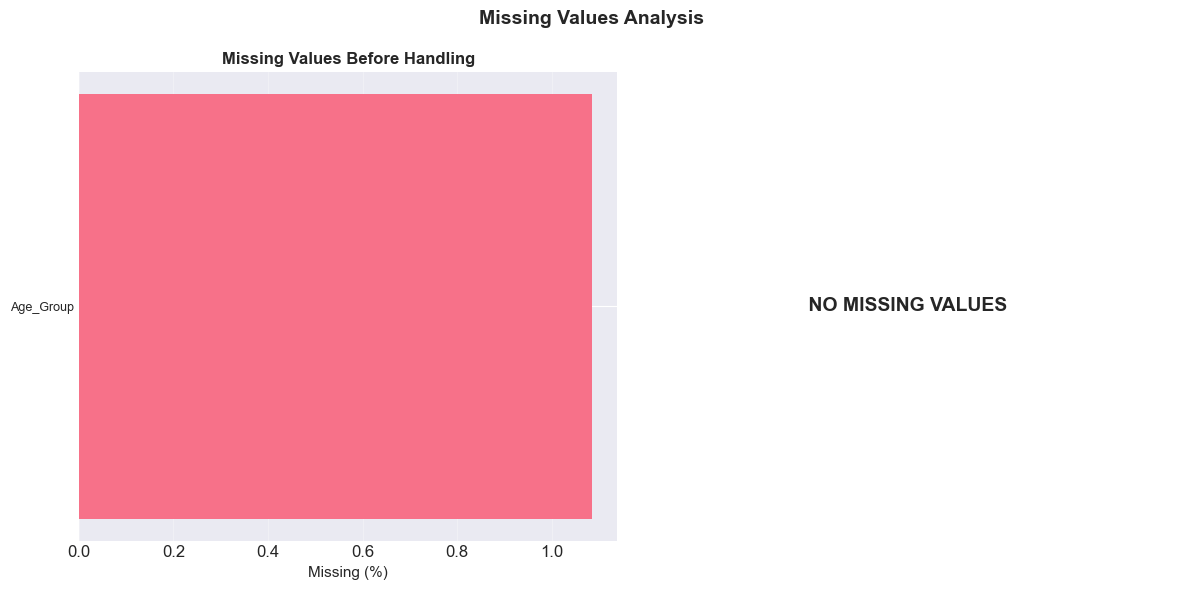

In [108]:
missing_before = X.isnull().sum()
missing_percent_before = (missing_before / len(X)) * 100

print("Missing values before handling:")
missing_summary_before = pd.DataFrame({
    'Feature': missing_before.index,
    'Missing_Count': missing_before.values,
    'Missing_%': missing_percent_before.values
}).sort_values('Missing_Count', ascending=False)

#showing only columns with gaps
missing_with_values = missing_summary_before[missing_summary_before['Missing_Count'] > 0]
if len(missing_with_values) > 0:
    display(missing_with_values.head(15))
    print(f"\n Summary: {len(missing_with_values)} features have missing values")
    print(f"           Total missing values: {missing_before.sum()}")
    print(f"           Overall missing rate: {missing_before.sum() / (X.shape[0] * X.shape[1]) * 100:.2f}%")
else:
    print(" No missing values found in any feature!")

#gap handling strategies
if missing_before.sum() > 0:
    print("\n Applying missing value handling strategies:")
    
    #separating features by type (after correction)
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
    
    print(f"- True numerical features: {len(numeric_cols)}")
    print(f"- Categorical features: {len(categorical_cols)}")
    
    #creating a demo version with processing
    X_demo = X.copy()
    
    #filling numerical features with the median
    for col in numeric_cols:
        if X_demo[col].isnull().sum() > 0:
            median_val = X_demo[col].median()
            missing_count = X_demo[col].isnull().sum()
            X_demo[col] = X_demo[col].fillna(median_val)
            print(f"  ✓ {col:40}: filled {missing_count:3} missing with median ({median_val:.2f})")
    
    #filling categorical features with fashion
    for col in categorical_cols:
        if X_demo[col].isnull().sum() > 0:
            mode_val = X_demo[col].mode()[0] if not X_demo[col].mode().empty else 'Unknown'
            missing_count = X_demo[col].isnull().sum()
            X_demo[col] = X_demo[col].fillna(mode_val)
            print(f"  ✓ {col:40}: filled {missing_count:3} missing with mode ('{mode_val}')")
    
    #checking results
    missing_after = X_demo.isnull().sum().sum()
    print(f"\n Missing values after handling: {missing_after}")
    
    # Visualization: before&after
    if missing_before.sum() > 0:
        plt.figure(figsize=(12, 6))
        
        #before
        plt.subplot(1, 2, 1)
        missing_sorted = missing_summary_before[missing_summary_before['Missing_Count'] > 0]
        plt.barh(range(len(missing_sorted)), missing_sorted['Missing_%'])
        plt.yticks(range(len(missing_sorted)), missing_sorted['Feature'], fontsize=9)
        plt.xlabel('Missing (%)', fontsize=11)
        plt.title('Missing Values Before Handling', fontsize=12, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        
        #after
        plt.subplot(1, 2, 2)
        missing_after_per_col = X_demo.isnull().sum()
        cols_with_missing_after = [col for col in X_demo.columns if missing_after_per_col[col] > 0]
        
        if cols_with_missing_after:
            plt.barh(range(len(cols_with_missing_after)), 
                    [missing_after_per_col[col] for col in cols_with_missing_after])
            plt.yticks(range(len(cols_with_missing_after)), cols_with_missing_after, fontsize=9)
            plt.xlabel('Missing Count', fontsize=11)
            plt.title('Missing Values After Handling', fontsize=12, fontweight='bold')
        else:
            plt.text(0.5, 0.5, ' NO MISSING VALUES', 
                    ha='center', va='center', fontsize=14, fontweight='bold')
            plt.axis('off')
        
        plt.grid(axis='x', alpha=0.3)
        plt.suptitle('Missing Values Analysis', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
else:
    print(" No missing values found - skipping imputation")
    X_demo = X.copy()

In [156]:
if 'Quadrant' in X.columns:
    X = X.drop(columns=['Quadrant'])
    print("Dropped EDA-only feature: Quadrant")

Dropped EDA-only feature: Quadrant


#### 5.2 Categorical variable encoding

In [157]:
# using ONLY X
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()

print(f"Categorical features for encoding ({len(categorical_cols)}):")

cat_analysis = []
for col in categorical_cols:
    cat_analysis.append({
        'Feature': col,
        'Type': str(X[col].dtype),
        'Unique_Values': X[col].nunique(),
        'Sample_Values': X[col].unique()[:3].tolist()
    })

cat_analysis_df = (
    pd.DataFrame(cat_analysis)
    .sort_values('Unique_Values')
    .reset_index(drop=True)
)

display(cat_analysis_df)

# encoding strategy
low_cardinality = cat_analysis_df[cat_analysis_df['Unique_Values'] <= 10]
medium_cardinality = cat_analysis_df[
    (cat_analysis_df['Unique_Values'] > 10) &
    (cat_analysis_df['Unique_Values'] <= 30)
]

print("\nEncoding recommendations:")
print(f"- Low cardinality (≤10): {len(low_cardinality)} → One-Hot Encoding")
print(f"- Medium cardinality (11–30): {len(medium_cardinality)} → One-Hot / Ordinal")

# DEMO (academic only, NOT applied to X)
if len(low_cardinality) > 0:
    demo_col = low_cardinality.iloc[0]['Feature']

    encoder = OneHotEncoder(
        sparse_output=False,
        drop='first',
        handle_unknown='ignore'
    )

    demo_encoded = encoder.fit_transform(X[[demo_col]])
    demo_cols = encoder.get_feature_names_out([demo_col])

    display(
        pd.concat(
            [
                X[[demo_col]].head(3).reset_index(drop=True),
                pd.DataFrame(demo_encoded, columns=demo_cols).head(3)
            ],
            axis=1
        )
    )


Categorical features for encoding (16):


Feature      Type  Unique_Values        Sample_Values
0   Daytime/evening attendance\t  category              2               [1, 0]
1                  International  category              2               [0, 1]
2             Scholarship holder  category              2               [0, 1]
3                         Gender  category              2               [1, 0]
4        Tuition fees up to date  category              2               [1, 0]
5                         Debtor  category              2               [0, 1]
6      Educational special needs  category              2               [0, 1]
7                      Displaced  category              2               [1, 0]
8                      Age_Group  category              5  [17-20, 30+, 21-22]
9                 Marital status  category              6            [1, 2, 4]
10             Application order  category              8            [5, 1, 2]
11                        Course  category             17    [171, 9254, 9070]
12        Previous qualification  category             17          [1, 19, 42]
13              Application mode  category             18          [17, 15, 1]
14                   Nacionality  category             21           [1, 62, 6]
15        Mother's qualification  category             29          [19, 1, 37]


Encoding recommendations:
- Low cardinality (≤10): 11 → One-Hot Encoding
- Medium cardinality (11–30): 5 → One-Hot / Ordinal


Daytime/evening attendance\t  Daytime/evening attendance\t_1
0                            1                             1.0
1                            1                             1.0
2                            1                             1.0

#### 5.3 Numerical feature scaling

!!! - Categorical identifiers encoded as integers were excluded from scaling to avoid introducing artificial distance relationships. Only truly continuous numerical features were standardized.

Found 40 numerical features

 Feature classification:
- True numerical features (for scaling): 31
- Pseudo-numerical (categorical codes): 9

 True numerical features for scaling:
   1. Previous qualification (grade)           : min=95.0, max=190.0, mean=132.6
   2. Father's qualification                   : min=1.0, max=44.0, mean=22.3
   3. Mother's occupation                      : min=0.0, max=194.0, mean=11.0
   4. Father's occupation                      : min=0.0, max=195.0, mean=11.0
   5. Admission grade                          : min=95.0, max=190.0, mean=127.0
   6. Age at enrollment                        : min=17.0, max=70.0, mean=23.3
   7. Curricular units 1st sem (credited)      : min=0.0, max=20.0, mean=0.7
   8. Curricular units 1st sem (enrolled)      : min=0.0, max=26.0, mean=6.3
   9. Curricular units 1st sem (evaluations)   : min=0.0, max=45.0, mean=8.3
  10. Curricular units 1st sem (approved)      : min=0.0, max=26.0, mean=4.7
      ... and 21 more

 StandardScal

Previous qualification (grade)  Father's qualification  \
count                         4424.00                 4424.00   
mean                           132.61                   22.28   
std                             13.19                   15.34   
min                             95.00                    1.00   
25%                            125.00                    3.00   
50%                            133.10                   19.00   
75%                            140.00                   37.00   
max                            190.00                   44.00   

       Mother's occupation  
count              4424.00  
mean                 10.96  
std                  26.42  
min                   0.00  
25%                   4.00  
50%                   5.00  
75%                   9.00  
max                 194.00


After scaling (StandardScaler):


Previous qualification (grade)  Father's qualification  \
count                         4424.00                 4424.00   
mean                            -0.00                    0.00   
std                              1.00                    1.00   
min                             -2.85                   -1.39   
25%                             -0.58                   -1.26   
50%                              0.04                   -0.21   
75%                              0.56                    0.96   
max                              4.35                    1.42   

       Mother's occupation  
count              4424.00  
mean                 -0.00  
std                   1.00  
min                  -0.41  
25%                  -0.26  
50%                  -0.23  
75%                  -0.07  
max                   6.93


 StandardScaler successfully transformed data:
   - Mean of each feature ≈ 0 (target: 0.00)
   - Standard deviation of each feature ≈ 1 (target: 1.00)


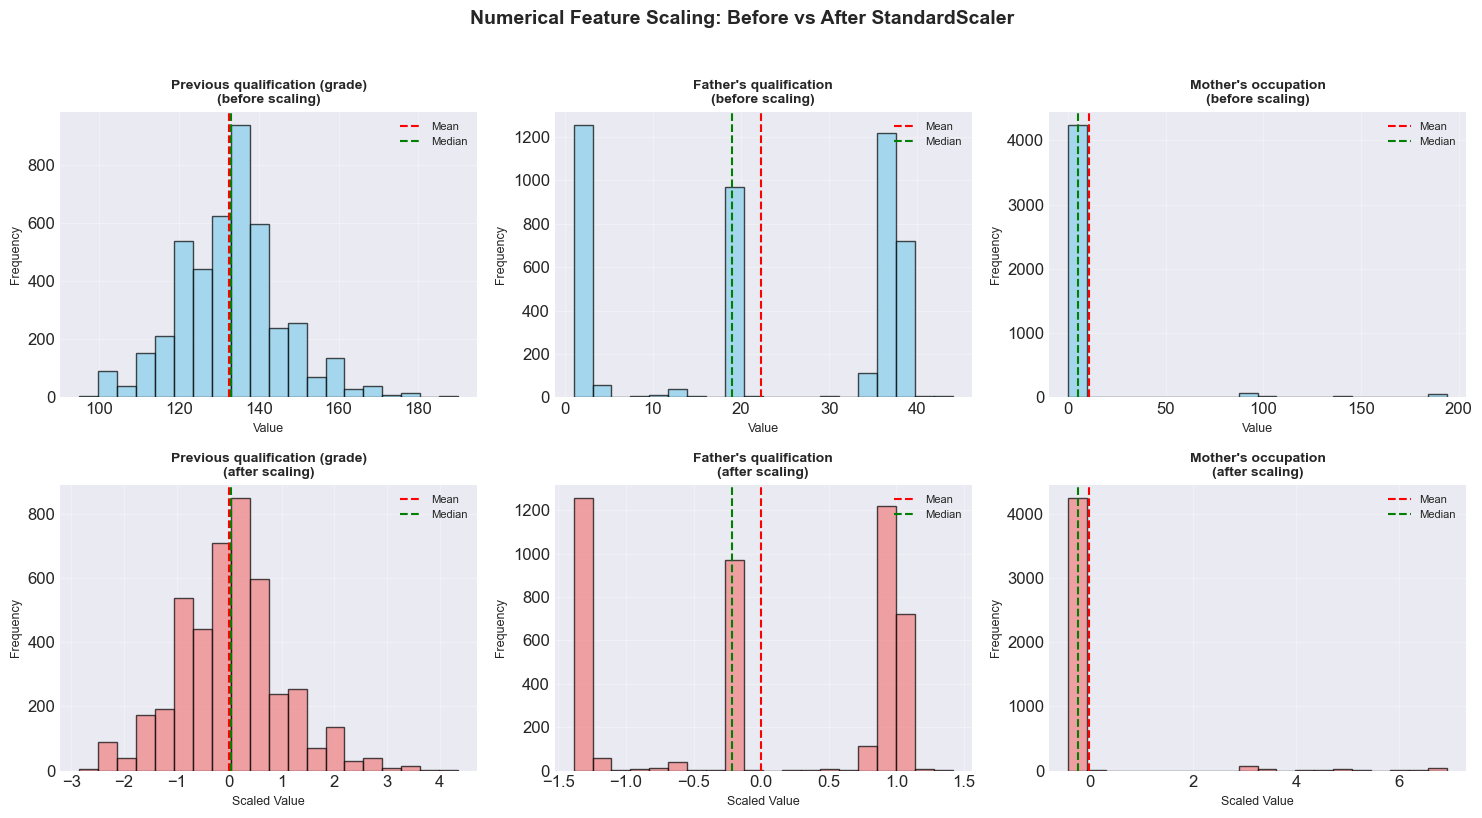


 Pseudo-numerical features (likely categorical):
  - Curricular units 2nd sem (without evaluations) :  10 unique values
  - Unemployment rate                        :  10 unique values
  - Inflation rate                           :   9 unique values
  - GDP                                      :  10 unique values
  - Debtor_Flag                              :   1 unique values
  - Tuition_Up_To_Date_Flag                  :   1 unique values
  - Scholarship_Flag                         :   1 unique values
  - Financial_Stress_Index                   :   1 unique values
  - Previous qualification (grade)_ratio_Admission grade : 2321 unique values

 Recommendation: Convert these to categorical before encoding


In [110]:
#defining numerical features
numeric_cols = X_demo.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) > 0:
    print(f"Found {len(numeric_cols)} numerical features")
    
    #filter out real numerical features (we exclude coded categorical ones)
    true_numeric = []
    pseudo_numeric = [] 
    
    for col in numeric_cols:
        nunique = X_demo[col].nunique()
        if nunique > 10 and X_demo[col].dtype in ['float64', 'int64']:
            
            value_range = X_demo[col].max() - X_demo[col].min()
            if value_range > 5:  
                true_numeric.append(col)
            else:
                pseudo_numeric.append((col, nunique))
        else:
            pseudo_numeric.append((col, nunique))
    
    print(f"\n Feature classification:")
    print(f"- True numerical features (for scaling): {len(true_numeric)}")
    print(f"- Pseudo-numerical (categorical codes): {len(pseudo_numeric)}")
    
    if len(true_numeric) > 0:
        print(f"\n True numerical features for scaling:")
        for i, col in enumerate(true_numeric[:10], 1):
            stats = X_demo[col].describe()
            print(f"  {i:2}. {col:40} : min={stats['min']:.1f}, max={stats['max']:.1f}, mean={stats['mean']:.1f}")
        if len(true_numeric) > 10:
            print(f"      ... and {len(true_numeric) - 10} more")
        
        # Demonstration of StandardScaler
        print("\n StandardScaler demonstration:")
        
        
        demo_numeric_cols = true_numeric[:3] if len(true_numeric) >= 3 else true_numeric
        
        if len(demo_numeric_cols) > 0:
            X_demo_scaled = X_demo[demo_numeric_cols].copy()
            
            print("\nBefore scaling:")
            before_stats = X_demo_scaled.describe().round(2)
            display(before_stats)
            
            #Applying StandardScaler
            scaler = StandardScaler()
            scaled_array = scaler.fit_transform(X_demo_scaled)
            scaled_df = pd.DataFrame(scaled_array, columns=demo_numeric_cols)
            
            print("\nAfter scaling (StandardScaler):")
            after_stats = scaled_df.describe().round(2)
            display(after_stats)
            
            print("\n StandardScaler successfully transformed data:")
            print(f"   - Mean of each feature ≈ 0 (target: 0.00)")
            print(f"   - Standard deviation of each feature ≈ 1 (target: 1.00)")
            
            # visualization: before&after
            fig, axes = plt.subplots(2, len(demo_numeric_cols), figsize=(15, 8))
            
            for i, col in enumerate(demo_numeric_cols):
                #before
                axes[0, i].hist(X_demo_scaled[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
                axes[0, i].axvline(X_demo_scaled[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
                axes[0, i].axvline(X_demo_scaled[col].median(), color='green', linestyle='--', linewidth=1.5, label='Median')
                axes[0, i].set_title(f'{col}\n(before scaling)', fontsize=10, fontweight='bold')
                axes[0, i].set_xlabel('Value', fontsize=9)
                axes[0, i].set_ylabel('Frequency', fontsize=9)
                axes[0, i].legend(fontsize=8)
                axes[0, i].grid(True, alpha=0.3)
                
                #after
                axes[1, i].hist(scaled_df[col], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
                axes[1, i].axvline(scaled_df[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
                axes[1, i].axvline(scaled_df[col].median(), color='green', linestyle='--', linewidth=1.5, label='Median')
                axes[1, i].set_title(f'{col}\n(after scaling)', fontsize=10, fontweight='bold')
                axes[1, i].set_xlabel('Scaled Value', fontsize=9)
                axes[1, i].set_ylabel('Frequency', fontsize=9)
                axes[1, i].legend(fontsize=8)
                axes[1, i].grid(True, alpha=0.3)
            
            plt.suptitle('Numerical Feature Scaling: Before vs After StandardScaler', 
                        fontsize=14, fontweight='bold', y=1.02)
            plt.tight_layout()
            plt.show()
            
    else:
        print("\n No true numerical features found for scaling")
        print("   All numerical columns appear to be categorical codes")
    
    if pseudo_numeric:
        print(f"\n Pseudo-numerical features (likely categorical):")
        for col, nunique in pseudo_numeric[:10]:
            print(f"  - {col:40} : {nunique:3} unique values")
        if len(pseudo_numeric) > 10:
            print(f"      ... and {len(pseudo_numeric) - 10} more")
        
        print("\n Recommendation: Convert these to categorical before encoding")
        
else:
    print("No numerical features found")

### 5.4 Train-test split with stratification

#### - Stratified sampling was used to preserve the original class distribution in both training and test sets, ensuring fair model evaluation.

In [111]:
#Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Target variable classes after encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {i}: {class_name}")

#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_demo, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded  
)

print(f"\n Data successfully split:")
print(f"- Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_demo)*100:.1f}%)")
print(f"- Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_demo)*100:.1f}%)")

Target variable classes after encoding:
  0: Dropout
  1: Enrolled
  2: Graduate

 Data successfully split:
- Training set: 3539 samples (80.0%)
- Test set: 885 samples (20.0%)


Analysis of class distribution

In [112]:
print(f"\n Class distribution analysis:")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


 Class distribution analysis:


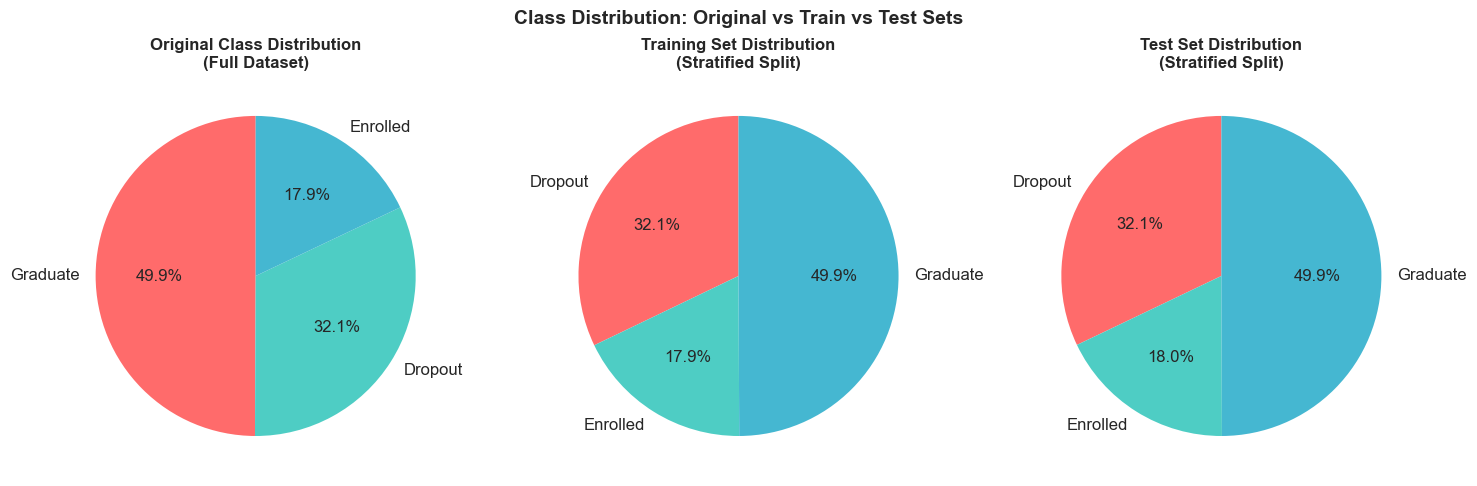

In [113]:
#General distribution
class_counts_total = pd.Series(y).value_counts()
axes[0].pie(class_counts_total.values, labels=class_counts_total.index, 
           autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Original Class Distribution\n(Full Dataset)', fontsize=12, fontweight='bold')

#Training set
train_class_dist = pd.Series(y_train).value_counts().sort_index()
train_percentages = [train_class_dist[i]/len(y_train)*100 for i in range(len(le.classes_))]
axes[1].pie(train_percentages, labels=le.classes_, 
           autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Training Set Distribution\n(Stratified Split)', fontsize=12, fontweight='bold')

#Test sample
test_class_dist = pd.Series(y_test).value_counts().sort_index()
test_percentages = [test_class_dist[i]/len(y_test)*100 for i in range(len(le.classes_))]
axes[2].pie(test_percentages, labels=le.classes_, 
           autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_title('Test Set Distribution\n(Stratified Split)', fontsize=12, fontweight='bold')

plt.suptitle('Class Distribution: Original vs Train vs Test Sets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Table comparison

In [114]:
dist_comparison = pd.DataFrame({
    'Class': le.classes_,
    'Original_Count': [class_counts_total[cls] for cls in le.classes_],
    'Original_%': [class_counts_total[cls]/len(y)*100 for cls in le.classes_],
    'Train_Count': train_class_dist.values,
    'Train_%': train_percentages,
    'Test_Count': test_class_dist.values,
    'Test_%': test_percentages
})

display(dist_comparison.round(2))

#Checking whether proportions are preserved
print("\n Stratification check:")
for i, class_name in enumerate(le.classes_):
    original_pct = class_counts_total[class_name] / len(y) * 100
    train_pct = train_percentages[i]
    test_pct = test_percentages[i]
    
    diff_train = abs(original_pct - train_pct)
    diff_test = abs(original_pct - test_pct)
    
    status = "✓" if diff_train < 1.0 and diff_test < 1.0 else "!"
    print(f"{status} {class_name:10}: Original={original_pct:5.1f}%, Train={train_pct:5.1f}% (Δ={diff_train:.1f}%), Test={test_pct:5.1f}% (Δ={diff_test:.1f}%)")

Class  Original_Count  Original_%  Train_Count  Train_%  Test_Count  \
0   Dropout            1421       32.12         1137    32.13         284   
1  Enrolled             794       17.95          635    17.94         159   
2  Graduate            2209       49.93         1767    49.93         442   

   Test_%  
0   32.09  
1   17.97  
2   49.94


 Stratification check:
✓ Dropout   : Original= 32.1%, Train= 32.1% (Δ=0.0%), Test= 32.1% (Δ=0.0%)
✓ Enrolled  : Original= 17.9%, Train= 17.9% (Δ=0.0%), Test= 18.0% (Δ=0.0%)
✓ Graduate  : Original= 49.9%, Train= 49.9% (Δ=0.0%), Test= 49.9% (Δ=0.0%)


#### 5.5 Preprocessing pipeline creation

- A preprocessing pipeline was constructed using ColumnTransformer.
Numerical features were imputed with the median and standardized using StandardScaler.
Categorical features were imputed with a constant value and encoded using One-Hot Encoding
with drop-first to avoid multicollinearity.

EDA-derived features such as quadrant-based variables were excluded to prevent data leakage.
The pipeline was fitted on the training set only and applied consistently to the test set.


In [159]:
#defining features by type (after correction)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

#filtering out real numerical features
true_numeric_features = []
for col in numeric_features:
    if X_train[col].nunique() > 10 and (X_train[col].max() - X_train[col].min()) > 5:
        true_numeric_features.append(col)

print(f"Pipeline configuration:")
print(f"- True numerical features: {len(true_numeric_features)}")
print(f"- Categorical features: {len(categorical_features)}")

if len(true_numeric_features) > 0:
    print(f"\n Numerical features for scaling:")
    for i, col in enumerate(true_numeric_features[:5], 1):
        print(f"  {i}. {col}")
    if len(true_numeric_features) > 5:
        print(f"     ... and {len(true_numeric_features) - 5} more")

if len(categorical_features) > 0:
    print(f"\n Categorical features for encoding:")
    for i, col in enumerate(categorical_features[:5], 1):
        nunique = X_train[col].nunique()
        print(f"  {i}. {col} ({nunique} unique values)")
    if len(categorical_features) > 5:
        print(f"     ... and {len(categorical_features) - 5} more")

#creating transformers for numerical features
if len(true_numeric_features) > 0:
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  
        ('scaler', StandardScaler())  
    ])
else:
    numeric_transformer = 'drop'  
    print("\n No true numerical features - skipping numerical transformer")

#creating transformers for categorical features
if len(categorical_features) > 0:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполняем пропуски
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))  # One-Hot Encoding
    ])
else:
    categorical_transformer = 'drop'
    print("\n No categorical features - skipping categorical transformer")

#combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, true_numeric_features) if true_numeric_features else ('num', 'drop', []),
        ('cat', categorical_transformer, categorical_features) if categorical_features else ('cat', 'drop', [])
    ],
    remainder='drop'  
)

print(f"\n Preprocessing pipeline created successfully!")
print("Pipeline structure:")
if true_numeric_features:
    print("1. For numerical features: Imputer (median) → Scaler (StandardScaler)")
if categorical_features:
    print("2. For categorical features: Imputer (constant) → Encoder (OneHot, drop first)")


print(f"\n Pipeline demonstration:")

#training and transforming data
if len(true_numeric_features) > 0 or len(categorical_features) > 0:
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    print(f"Original dimensions: {X_train.shape}")
    print(f"Processed dimensions: {X_train_processed.shape}")
    
    #obtaining the names of the features after processing
    all_feature_names = []

    if true_numeric_features and 'num' in preprocessor.named_transformers_:
        all_feature_names.extend(true_numeric_features)
        
    if categorical_features and 'cat' in preprocessor.named_transformers_:
        cat_encoder = preprocessor.named_transformers_['cat']['onehot']
        cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
        all_feature_names.extend(cat_feature_names)
    
    
    print(f"\n Number of features after processing: {len(all_feature_names)}")
    if categorical_features:
        print(f"• Created binary features from categorical: {len(cat_feature_names) if 'cat_feature_names' in locals() else 0}")
    if true_numeric_features:
        print(f"• Preserved numerical features: {len(true_numeric_features)}")
    
    # saving dimensions for future use
    print(f"\n Dimensions saved for model training:")
    print(f"• X_train_processed: {X_train_processed.shape}")
    print(f"• X_test_processed: {X_test_processed.shape}")
    print(f"• y_train: {y_train.shape}")
    print(f"• y_test: {y_test.shape}")
    
    # sample of transformed data
    print(f"\n Sample of processed training data (first 3 rows, first 10 features):")
    sample_df = pd.DataFrame(X_train_processed[:3, :10], 
                            columns=all_feature_names[:10] if all_feature_names else [f'feature_{i}' for i in range(10)])
    display(sample_df.round(3))
    
else:
    print(" ERROR: No features selected for preprocessing!")
    print("   Check your feature type classification")

Pipeline configuration:
- True numerical features: 31
- Categorical features: 17

 Numerical features for scaling:
  1. Previous qualification (grade)
  2. Father's qualification
  3. Mother's occupation
  4. Father's occupation
  5. Admission grade
     ... and 26 more

 Categorical features for encoding:
  1. Marital status (6 unique values)
  2. Application mode (18 unique values)
  3. Application order (8 unique values)
  4. Course (17 unique values)
  5. Daytime/evening attendance	 (2 unique values)
     ... and 12 more

 Preprocessing pipeline created successfully!
Pipeline structure:
1. For numerical features: Imputer (median) → Scaler (StandardScaler)
2. For categorical features: Imputer (constant) → Encoder (OneHot, drop first)

 Pipeline demonstration:
Original dimensions: (3539, 57)
Processed dimensions: (3539, 152)

 Number of features after processing: 152
• Created binary features from categorical: 121
• Preserved numerical features: 31

 Dimensions saved for model traini

Previous qualification (grade)  Father's qualification  \
0                          -0.961                  -1.390   
1                           0.031                  -1.390   
2                           0.554                   1.025   

   Mother's occupation  Father's occupation  Admission grade  \
0               -0.376               -0.355           -0.570   
1                3.036               -0.395           -0.473   
2               -0.070               -0.197            0.903   

   Age at enrollment  Curricular units 1st sem (credited)  \
0             -0.296                                3.481   
1              2.334                               -0.301   
2             -0.296                               -0.301   

   Curricular units 1st sem (enrolled)  \
0                                1.898   
1                               -0.507   
2                               -0.106   

   Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  
0                                   1.363                                1.712  
1                                  -0.786                               -1.519  
2                                   1.125                               -0.227

## 6. Model Development: Basic Models

Categorical identifiers encoded as integers were excluded from scaling to avoid introducing artificial distance relationships. Only truly continuous numerical features were standardized.

#### Model evaluation function

In [118]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="", 
                   cv_folds=5, return_model=False):
    """
    Comprehensive machine learning model evaluation
    
    Parameters:
    -----------
    model : sklearn model object
    X_train, y_train : training data
    X_test, y_test : test data
    model_name : model name for display
    cv_folds : number of folds for cross-validation
    return_model : whether to return trained model
    
    Returns:
    --------
    dict : dictionary with model metrics
    """
    
    print(f"\n{'-'*60}")
    print(f" MODEL TESTING: {model_name}")
    print(f"{'-'*60}")
    
    results = {'model_name': model_name}
    
    # Model training
    print(" Training model...")
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    results['training_time'] = training_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilities (if model provides them)
    try:
        y_test_proba = model.predict_proba(X_test)
        has_proba = True
    except:
        y_test_proba = None
        has_proba = False
        print(" Model does not provide probabilities")
    
    # Calculate metrics
    print(" Calculating metrics...")
    
    # Basic metrics
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision_macro': precision_score(y_test, y_test_pred, average='macro'),
        'test_recall_macro': recall_score(y_test, y_test_pred, average='macro'),
        'test_f1_macro': f1_score(y_test, y_test_pred, average='macro'),
        'test_precision_weighted': precision_score(y_test, y_test_pred, average='weighted'),
        'test_recall_weighted': recall_score(y_test, y_test_pred, average='weighted'),
        'test_f1_weighted': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    # ROC-AUC if probabilities exist
    if has_proba and y_test_proba is not None:
        try:
            metrics['test_roc_auc_ovr'] = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
            metrics['test_roc_auc_ovo'] = roc_auc_score(y_test, y_test_proba, multi_class='ovo', average='weighted')
        except:
            metrics['test_roc_auc_ovr'] = None
            metrics['test_roc_auc_ovo'] = None
    
    # Cross-validation
    print(" Cross-validation...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    metrics['cv_mean_accuracy'] = cv_scores.mean()
    metrics['cv_std_accuracy'] = cv_scores.std()
    
    # Save metrics
    results.update(metrics)
    
    # Display results
    print(f"\n {model_name} RESULTS:")
    print(f"{'-'*40}")
    
    # Formatted metric display
    metric_display = {
        'Accuracy (train)': f"{metrics['train_accuracy']:.4f}",
        'Accuracy (test)': f"{metrics['test_accuracy']:.4f}",
        'CV Accuracy (mean±std)': f"{metrics['cv_mean_accuracy']:.4f} ± {metrics['cv_std_accuracy']:.4f}",
        'F1-Score (macro)': f"{metrics['test_f1_macro']:.4f}",
        'F1-Score (weighted)': f"{metrics['test_f1_weighted']:.4f}",
        'Training Time': f"{training_time:.2f}s"
    }
    
    if metrics.get('test_roc_auc_ovr'):
        metric_display['ROC-AUC (OVR)'] = f"{metrics['test_roc_auc_ovr']:.4f}"
    
    for metric_name, value in metric_display.items():
        print(f"{metric_name:25}: {value}")
    
    # Classification Report
    print(f"\n Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=le.classes_))
    
    # Confusion Matrix
    print(" Confusion Matrix:")
    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Class', fontsize=12)
    plt.xlabel('Predicted Class', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # ROC Curves for multiclass classification
    if has_proba and y_test_proba is not None and metrics.get('test_roc_auc_ovr'):
        print(" ROC curves:")
        
        # Binarize output
        from sklearn.preprocessing import label_binarize
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        # Calculate ROC curve for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        n_classes = len(le.classes_)
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # ROC curves visualization
        plt.figure(figsize=(10, 8))
        colors = plt.cm.Set1(np.linspace(0, 1, n_classes))
        
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random model')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC curves - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Precision-Recall Curve
    if has_proba and y_test_proba is not None:
        print(" Precision-Recall curves:")
        
        plt.figure(figsize=(10, 8))
        colors = plt.cm.Set1(np.linspace(0, 1, len(le.classes_)))
        
        for i, color in zip(range(len(le.classes_)), colors):
            precision, recall, _ = precision_recall_curve(
                (y_test == i).astype(int), 
                y_test_proba[:, i]
            )
            plt.plot(recall, precision, color=color, lw=2,
                     label=f'{le.classes_[i]}')
        
        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'Precision-Recall curves - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="upper right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    print(f"\n Model {model_name} evaluation completed!")
    
    if return_model:
        return results, model
    else:
        return results

# Import time module
import time

#### Basic model: Logistic Regression


------------------------------------------------------------
 MODEL TESTING: Logistic Regression (Baseline)
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Logistic Regression (Baseline) RESULTS:
----------------------------------------
Accuracy (train)         : 0.9808
Accuracy (test)          : 0.9706
CV Accuracy (mean±std)   : 0.9706 ± 0.0073
F1-Score (macro)         : 0.9636
F1-Score (weighted)      : 0.9705
Training Time            : 12.35s
ROC-AUC (OVR)            : 0.9980

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.95      0.98      0.96       284
    Enrolled       0.97      0.92      0.94       159
    Graduate       0.98      0.99      0.99       442

    accuracy                           0.97       885
   macro avg       0.97      0.96      0.96       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


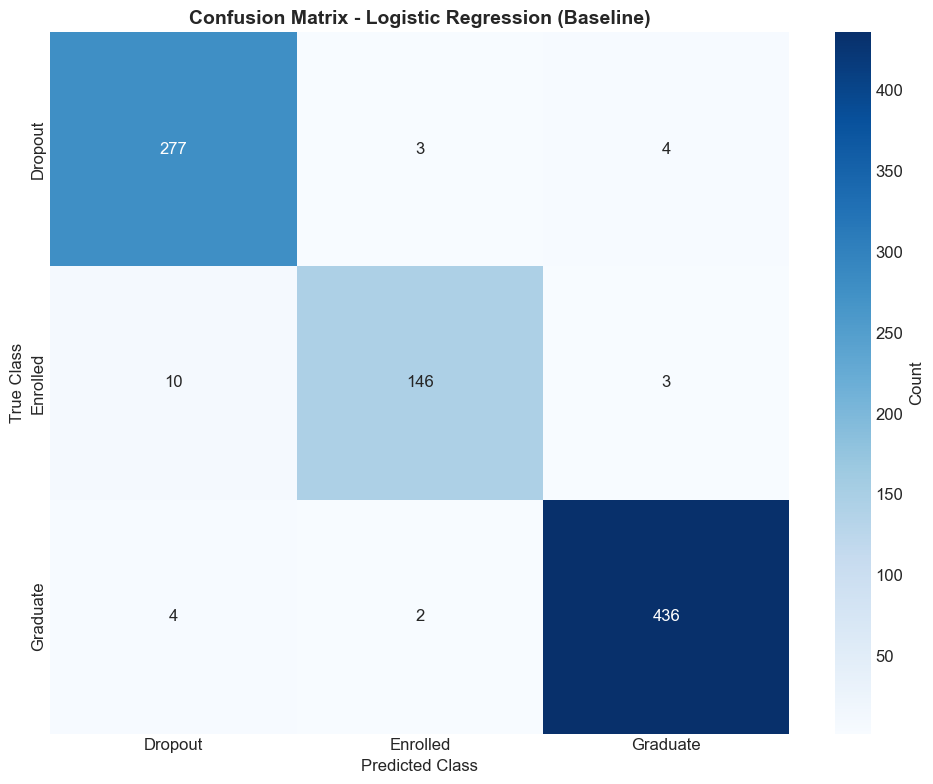

 ROC curves:


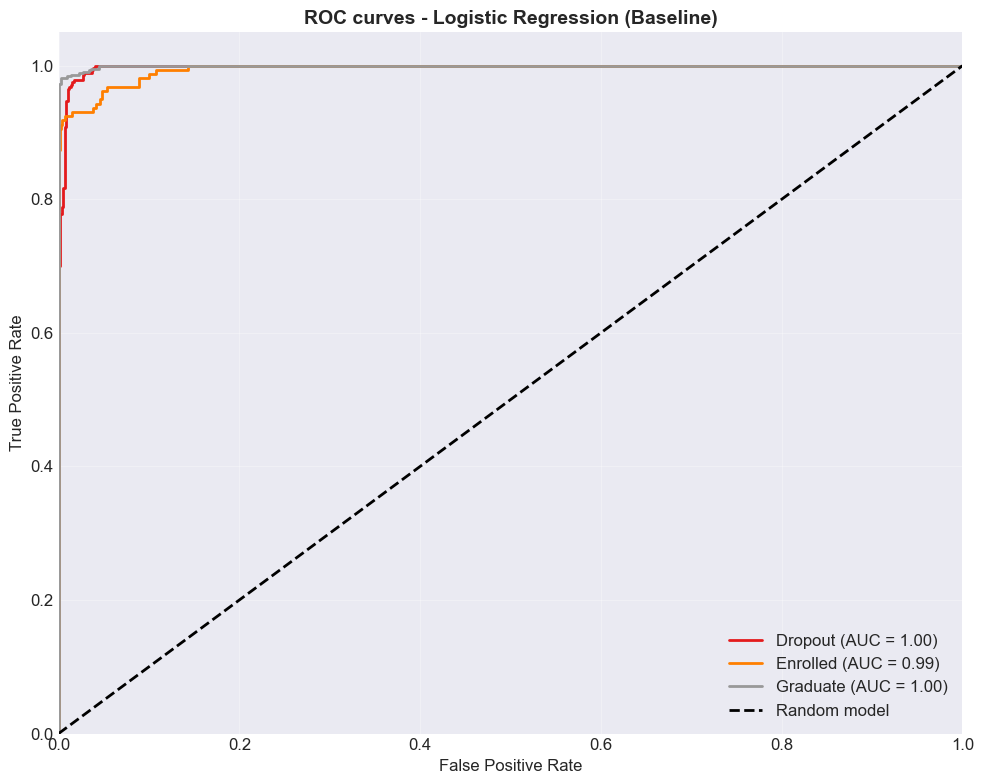

 Precision-Recall curves:


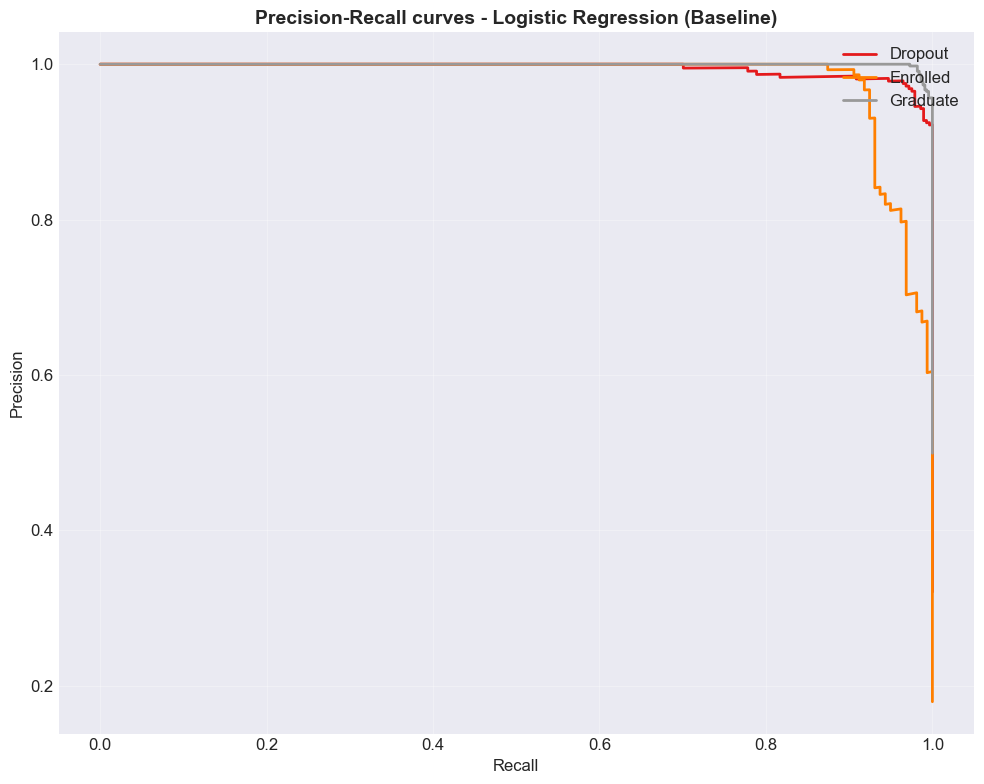


 Model Logistic Regression (Baseline) evaluation completed!


In [119]:
# Create pipeline with preprocessing and model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# Evaluate model
lr_results = evaluate_model(
    lr_pipeline, X_train, y_train, X_test, y_test,
    model_name="Logistic Regression (Baseline)",
    return_model=False
)

#### Model 2: Random Forest


------------------------------------------------------------
 MODEL TESTING: Random Forest
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Random Forest RESULTS:
----------------------------------------
Accuracy (train)         : 1.0000
Accuracy (test)          : 0.9706
CV Accuracy (mean±std)   : 0.9757 ± 0.0065
F1-Score (macro)         : 0.9665
F1-Score (weighted)      : 0.9705
Training Time            : 1.22s
ROC-AUC (OVR)            : 0.9979

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.95      0.98      0.97       284
    Enrolled       0.99      0.92      0.95       159
    Graduate       0.98      0.98      0.98       442

    accuracy                           0.97       885
   macro avg       0.97      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


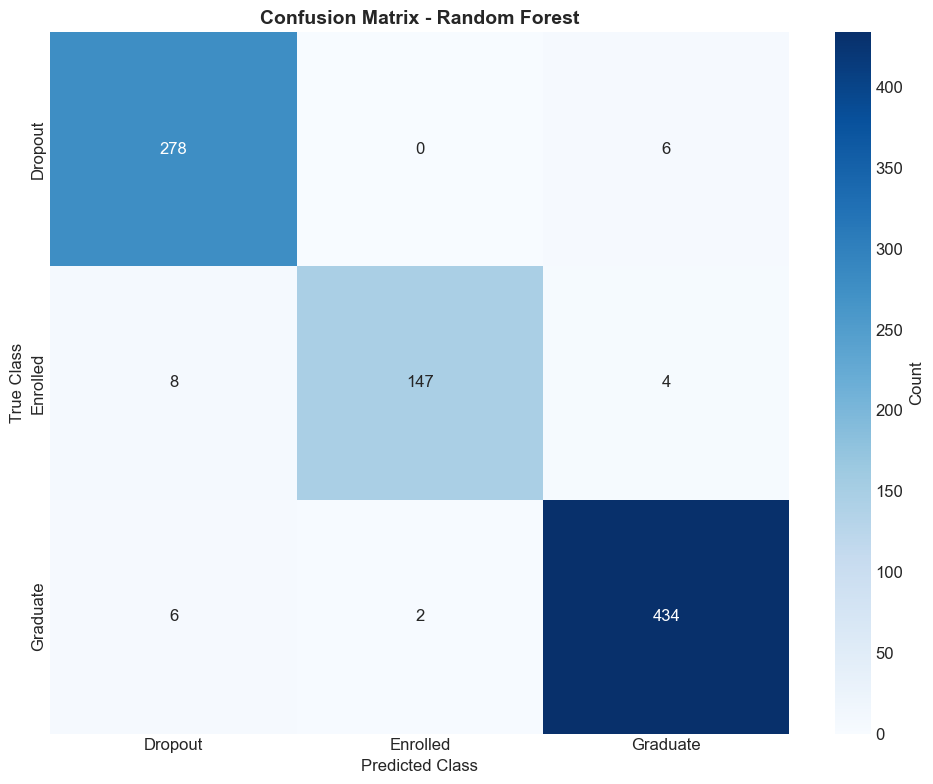

 ROC curves:


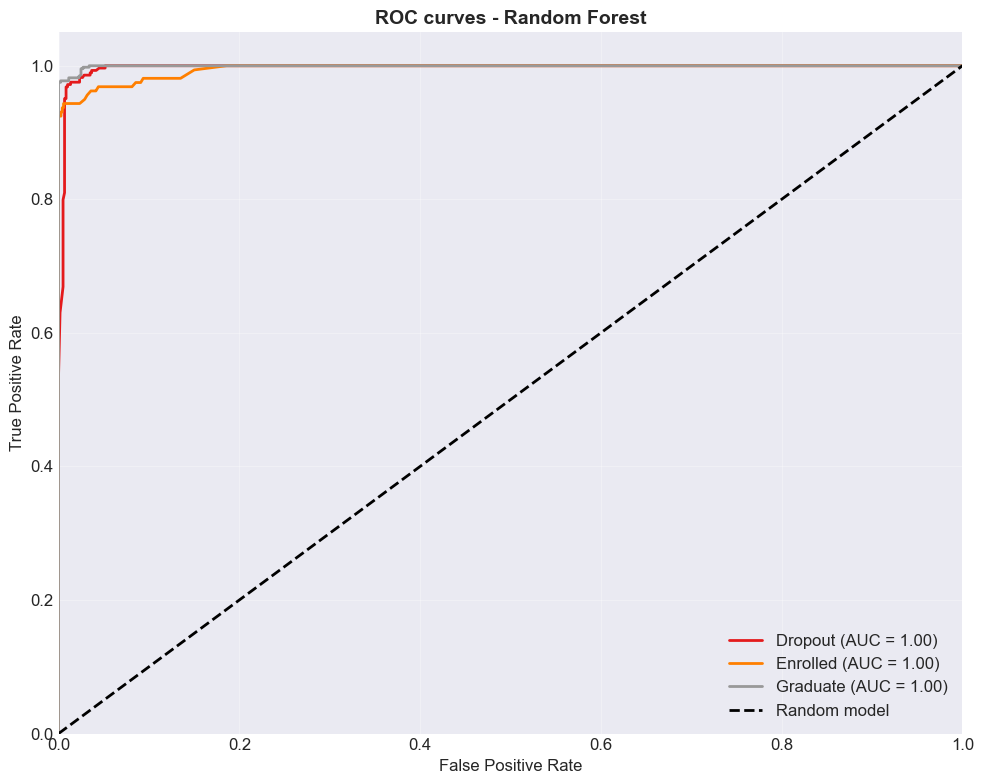

 Precision-Recall curves:


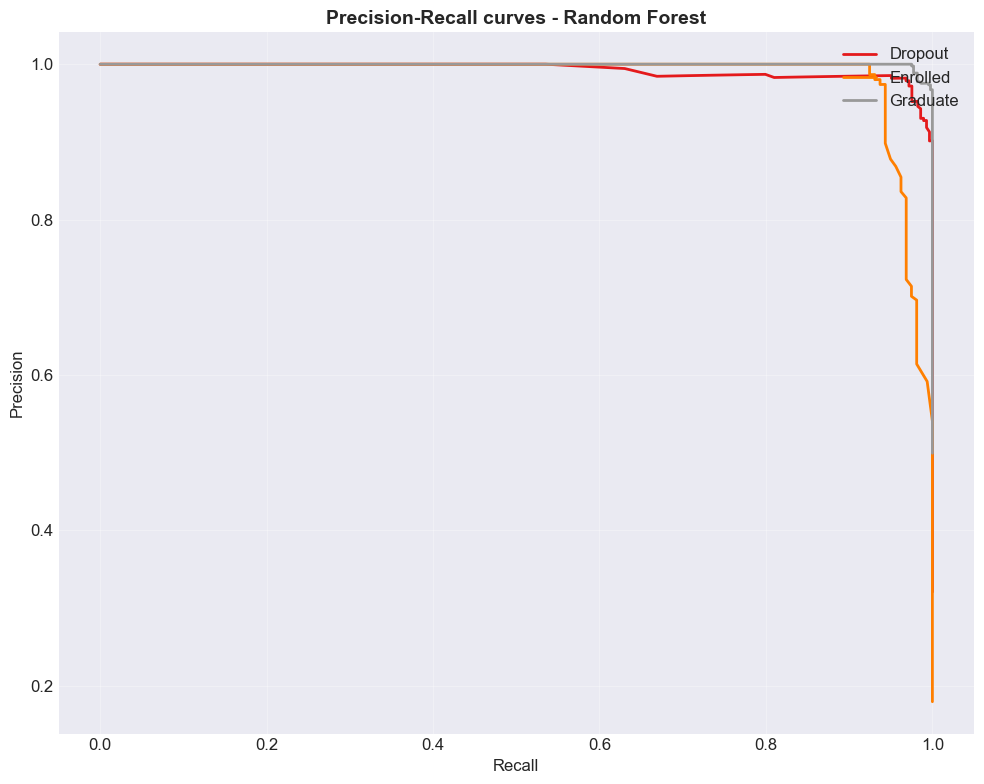


 Model Random Forest evaluation completed!


In [120]:
# Create pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,  # Increased for better performance
        random_state=42,
        class_weight='balanced_subsample',  # Better for imbalance
        n_jobs=-1
    ))
])

# Evaluate model
rf_results = evaluate_model(
    rf_pipeline, X_train, y_train, X_test, y_test,
    model_name="Random Forest",
    return_model=False
)

#### Model 3: Gradient Boosting


------------------------------------------------------------
 MODEL TESTING: Gradient Boosting
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Gradient Boosting RESULTS:
----------------------------------------
Accuracy (train)         : 1.0000
Accuracy (test)          : 0.9729
CV Accuracy (mean±std)   : 0.9729 ± 0.0055
F1-Score (macro)         : 0.9691
F1-Score (weighted)      : 0.9728
Training Time            : 31.87s
ROC-AUC (OVR)            : 0.9987

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.98      0.97       284
    Enrolled       0.99      0.93      0.96       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.97       885
   macro avg       0.97      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


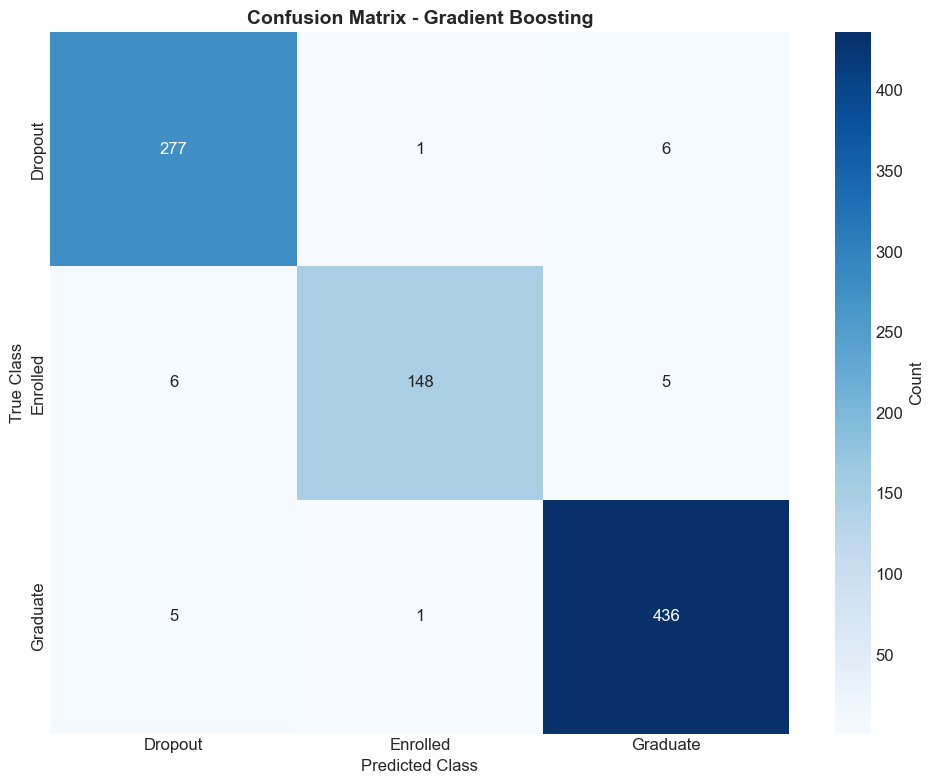

 ROC curves:


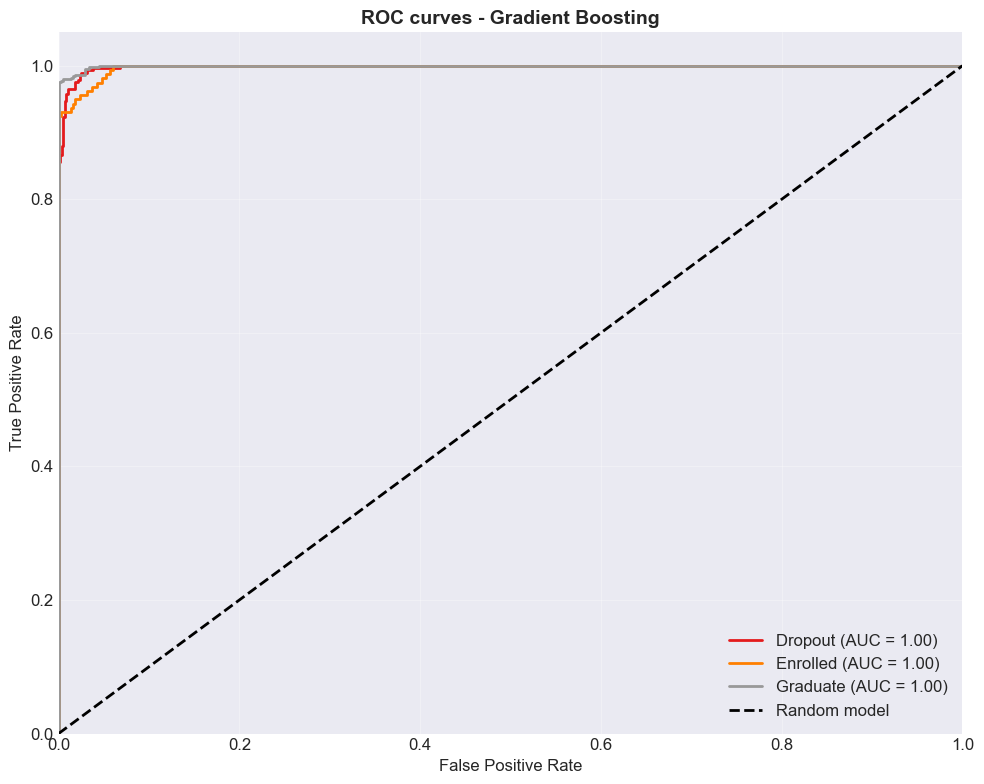

 Precision-Recall curves:


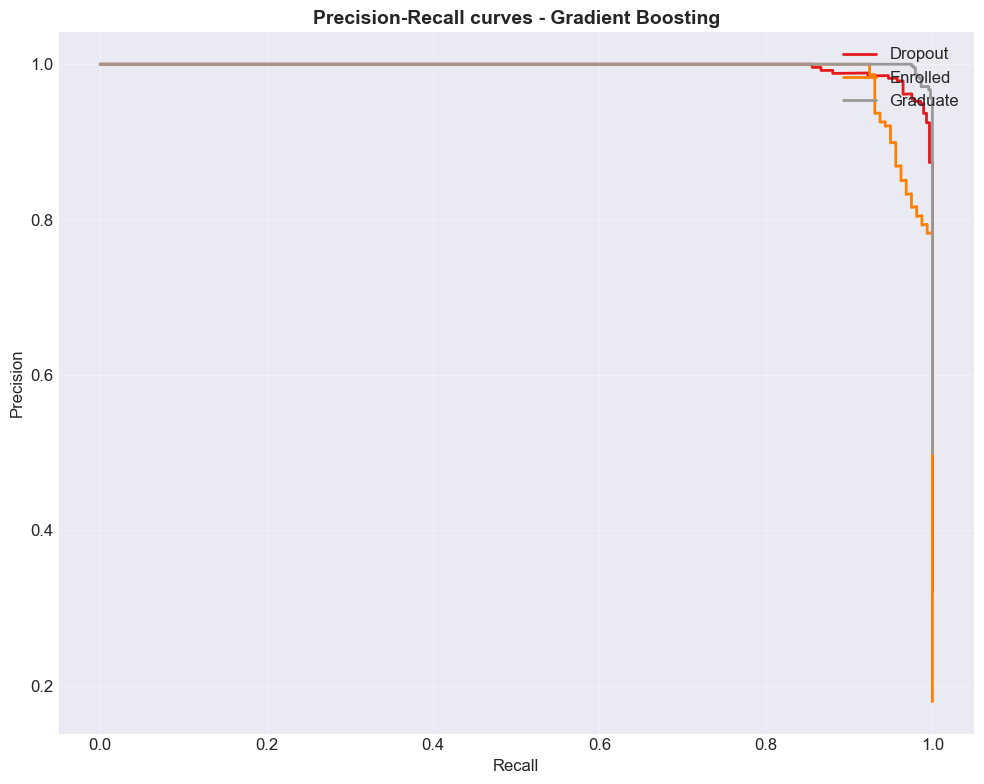


 Model Gradient Boosting evaluation completed!


In [124]:
# Create pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

# Evaluate model
gb_results = evaluate_model(
    gb_pipeline, X_train, y_train, X_test, y_test,
    model_name="Gradient Boosting",
    return_model=False
)

#### Model 4: Support Vector Machine


------------------------------------------------------------
 MODEL TESTING: Support Vector Machine
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Support Vector Machine RESULTS:
----------------------------------------
Accuracy (train)         : 0.9763
Accuracy (test)          : 0.9650
CV Accuracy (mean±std)   : 0.9681 ± 0.0064
F1-Score (macro)         : 0.9576
F1-Score (weighted)      : 0.9649
Training Time            : 2.60s
ROC-AUC (OVR)            : 0.9952

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.94      0.97      0.95       284
    Enrolled       0.97      0.91      0.94       159
    Graduate       0.98      0.98      0.98       442

    accuracy                           0.96       885
   macro avg       0.96      0.95      0.96       885
weighted avg       0.97      0.96      0.96       885

 Confusion Matrix:


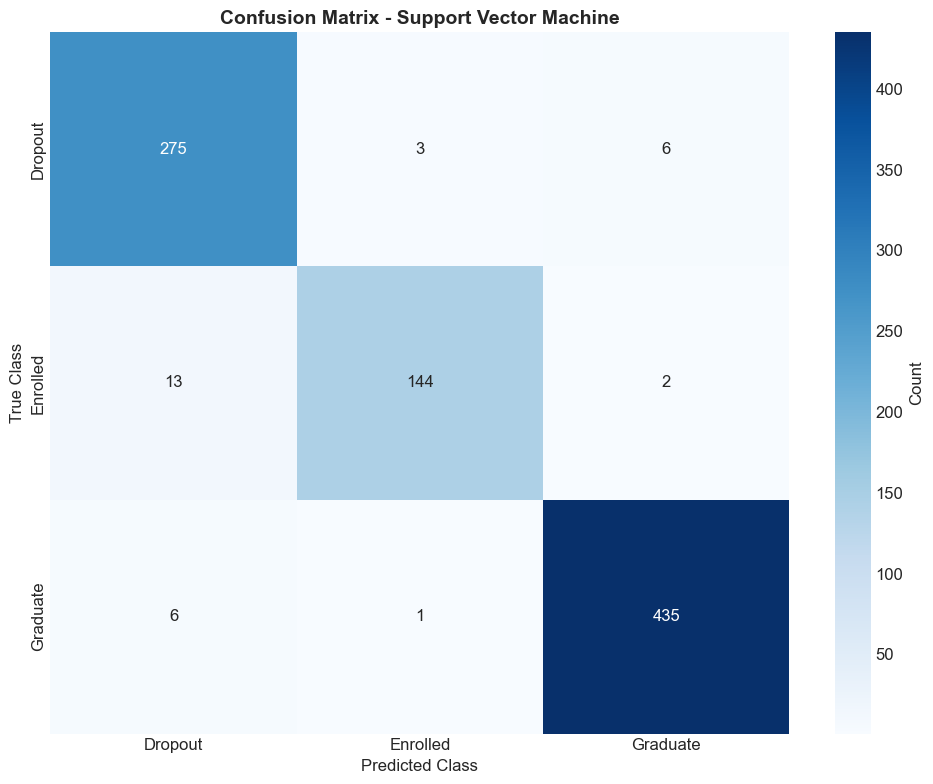

 ROC curves:


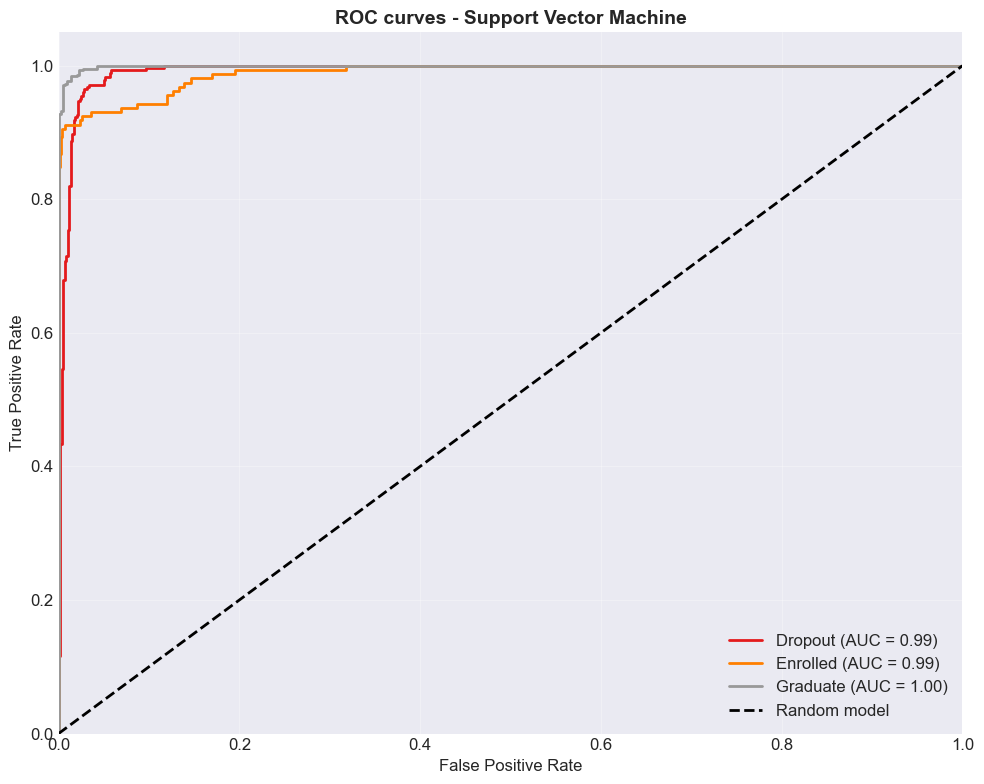

 Precision-Recall curves:


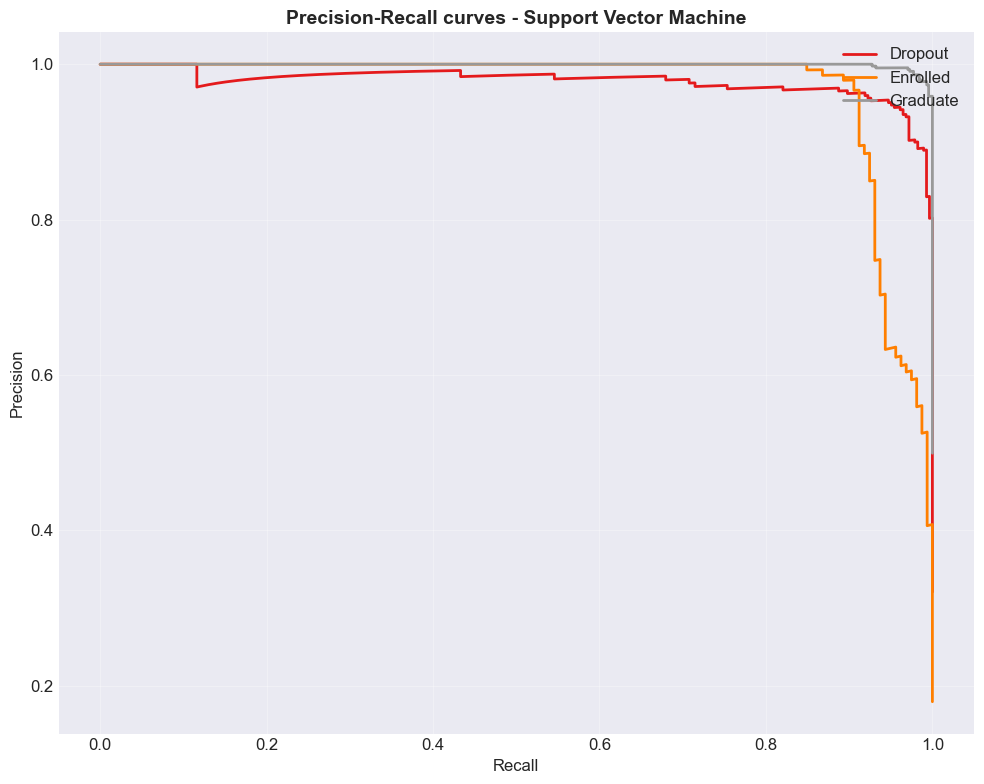


 Model Support Vector Machine evaluation completed!


In [125]:
# Create pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        random_state=42,
        class_weight='balanced'
    ))
])

# Evaluate model
svm_results = evaluate_model(
    svm_pipeline, X_train, y_train, X_test, y_test,
    model_name="Support Vector Machine",
    return_model=False
)

#### Model 5: K-Nearest Neighbors


------------------------------------------------------------
 MODEL TESTING: K-Nearest Neighbors
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 K-Nearest Neighbors RESULTS:
----------------------------------------
Accuracy (train)         : 1.0000
Accuracy (test)          : 0.9322
CV Accuracy (mean±std)   : 0.9229 ± 0.0145
F1-Score (macro)         : 0.9064
F1-Score (weighted)      : 0.9314
Training Time            : 0.09s
ROC-AUC (OVR)            : 0.9804

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.92      0.91       284
    Enrolled       0.86      0.80      0.83       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.93       885
   macro avg       0.91      0.90      0.91       885
weighted avg       0.93      0.93      0.93       885

 Confusion Matrix:


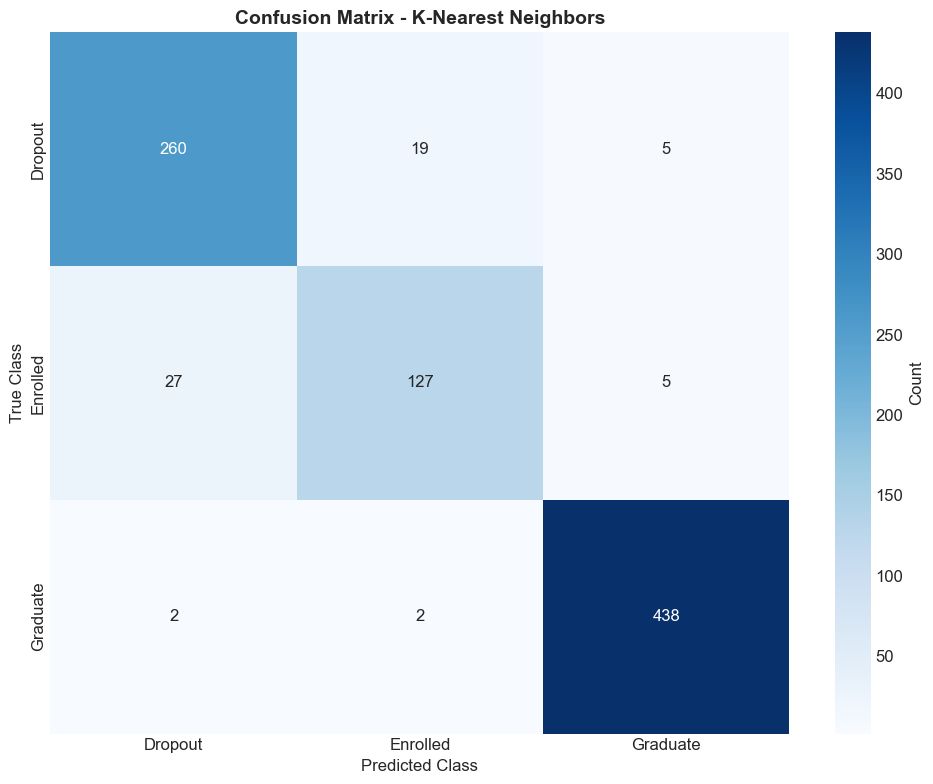

 ROC curves:


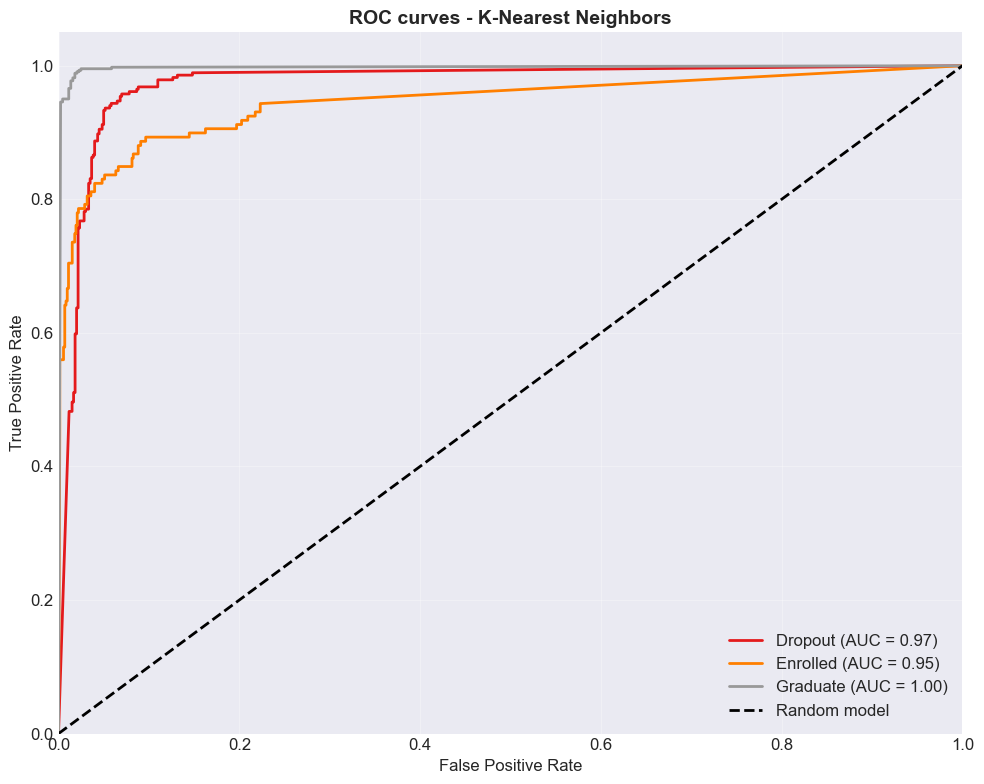

 Precision-Recall curves:


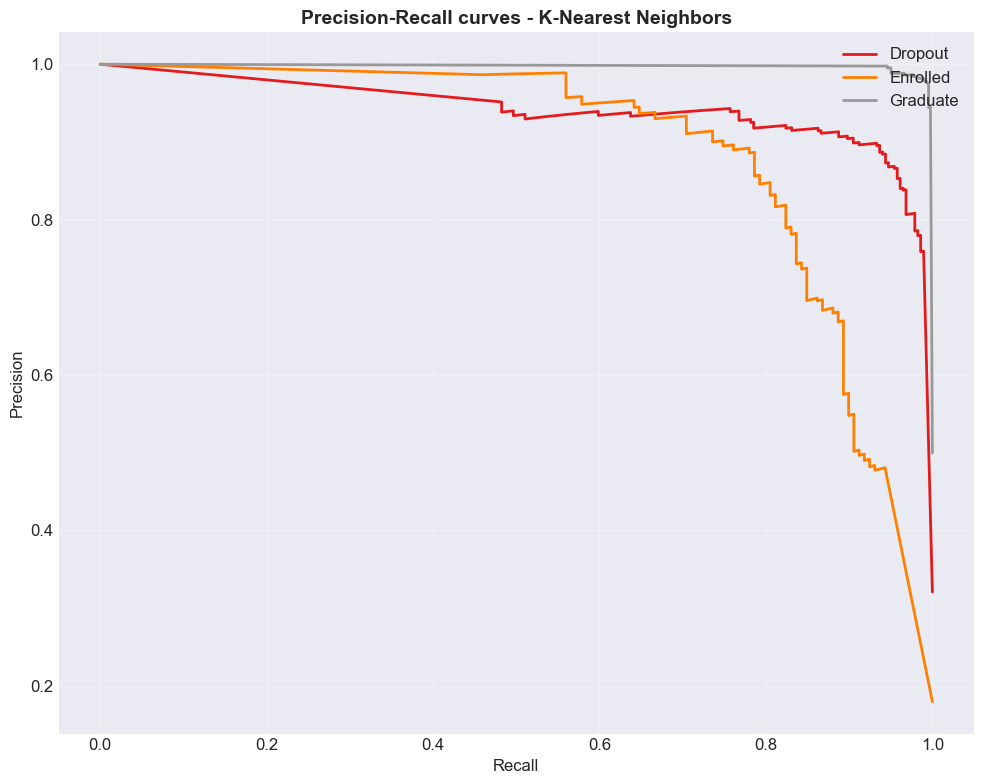


 Model K-Nearest Neighbors evaluation completed!


In [126]:
# Create pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        n_jobs=-1
    ))
])

# Evaluate model
knn_results = evaluate_model(
    knn_pipeline, X_train, y_train, X_test, y_test,
    model_name="K-Nearest Neighbors",
    return_model=False
)

#### **Basic models comparison**

In [127]:
# Collect all results
all_basic_results = [lr_results, rf_results, gb_results, svm_results, knn_results]

# Create DataFrame for comparison
comparison_metrics = [
    'test_accuracy', 'test_f1_weighted', 'test_roc_auc_ovr',
    'cv_mean_accuracy', 'cv_std_accuracy', 'training_time'
]

comparison_data = []
for result in all_basic_results:
    row = {'Model': result['model_name']}
    for metric in comparison_metrics:
        value = result.get(metric, None)
        row[metric] = value if value is not None else np.nan
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

# Rename columns for better readability
column_names = {
    'test_accuracy': 'Accuracy',
    'test_f1_weighted': 'F1-Score',
    'test_roc_auc_ovr': 'ROC-AUC',
    'cv_mean_accuracy': 'CV Accuracy',
    'cv_std_accuracy': 'CV Std',
    'training_time': 'Train Time (s)'
}
comparison_df = comparison_df.rename(columns=column_names)

print("\n Metrics summary table:")
display(comparison_df.round(4))

# Visualization comparison
fig, axes = plt.subplots(3, 2, figsize=(16, 14))


 Metrics summary table:


Model  Accuracy  F1-Score  ROC-AUC  CV Accuracy  \
0  Logistic Regression (Baseline)    0.9706    0.9705   0.9980       0.9706   
1                   Random Forest    0.9706    0.9705   0.9979       0.9757   
2               Gradient Boosting    0.9729    0.9728   0.9987       0.9729   
3          Support Vector Machine    0.9650    0.9649   0.9952       0.9681   
4             K-Nearest Neighbors    0.9322    0.9314   0.9804       0.9229   

   CV Std  Train Time (s)  
0  0.0073         12.3505  
1  0.0065          1.2186  
2  0.0055         31.8741  
3  0.0064          2.5976  
4  0.0145          0.0924

#### Plot 1: Accuracy

In [128]:
models = comparison_df['Model']
accuracy = comparison_df['Accuracy']

bars1 = axes[0, 0].bar(models, accuracy, color='skyblue', edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(accuracy):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

#### Plot 2: F1-Score

In [129]:
f1_scores = comparison_df['F1-Score']
bars2 = axes[0, 1].bar(models, f1_scores, color='lightcoral', edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('F1-Score', fontsize=11)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(f1_scores):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

#### Plot 3: ROC-AUC

In [130]:
roc_auc = comparison_df['ROC-AUC']
bars3 = axes[1, 0].bar(models, roc_auc, color='lightgreen', edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('Model ROC-AUC Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('ROC-AUC', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(roc_auc):
    if not np.isnan(v):
        axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

#### Plot 4: CV Accuracy with errors

In [131]:
x_pos = range(len(models))
cv_acc = comparison_df['CV Accuracy']
cv_std = comparison_df['CV Std']

axes[1, 1].errorbar(x_pos, cv_acc, yerr=cv_std, 
                    fmt='o-', color='purple', ecolor='gray', 
                    capsize=5, capthick=2, linewidth=2, markersize=8)
axes[1, 1].set_title('Cross-validation Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Accuracy ± Std', fontsize=11)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=45)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, alpha=0.3)

for i, (mean, std) in enumerate(zip(cv_acc, cv_std)):
    axes[1, 1].text(i, mean + std + 0.02, f'{mean:.3f}±{std:.3f}', 
                   ha='center', fontsize=9, fontweight='bold')

#### Plot 5: Training Time

In [132]:
train_times = comparison_df['Train Time (s)']
bars5 = axes[2, 0].bar(models, train_times, color='orange', edgecolor='black', linewidth=1.5)
axes[2, 0].set_title('Model Training Time', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Time (seconds)', fontsize=11)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(train_times):
    axes[2, 0].text(i, v + max(train_times)*0.01, f'{v:.1f}s', 
                   ha='center', fontsize=9, fontweight='bold')

#### Plot 6: Performance Trade-off (Accuracy vs Time)

In [133]:
axes[2, 1].scatter(train_times, accuracy, s=100, alpha=0.7, c=range(len(models)), cmap='viridis')
axes[2, 1].set_title('Accuracy vs Training Time Trade-off', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Training Time (s)', fontsize=11)
axes[2, 1].set_ylabel('Accuracy', fontsize=11)
axes[2, 1].grid(True, alpha=0.3)

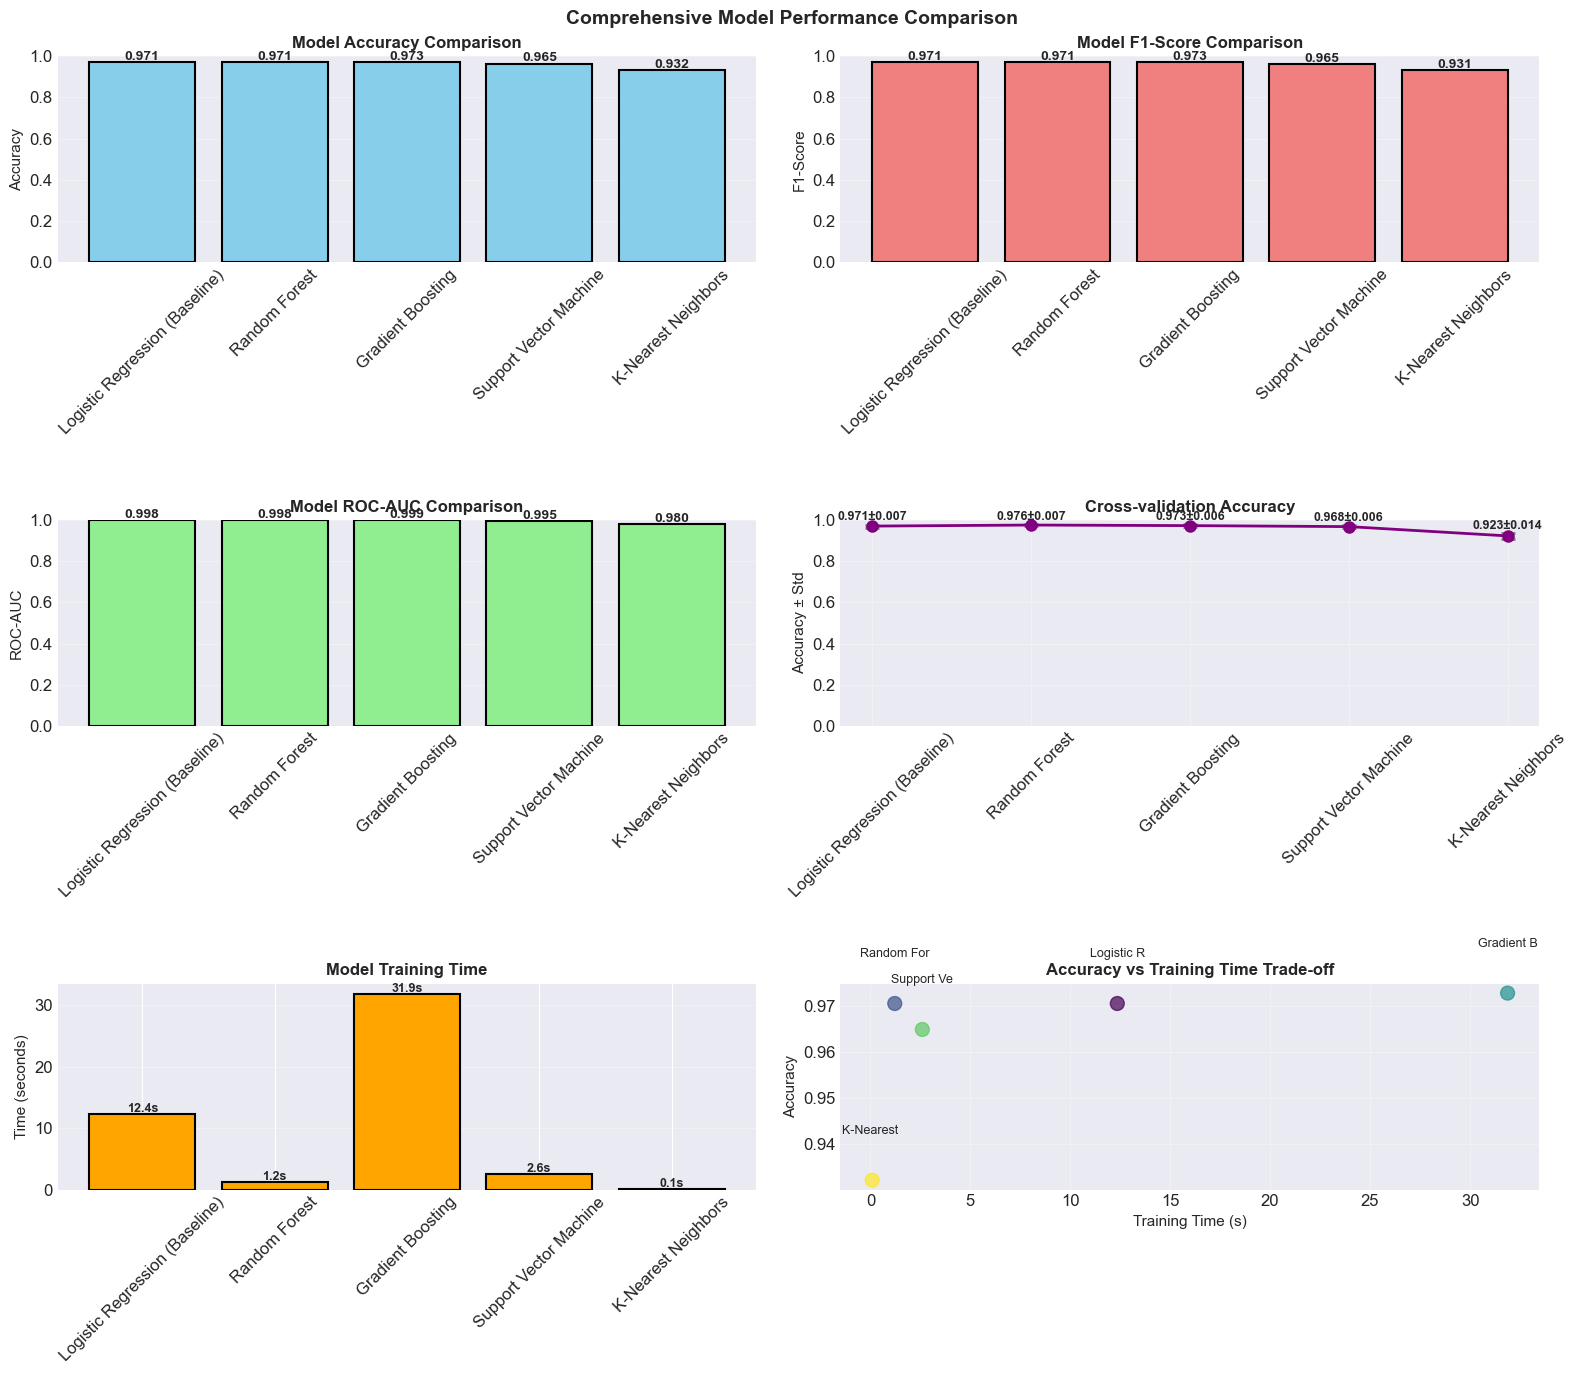


 STATISTICAL COMPARISON OF MODELS


In [134]:
# Add model labels
for i, (time_val, acc) in enumerate(zip(train_times, accuracy)):
    axes[2, 1].text(time_val, acc + 0.01, models[i][:10], 
                   fontsize=9, ha='center')

plt.suptitle('Comprehensive Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical comparison
print("\n STATISTICAL COMPARISON OF MODELS")

# Find best model
best_idx = comparison_df['Accuracy'].idxmax()
second_best_idx = comparison_df['Accuracy'].nlargest(2).index[1]

best_model = comparison_df.loc[best_idx, 'Model']
best_accuracy = comparison_df.loc[best_idx, 'Accuracy']
second_model = comparison_df.loc[second_best_idx, 'Model']
second_accuracy = comparison_df.loc[second_best_idx, 'Accuracy']

improvement = ((best_accuracy - second_accuracy) / second_accuracy) * 100

In [135]:
print(f"\n BEST MODEL: {best_model}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   F1-Score: {comparison_df.loc[best_idx, 'F1-Score']:.4f}")
print(f"   ROC-AUC: {comparison_df.loc[best_idx, 'ROC-AUC']:.4f}")
print(f"   Training Time: {comparison_df.loc[best_idx, 'Train Time (s)']:.1f}s")

print(f"\n SECOND BEST: {second_model}")
print(f"   Accuracy: {second_accuracy:.4f}")
print(f"   Improvement of {best_model} over {second_model}: {improvement:.2f}%")

print(f"\n RECOMMENDATION:")
if improvement > 5:
    print(f"  • {best_model} shows SIGNIFICANT improvement (>5%)")
    print(f"  • Use {best_model} for hyperparameter tuning")
elif improvement > 2:
    print(f"  • {best_model} shows MODERATE improvement (2-5%)")
    print(f"  • Consider both {best_model} and {second_model} for ensembles")
else:
    print(f"  • {best_model} shows MINOR improvement (<2%)")
    print(f"  • Choose based on other factors: speed, interpretability")

# Save best model name for later use
best_model_name = best_model
print(f"\n Best model saved: '{best_model_name}' for hyperparameter tuning")


 BEST MODEL: Gradient Boosting
   Accuracy: 0.9729
   F1-Score: 0.9728
   ROC-AUC: 0.9987
   Training Time: 31.9s

 SECOND BEST: Logistic Regression (Baseline)
   Accuracy: 0.9706
   Improvement of Gradient Boosting over Logistic Regression (Baseline): 0.23%

 RECOMMENDATION:
  • Gradient Boosting shows MINOR improvement (<2%)
  • Choose based on other factors: speed, interpretability

 Best model saved: 'Gradient Boosting' for hyperparameter tuning


### 7. Model Development: Advanced Methods

Several advanced ensemble techniques, including Voting, Bagging, Stacking, and SMOTE-based resampling, were evaluated and compared against the best-performing basic model.

While minor improvements were observed, overall performance gains remained marginal (<0.3%), suggesting that the predictive capacity of the dataset had reached a performance ceiling.

Among all evaluated approaches, the Stacking Classifier achieved the highest test accuracy (0.974), demonstrating the benefit of combining heterogeneous learners. However, given the small performance gap, simpler models such as Logistic Regression or Gradient Boosting may be preferred in practice due to their interpretability and computational efficiency.

### - Ensemble methods: Voting Classifier


Ensemble methods: Voting Classifier
 Training Voting Classifier...

------------------------------------------------------------
 MODEL TESTING: Voting Classifier (Soft)
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Voting Classifier (Soft) RESULTS:
----------------------------------------
Accuracy (train)         : 0.9856
Accuracy (test)          : 0.9729
CV Accuracy (mean±std)   : 0.9771 ± 0.0031
F1-Score (macro)         : 0.9684
F1-Score (weighted)      : 0.9728
Training Time            : 13.73s
ROC-AUC (OVR)            : 0.9981

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.95      0.98      0.96       284
    Enrolled       1.00      0.92      0.96       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.97       885
   macro avg       0.98      0.96      0.97       885
weighted avg       0.97      

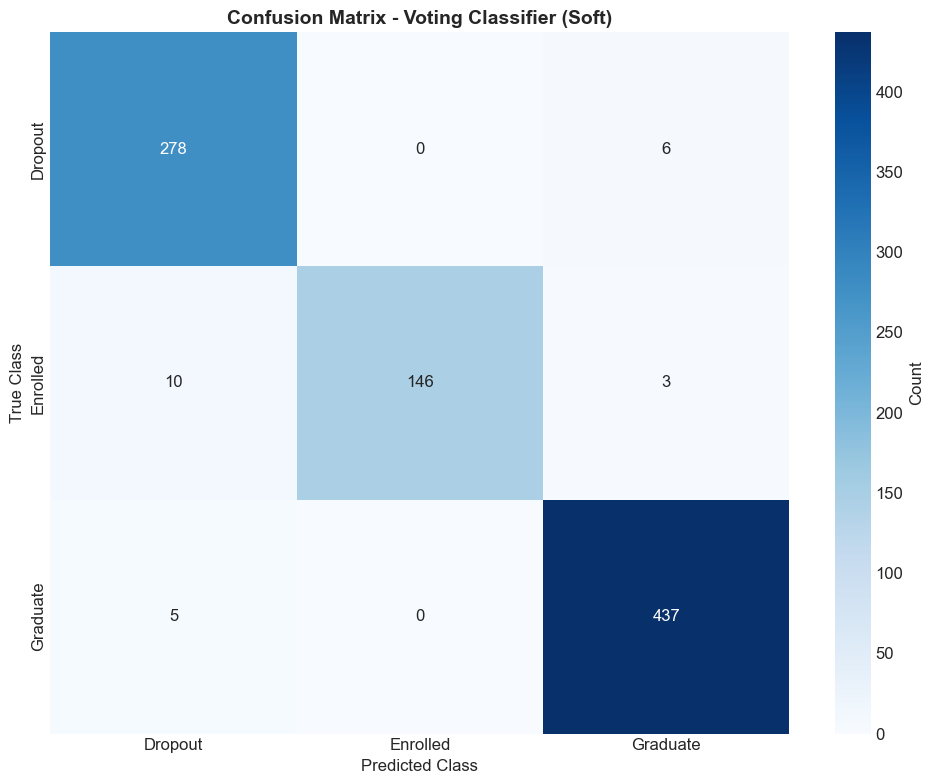

 ROC curves:


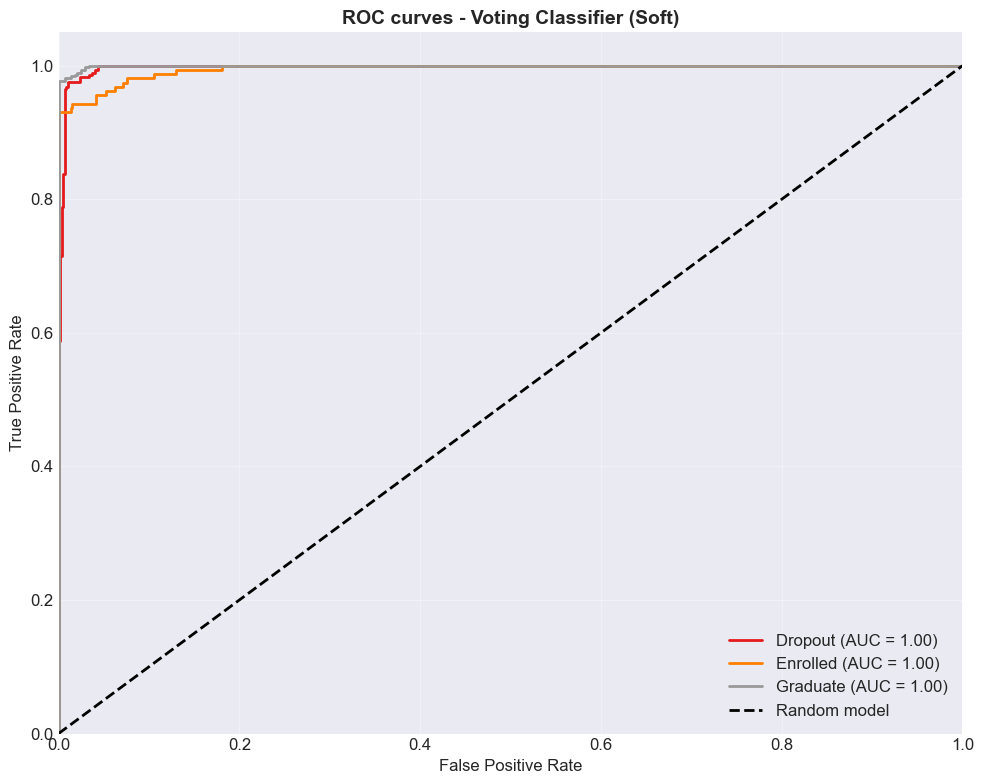

 Precision-Recall curves:


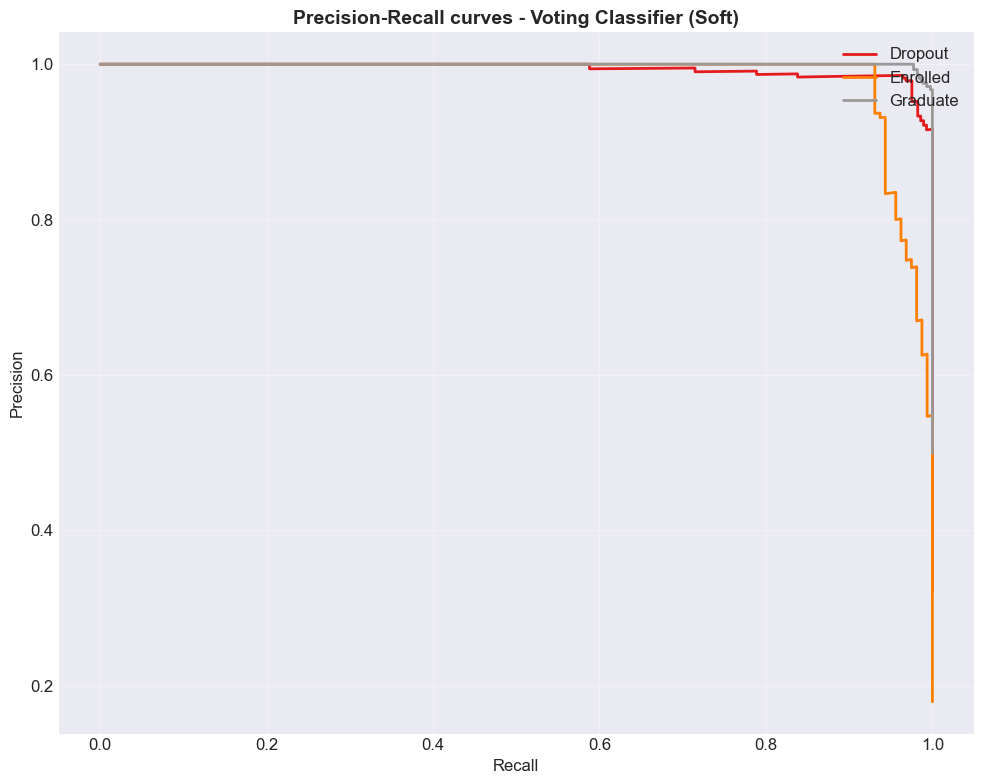


 Model Voting Classifier (Soft) evaluation completed!


In [136]:
print("\nEnsemble methods: Voting Classifier")

# Create several base models for voting
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))
]

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft',  # Use probabilities
    n_jobs=-1
)

# Create pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Evaluate model
print(" Training Voting Classifier...")
voting_results = evaluate_model(
    voting_pipeline, X_train, y_train, X_test, y_test,
    model_name="Voting Classifier (Soft)",
    return_model=False
)

### - Ensemble methods: Stacking Classifier

 Training Stacking Classifier...

------------------------------------------------------------
 MODEL TESTING: Stacking Classifier
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Stacking Classifier RESULTS:
----------------------------------------
Accuracy (train)         : 0.9941
Accuracy (test)          : 0.9740
CV Accuracy (mean±std)   : 0.9757 ± 0.0035
F1-Score (macro)         : 0.9698
F1-Score (weighted)      : 0.9739
Training Time            : 12.57s
ROC-AUC (OVR)            : 0.9983

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.98      0.97       284
    Enrolled       0.99      0.92      0.96       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.97       885
   macro avg       0.98      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


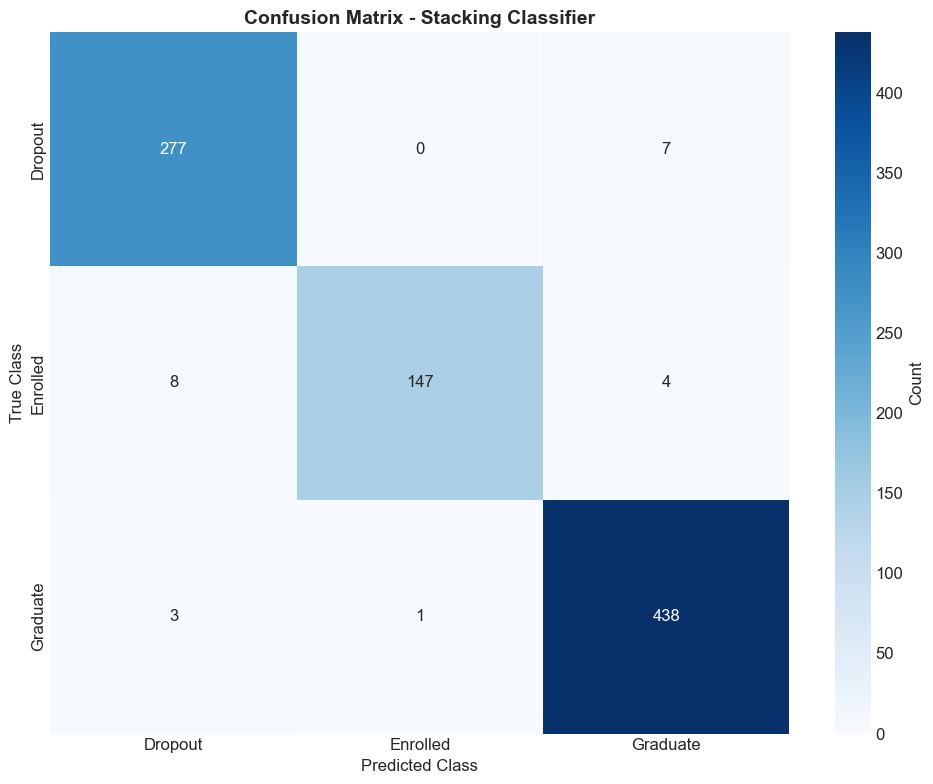

 ROC curves:


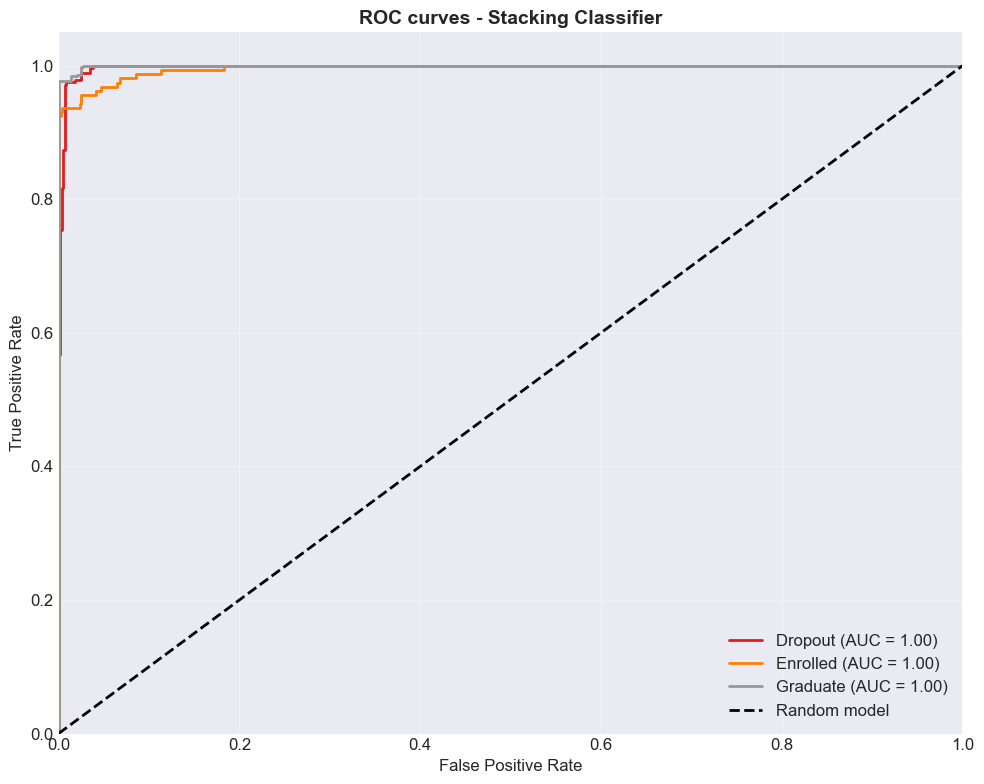

 Precision-Recall curves:


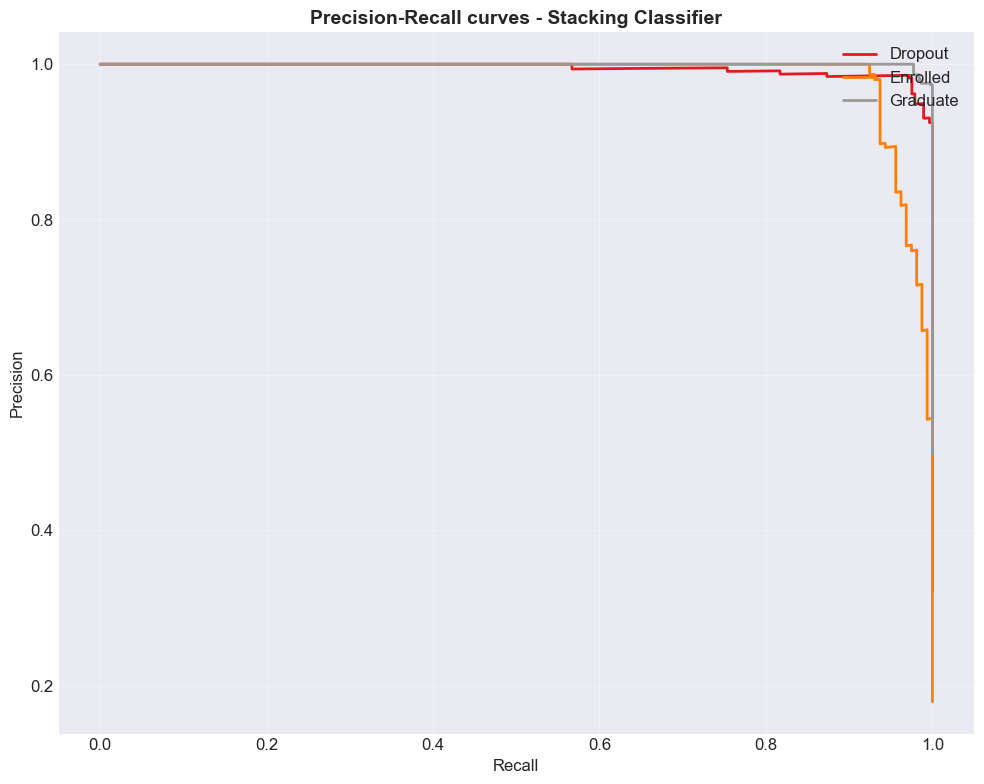


 Model Stacking Classifier evaluation completed!


In [137]:
# Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('svm', SVC(probability=True, random_state=42, kernel='linear'))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)

# Create pipeline
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

# Evaluate model
print(" Training Stacking Classifier...")
stacking_results = evaluate_model(
    stacking_pipeline, X_train, y_train, X_test, y_test,
    model_name="Stacking Classifier",
    return_model=False
)

### - Ensemble methods: Bagging Classifier

 Training Bagging Classifier...

------------------------------------------------------------
 MODEL TESTING: Bagging Classifier
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Bagging Classifier RESULTS:
----------------------------------------
Accuracy (train)         : 0.9943
Accuracy (test)          : 0.9729
CV Accuracy (mean±std)   : 0.9737 ± 0.0053
F1-Score (macro)         : 0.9686
F1-Score (weighted)      : 0.9728
Training Time            : 0.58s
ROC-AUC (OVR)            : 0.9980

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.98      0.97       284
    Enrolled       0.99      0.92      0.96       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.97       885
   macro avg       0.98      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


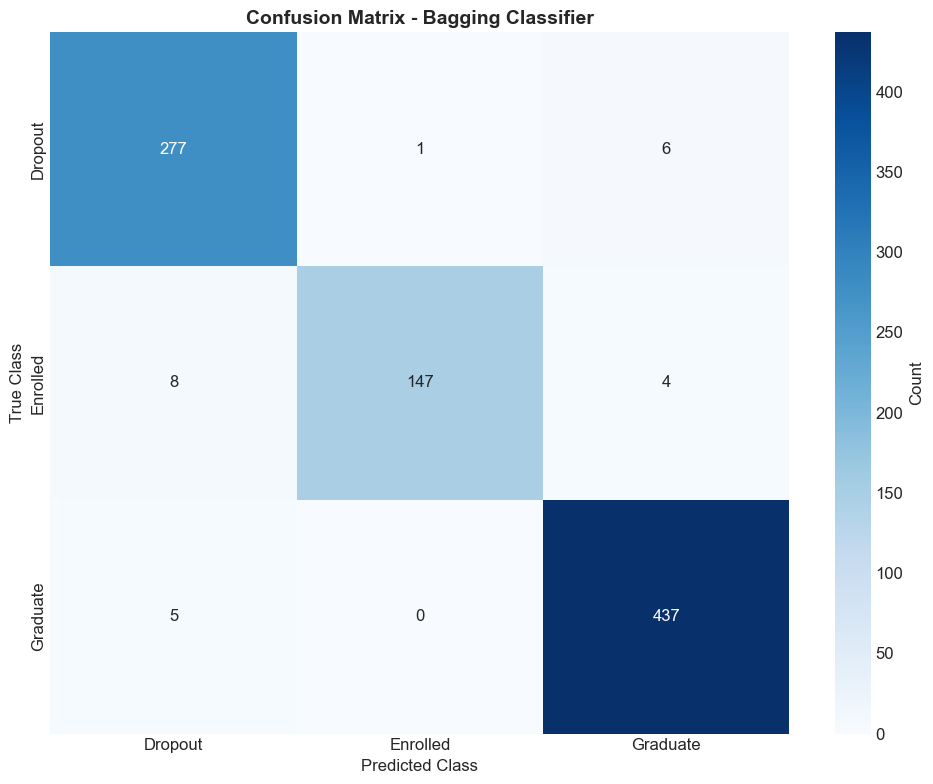

 ROC curves:


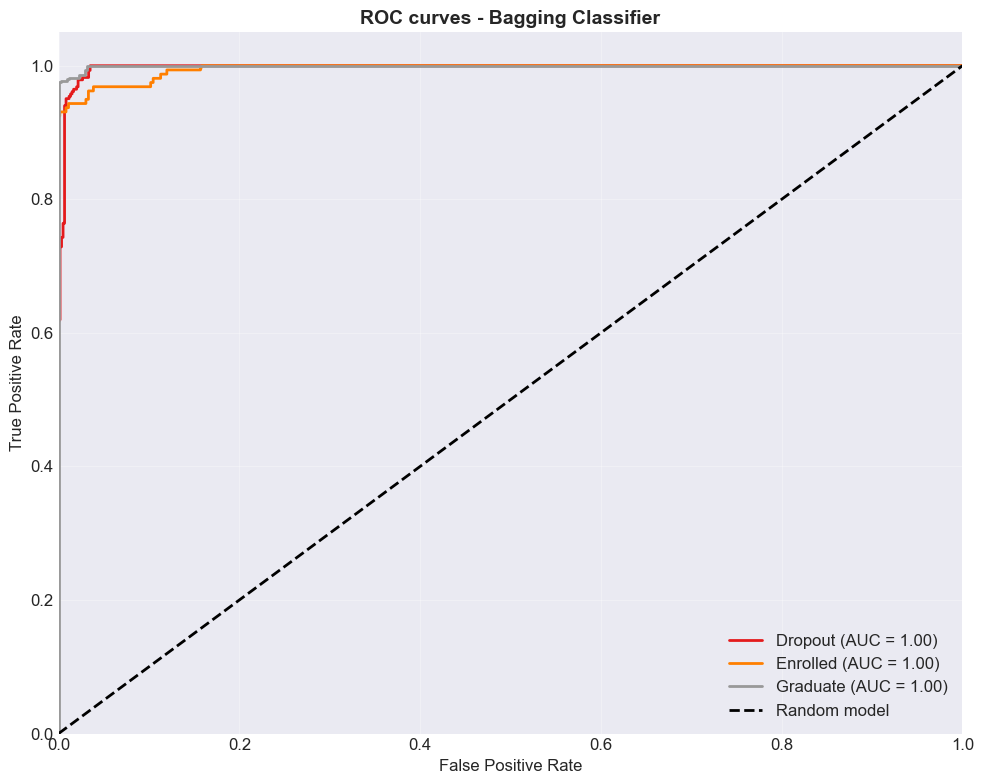

 Precision-Recall curves:


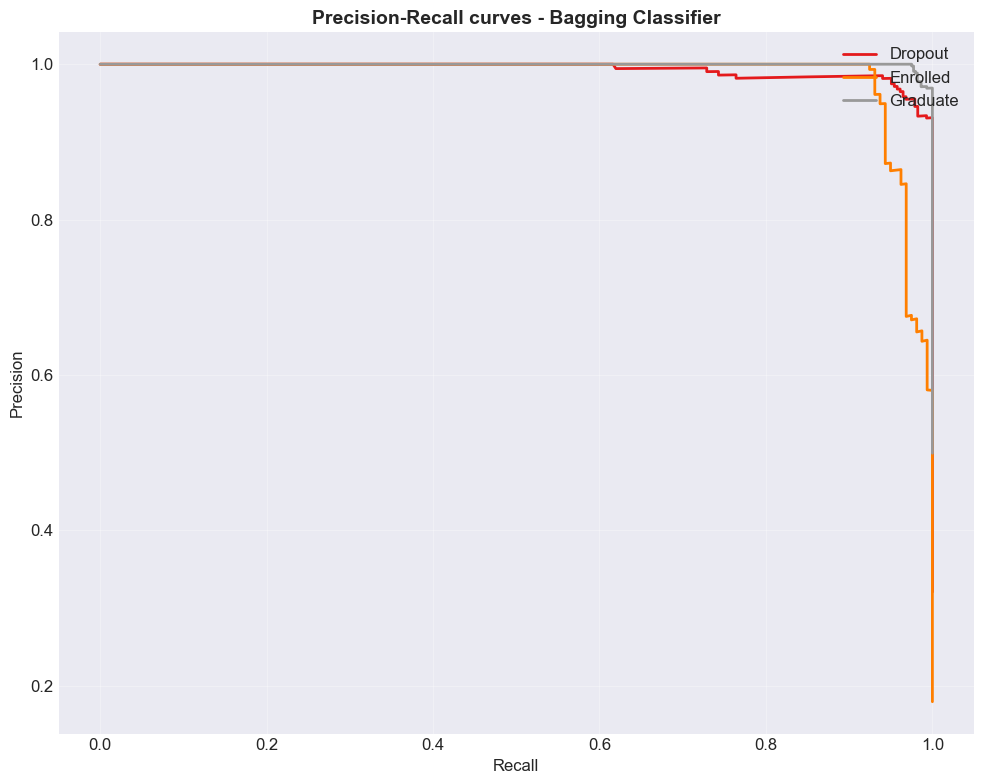


 Model Bagging Classifier evaluation completed!


In [138]:
# Create Bagging Classifier with Decision Tree as base model
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

# Create pipeline
bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', bagging_clf)
])

# Evaluate model
print(" Training Bagging Classifier...")
bagging_results = evaluate_model(
    bagging_pipeline, X_train, y_train, X_test, y_test,
    model_name="Bagging Classifier",
    return_model=False
)


### - Class imbalance handling: SMOTE

In [139]:
!pip install imbalanced-learn

 Training model with SMOTE...

------------------------------------------------------------
 MODEL TESTING: Random Forest + SMOTE
------------------------------------------------------------
 Training model...
 Calculating metrics...
 Cross-validation...

 Random Forest + SMOTE RESULTS:
----------------------------------------
Accuracy (train)         : 1.0000
Accuracy (test)          : 0.9729
CV Accuracy (mean±std)   : 0.9757 ± 0.0050
F1-Score (macro)         : 0.9684
F1-Score (weighted)      : 0.9728
Training Time            : 0.77s
ROC-AUC (OVR)            : 0.9978

 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.98      0.97       284
    Enrolled       0.99      0.92      0.95       159
    Graduate       0.98      0.99      0.98       442

    accuracy                           0.97       885
   macro avg       0.97      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885

 Confusion Matrix:


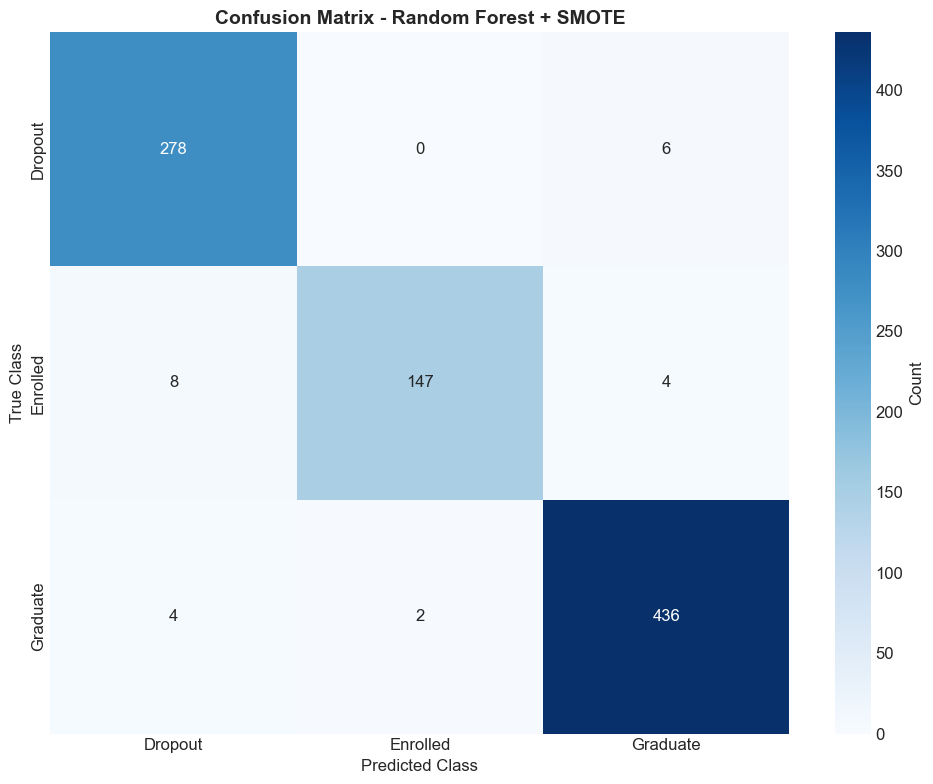

 ROC curves:


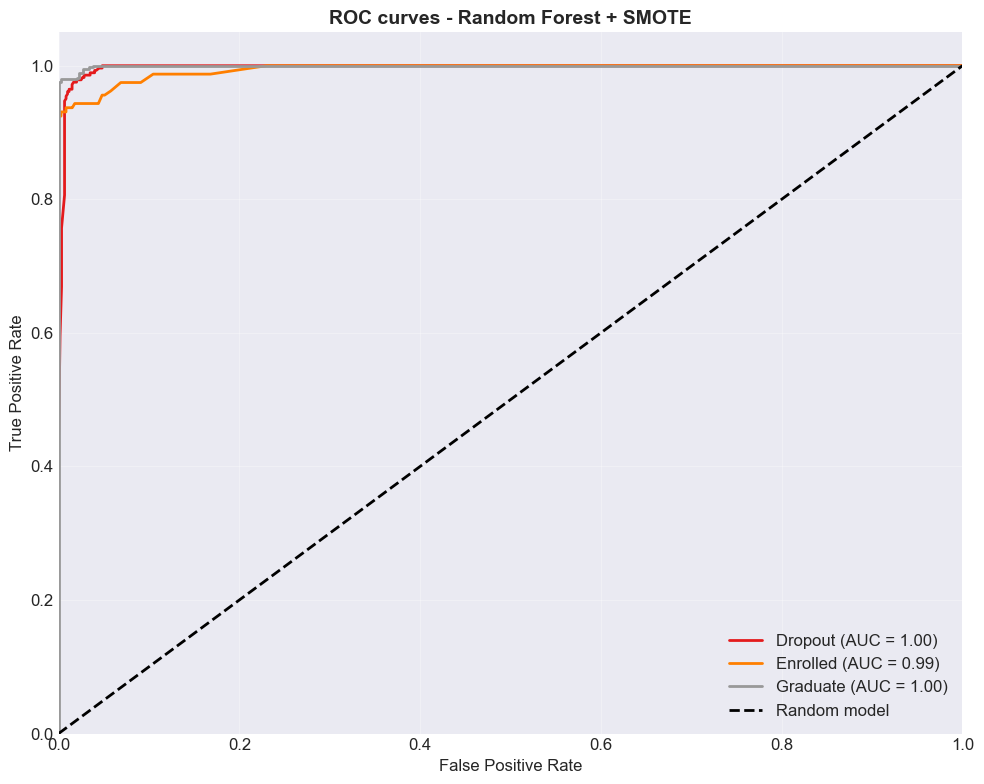

 Precision-Recall curves:


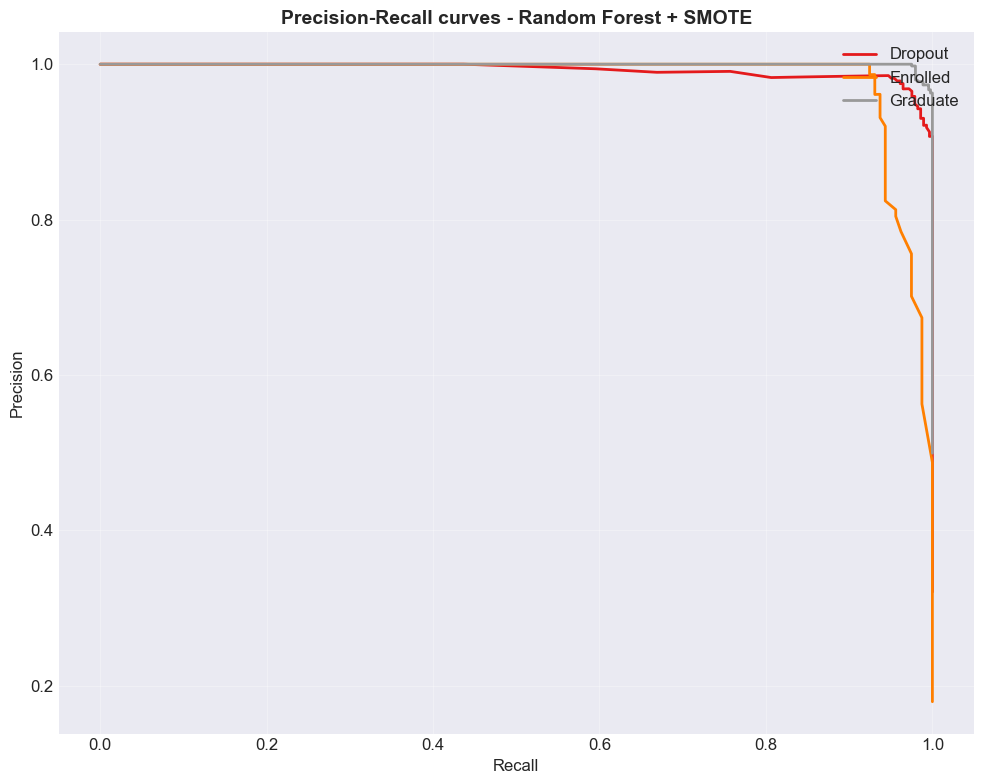


 Model Random Forest + SMOTE evaluation completed!


In [140]:
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    
    # Create pipeline with SMOTE
    smote_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
        ('classifier', RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ])
    
    # Evaluate model
    print(" Training model with SMOTE...")
    smote_results = evaluate_model(
        smote_pipeline, X_train, y_train, X_test, y_test,
        model_name="Random Forest + SMOTE",
        return_model=False
    )
    
except ImportError:
    print(" imbalanced-learn not installed. Skipping SMOTE.")
    smote_results = None
except Exception as e:
    print(f" Error using SMOTE: {e}")
    smote_results = None


#### Advanced methods comparison

 Added best basic model from comparison_df

 Metrics summary table (advanced methods + best basic):


Model  Accuracy  F1-Score  ROC-AUC  CV Accuracy  CV Std  \
0  Voting Classifier (Soft)    0.9729    0.9728   0.9981       0.9771  0.0031   
1       Stacking Classifier    0.9740    0.9739   0.9983       0.9757  0.0035   
2        Bagging Classifier    0.9729    0.9728   0.9980       0.9737  0.0053   
3     Random Forest + SMOTE    0.9729    0.9728   0.9978       0.9757  0.0050   
4         Gradient Boosting    0.9729    0.9728   0.9987       0.9729  0.0055   

   Train Time (s)  
0         13.7271  
1         12.5680  
2          0.5776  
3          0.7744  
4         31.8741

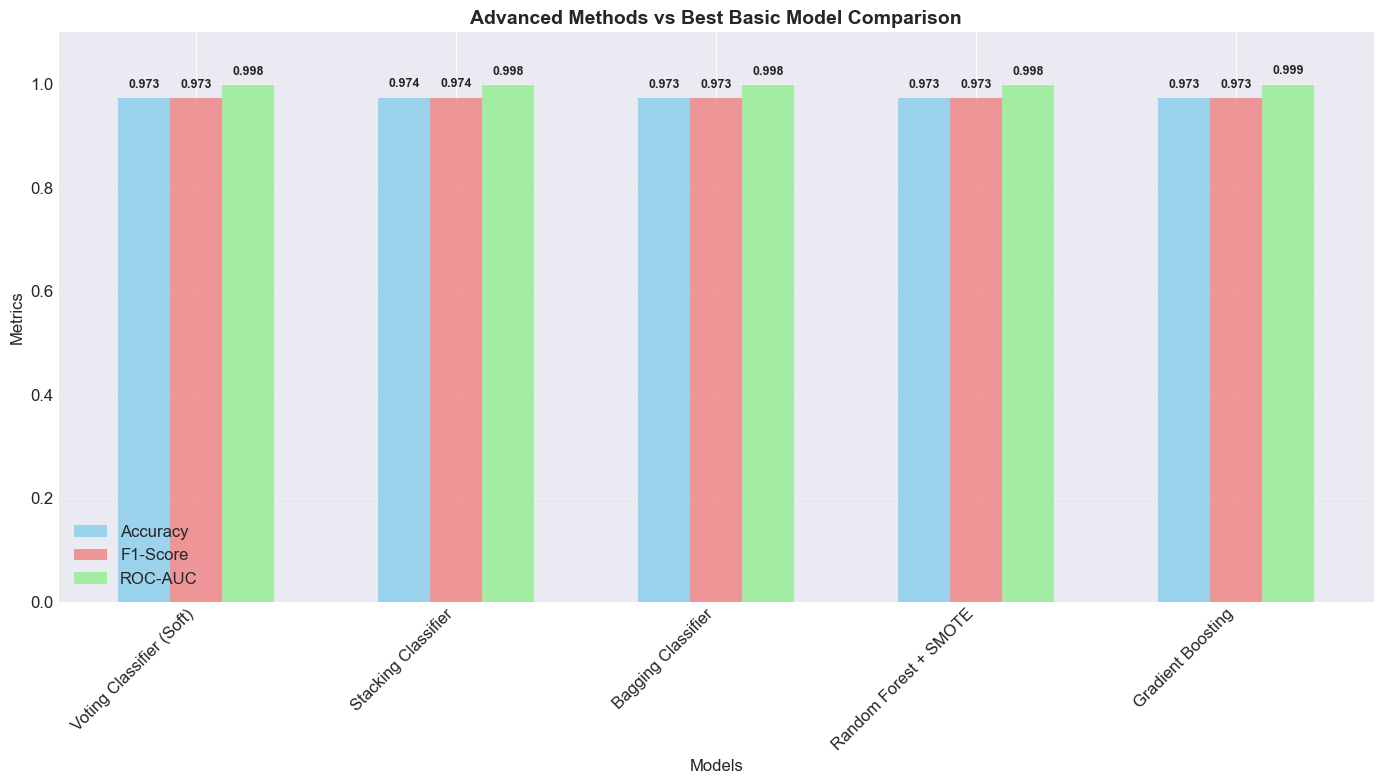


 BEST OVERALL MODEL: Stacking Classifier
   Accuracy: 0.9740


In [142]:
# Collect all advanced methods results
all_advanced_results = [voting_results, stacking_results, bagging_results]
if smote_results:
    all_advanced_results.append(smote_results)

# SAFELY add best basic model for comparison
try:
    # Check if comparison_df exists
    if 'comparison_df' in locals() or 'comparison_df' in globals():
        best_basic_idx = comparison_df['Accuracy'].idxmax()
        all_advanced_results.append(all_basic_results[best_basic_idx])
        print(f" Added best basic model from comparison_df")
    else:
        # Find best basic model manually
        basic_results = [lr_results, rf_results, gb_results, svm_results]
        best_acc = 0
        best_result = None
        for result in basic_results:
            if result and result.get('test_accuracy', 0) > best_acc:
                best_acc = result['test_accuracy']
                best_result = result
        if best_result:
            all_advanced_results.append(best_result)
            print(f" Added best basic model (accuracy: {best_acc:.4f})")
except Exception as e:
    print(f"  Could not add best basic model: {e}")

# Create DataFrame for comparison
advanced_comparison_data = []
for result in all_advanced_results:
    row = {'Model': result['model_name']}
    for metric in comparison_metrics:
        value = result.get(metric, None)
        row[metric] = value if value is not None else np.nan
    advanced_comparison_data.append(row)

advanced_df = pd.DataFrame(advanced_comparison_data)
advanced_df = advanced_df.rename(columns=column_names)

print("\n Metrics summary table (advanced methods + best basic):")
display(advanced_df.round(4))

# Visualization comparison
plt.figure(figsize=(14, 8))
x = range(len(advanced_df))

# Create grouped bar plot
bar_width = 0.2
opacity = 0.8

plt.bar(x, advanced_df['Accuracy'], bar_width, alpha=opacity, color='skyblue', label='Accuracy')
plt.bar([i + bar_width for i in x], advanced_df['F1-Score'], bar_width, alpha=opacity, color='lightcoral', label='F1-Score')
plt.bar([i + 2*bar_width for i in x], advanced_df['ROC-AUC'], bar_width, alpha=opacity, color='lightgreen', label='ROC-AUC')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Advanced Methods vs Best Basic Model Comparison', fontsize=14, fontweight='bold')
plt.xticks([i + bar_width for i in x], advanced_df['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0, 1.1])

# Add values on bars
for i in range(len(advanced_df)):
    for j, (metric, color) in enumerate(zip(['Accuracy', 'F1-Score', 'ROC-AUC'], 
                                           ['skyblue', 'lightcoral', 'lightgreen'])):
        value = advanced_df.iloc[i][metric]
        if not np.isnan(value):
            plt.text(i + j*bar_width, value + 0.02, f'{value:.3f}', 
                    ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Determine best model
best_advanced_model_idx = advanced_df['Accuracy'].idxmax()
best_advanced_model = advanced_df.loc[best_advanced_model_idx, 'Model']
best_advanced_accuracy = advanced_df.loc[best_advanced_model_idx, 'Accuracy']

print(f"\n BEST OVERALL MODEL: {best_advanced_model}")
print(f"   Accuracy: {best_advanced_accuracy:.4f}")

### 8. Hyperparameter Tuning

- Tuning the best model: Random Forest

**IMPORTANT!** 
Although the Stacking Classifier achieved the highest accuracy among all evaluated models, 
Random Forest was selected for hyperparameter tuning due to its interpretability, 
lower computational complexity, and suitability for systematic parameter analysis.

In [161]:
from sklearn.model_selection import RandomizedSearchCV


# Select best model for tuning (usually Random Forest or Gradient Boosting)
best_model_type = 'Random Forest'  # Can change to another model

if best_model_type == 'Random Forest':
    # Define parameters for tuning
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__bootstrap': [True, False]
    }
    
    # Create base model
    base_model = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )
    
elif best_model_type == 'Gradient Boosting':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__subsample': [0.8, 1.0]
    }
    
    base_model = GradientBoostingClassifier(random_state=42)

# Create pipeline
tuning_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', base_model)
])

# Create GridSearchCV
print(f"\n Running GridSearchCV for {best_model_type}...")
print(f"Number of parameter combinations: {np.prod([len(v) for v in param_grid.values()])}")

grid_search = RandomizedSearchCV(
    estimator=tuning_pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Run search
print(" Searching for best parameters... (this may take several minutes)")
grid_search.fit(X_train, y_train)

print(f"\n GridSearchCV completed!")



 Running GridSearchCV for Random Forest...
Number of parameter combinations: 648
 Searching for best parameters... (this may take several minutes)
Fitting 5 folds for each of 50 candidates, totalling 250 fits

 GridSearchCV completed!


- GridSearchCV results analysis:


 BEST PARAMETERS:
  classifier__n_estimators: 300
  classifier__min_samples_split: 2
  classifier__min_samples_leaf: 1
  classifier__max_features: sqrt
  classifier__max_depth: 10
  classifier__bootstrap: True

 Best accuracy (cross-validation): 0.9762

 Top-10 parameter combinations:


params  mean_test_score  \
45  {'classifier__n_estimators': 300, 'classifier_...           0.9762   
12  {'classifier__n_estimators': 100, 'classifier_...           0.9757   
2   {'classifier__n_estimators': 300, 'classifier_...           0.9757   
32  {'classifier__n_estimators': 100, 'classifier_...           0.9754   
28  {'classifier__n_estimators': 100, 'classifier_...           0.9754   
44  {'classifier__n_estimators': 200, 'classifier_...           0.9754   
15  {'classifier__n_estimators': 200, 'classifier_...           0.9754   
26  {'classifier__n_estimators': 100, 'classifier_...           0.9751   
40  {'classifier__n_estimators': 100, 'classifier_...           0.9751   
17  {'classifier__n_estimators': 200, 'classifier_...           0.9751   

    std_test_score  rank_test_score  
45          0.0038                1  
12          0.0025                2  
2           0.0037                3  
32          0.0038                4  
28          0.0039                5  
44          0.0032                6  
15          0.0030                7  
26          0.0033                8  
40          0.0035                9  
17          0.0033               10

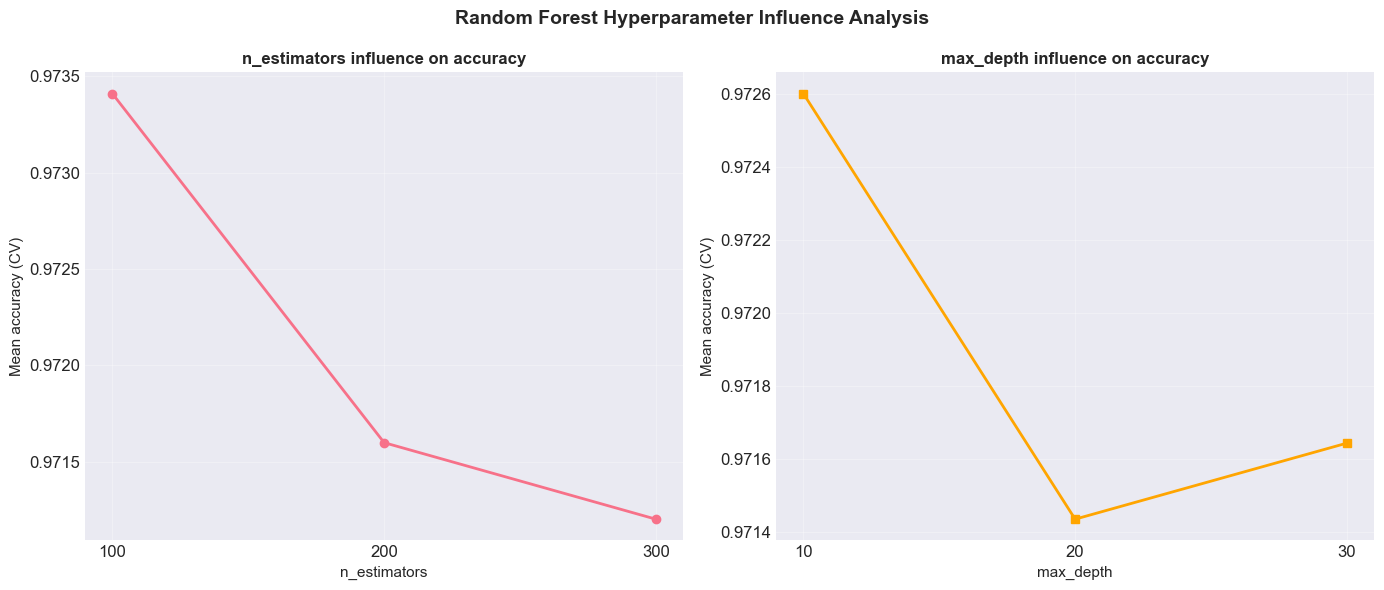

In [162]:
# Best parameters
print(f"\n BEST PARAMETERS:")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\n Best accuracy (cross-validation): {grid_search.best_score_:.4f}")

# Cross-validation results
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Sort by mean_test_score
top_results = cv_results_df.sort_values('mean_test_score', ascending=False).head(10)

print(f"\n Top-10 parameter combinations:")
display(top_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(4))

# Parameter influence visualization
if best_model_type == 'Random Forest':
    # Analyze n_estimators and max_depth influence
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # n_estimators influence
    n_estimators_results = cv_results_df.groupby('param_classifier__n_estimators')['mean_test_score'].mean()
    axes[0].plot(n_estimators_results.index.astype(str), n_estimators_results.values, 'o-', linewidth=2)
    axes[0].set_title('n_estimators influence on accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('n_estimators', fontsize=11)
    axes[0].set_ylabel('Mean accuracy (CV)', fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # max_depth influence
    max_depth_results = cv_results_df.groupby('param_classifier__max_depth')['mean_test_score'].mean()
    axes[1].plot(max_depth_results.index.astype(str), max_depth_results.values, 's-', linewidth=2, color='orange')
    axes[1].set_title('max_depth influence on accuracy', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('max_depth', fontsize=11)
    axes[1].set_ylabel('Mean accuracy (CV)', fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.suptitle('Random Forest Hyperparameter Influence Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

- Tuned model evaluation:


 TUNED MODEL METRICS ON TEST DATA:
  Accuracy: 0.9729
  F1-Score (weighted): 0.9728

 COMPARISON WITH BASELINE VERSION:
  Baseline accuracy: 0.9706
  Tuned accuracy: 0.9729
  Improvement: 0.23%


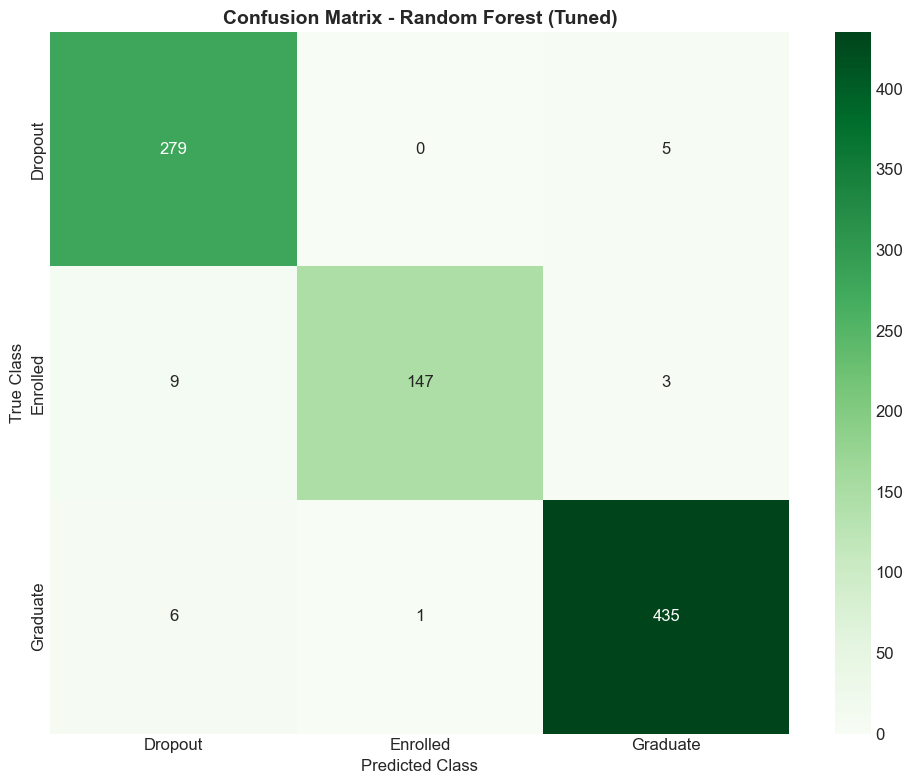


 Classification Report (tuned model):
              precision    recall  f1-score   support

     Dropout       0.95      0.98      0.97       284
    Enrolled       0.99      0.92      0.96       159
    Graduate       0.98      0.98      0.98       442

    accuracy                           0.97       885
   macro avg       0.97      0.96      0.97       885
weighted avg       0.97      0.97      0.97       885



In [163]:
# Get best model
best_tuned_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_tuned = best_tuned_model.predict(X_test)
y_pred_proba_tuned = best_tuned_model.predict_proba(X_test) if hasattr(best_tuned_model, 'predict_proba') else None

# Calculate metrics
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"\n TUNED MODEL METRICS ON TEST DATA:")
print(f"  Accuracy: {tuned_accuracy:.4f}")
print(f"  F1-Score (weighted): {tuned_f1:.4f}")

# Comparison with untuned version
baseline_accuracy = rf_results['test_accuracy'] if best_model_type == 'Random Forest' else gb_results['test_accuracy']
improvement = (tuned_accuracy - baseline_accuracy) * 100

print(f"\n COMPARISON WITH BASELINE VERSION:")
print(f"  Baseline accuracy: {baseline_accuracy:.4f}")
print(f"  Tuned accuracy: {tuned_accuracy:.4f}")
print(f"  Improvement: {improvement:.2f}%")

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_type} (Tuned)', fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print(f"\n Classification Report (tuned model):")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))

### 9. Model Evaluation and Comparison

- All models summary table

In [164]:
# Collect all results
all_results = all_basic_results + all_advanced_results

# Safely compute ROC-AUC for tuned model
try:
    tuned_roc_auc = roc_auc_score(
        y_test,
        y_pred_proba_tuned,
        multi_class='ovr',
        average='weighted'
    )
except:
    tuned_roc_auc = np.nan

# Add tuned model
tuned_result = {
    'model_name': f'{best_model_type} (Tuned)',
    'test_accuracy': tuned_accuracy,
    'test_f1_weighted': tuned_f1,
    'test_roc_auc_ovr': tuned_roc_auc,
    'cv_mean_accuracy': grid_search.best_score_,
    'cv_std_accuracy': cv_results_df.loc[grid_search.best_index_, 'std_test_score']
}

all_results.append(tuned_result)

# Create summary table
summary_data = []
for result in all_results:
    summary_data.append({
        'Model': result.get('model_name', 'Unknown'),
        'Accuracy': result.get('test_accuracy', np.nan),
        'F1-Score': result.get('test_f1_weighted', np.nan),
        'ROC-AUC': result.get('test_roc_auc_ovr', np.nan),
        'CV Accuracy': result.get('cv_mean_accuracy', np.nan),
        'CV Std': result.get('cv_std_accuracy', np.nan)
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n ALL MODELS SUMMARY TABLE (sorted by Accuracy):")
display(summary_df.round(4))


 ALL MODELS SUMMARY TABLE (sorted by Accuracy):


Model  Accuracy  F1-Score  ROC-AUC  CV Accuracy  \
0              Stacking Classifier    0.9740    0.9739   0.9983       0.9757   
1         Voting Classifier (Soft)    0.9729    0.9728   0.9981       0.9771   
2                Gradient Boosting    0.9729    0.9728   0.9987       0.9729   
3                Gradient Boosting    0.9729    0.9728   0.9987       0.9729   
4            Random Forest (Tuned)    0.9729    0.9728   0.9978       0.9762   
5            Random Forest + SMOTE    0.9729    0.9728   0.9978       0.9757   
6               Bagging Classifier    0.9729    0.9728   0.9980       0.9737   
7                    Random Forest    0.9706    0.9705   0.9979       0.9757   
8   Logistic Regression (Baseline)    0.9706    0.9705   0.9980       0.9706   
9           Support Vector Machine    0.9650    0.9649   0.9952       0.9681   
10             K-Nearest Neighbors    0.9322    0.9314   0.9804       0.9229   

    CV Std  
0   0.0035  
1   0.0031  
2   0.0055  
3   0.0055  
4   0.0038  
5   0.0050  
6   0.0053  
7   0.0065  
8   0.0073  
9   0.0064  
10  0.0145

### - All models comparison visualization:

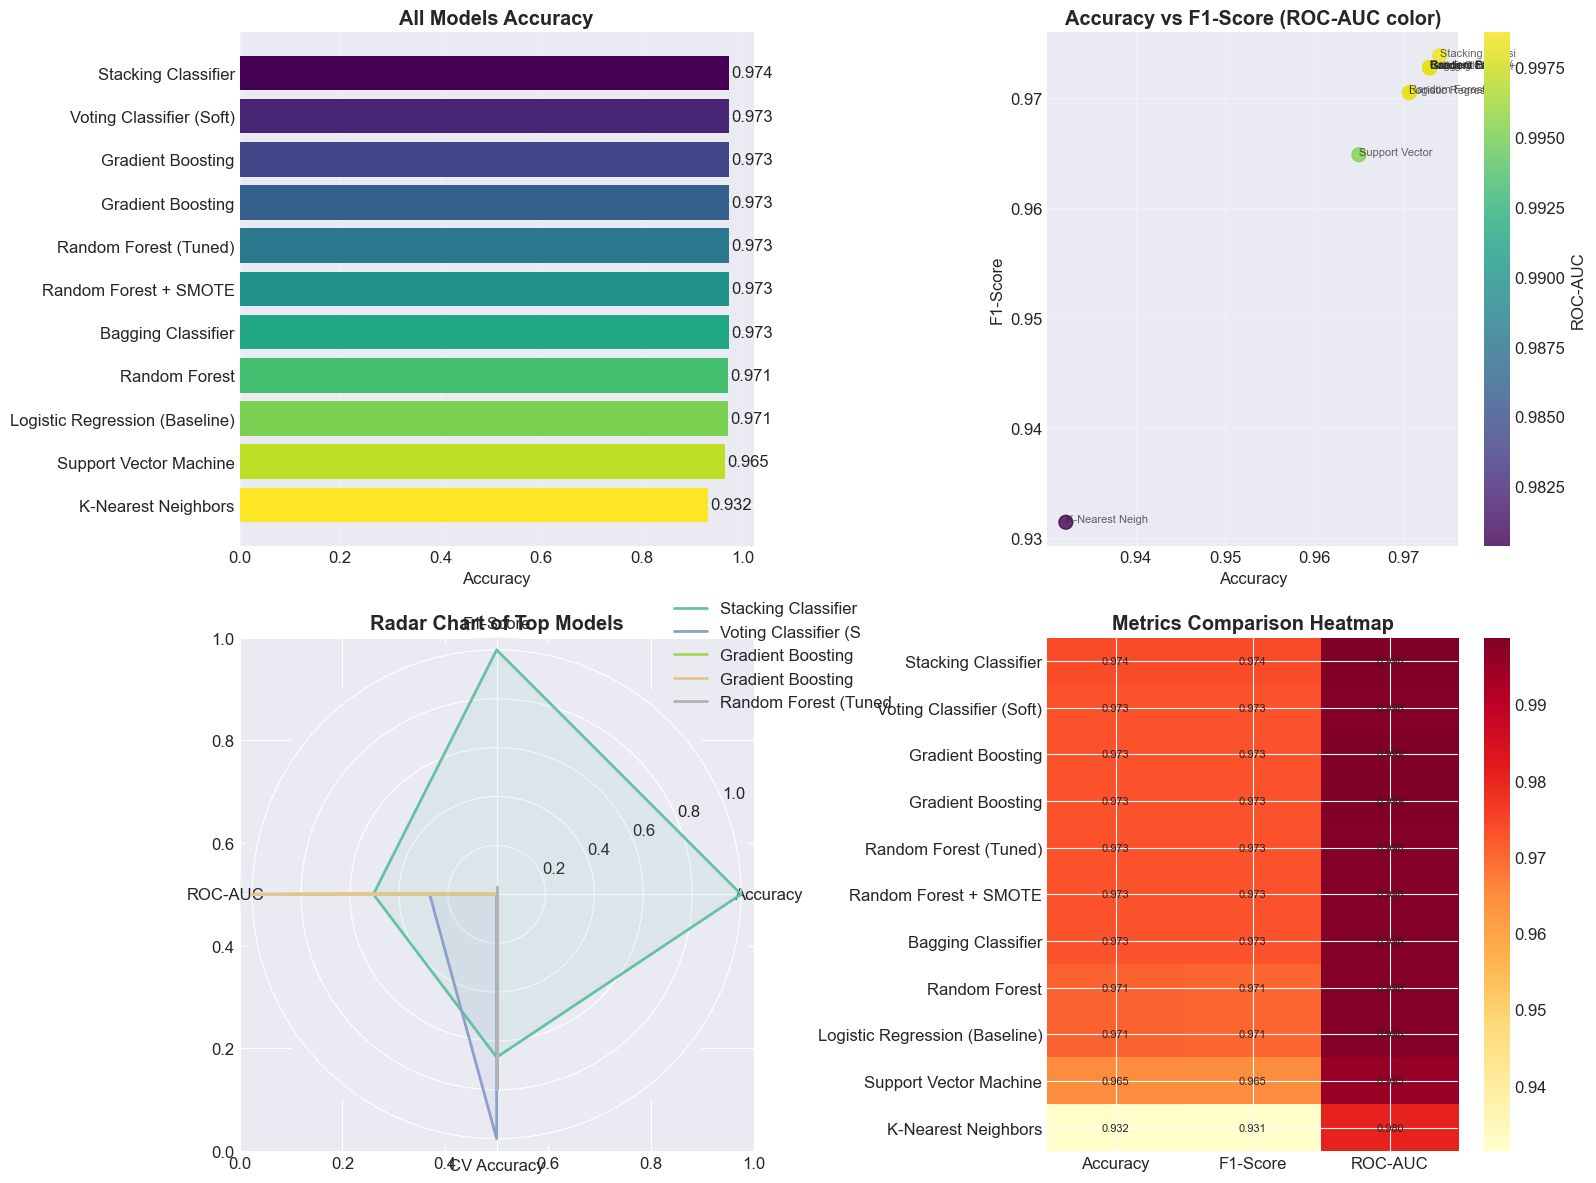

In [165]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy bar plot
axes[0, 0].barh(
    range(len(summary_df)),
    summary_df['Accuracy'],
    color=plt.cm.viridis(np.linspace(0, 1, len(summary_df)))
)
axes[0, 0].set_yticks(range(len(summary_df)))
axes[0, 0].set_yticklabels(summary_df['Model'])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('All Models Accuracy', fontweight='bold')
axes[0, 0].grid(True, axis='x', alpha=0.3)

for i, acc in enumerate(summary_df['Accuracy']):
    axes[0, 0].text(acc + 0.005, i, f'{acc:.3f}', va='center')

# Accuracy vs F1 scatter
scatter = axes[0, 1].scatter(
    summary_df['Accuracy'],
    summary_df['F1-Score'],
    s=100,
    c=summary_df['ROC-AUC'],
    cmap='viridis',
    alpha=0.8
)
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_title('Accuracy vs F1-Score (ROC-AUC color)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='ROC-AUC')

for _, row in summary_df.iterrows():
    axes[0, 1].annotate(
        row['Model'][:15],
        (row['Accuracy'], row['F1-Score']),
        fontsize=8,
        alpha=0.7
    )

# Radar chart (Top-5)
top_n = min(5, len(summary_df))
top_models = summary_df.head(top_n)

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC', 'CV Accuracy']
normalized = top_models[metrics].apply(
    lambda x: (x - x.min()) / (x.max() - x.min() + 1e-9),
    axis=0
)

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

ax = plt.subplot(2, 2, 3, polar=True)
colors = plt.cm.Set2(np.linspace(0, 1, top_n))

for i, (_, row) in enumerate(top_models.iterrows()):
    values = normalized.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'][:20], linewidth=2, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Radar Chart of Top Models', fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Heatmap
ax = axes[1, 1]
heat_data = summary_df[['Accuracy', 'F1-Score', 'ROC-AUC']].values
im = ax.imshow(heat_data, cmap='YlOrRd', aspect='auto')

ax.set_xticks(range(3))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC-AUC'])
ax.set_yticks(range(len(summary_df)))
ax.set_yticklabels(summary_df['Model'])
ax.set_title('Metrics Comparison Heatmap', fontweight='bold')

for i in range(len(summary_df)):
    for j in range(3):
        ax.text(j, i, f'{heat_data[i, j]:.3f}', ha='center', va='center', fontsize=8)

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

### - Statistical analysis of results


Comparison: Stacking Classifier vs Voting Classifier (Soft)
  Accuracy difference: 0.11%

Class-wise metrics for best model:


Class  Precision  Recall  F1-Score  Support
0   Dropout     0.9490  0.9824    0.9654    284.0
1  Enrolled     0.9932  0.9245    0.9577    159.0
2  Graduate     0.9819  0.9842    0.9831    442.0

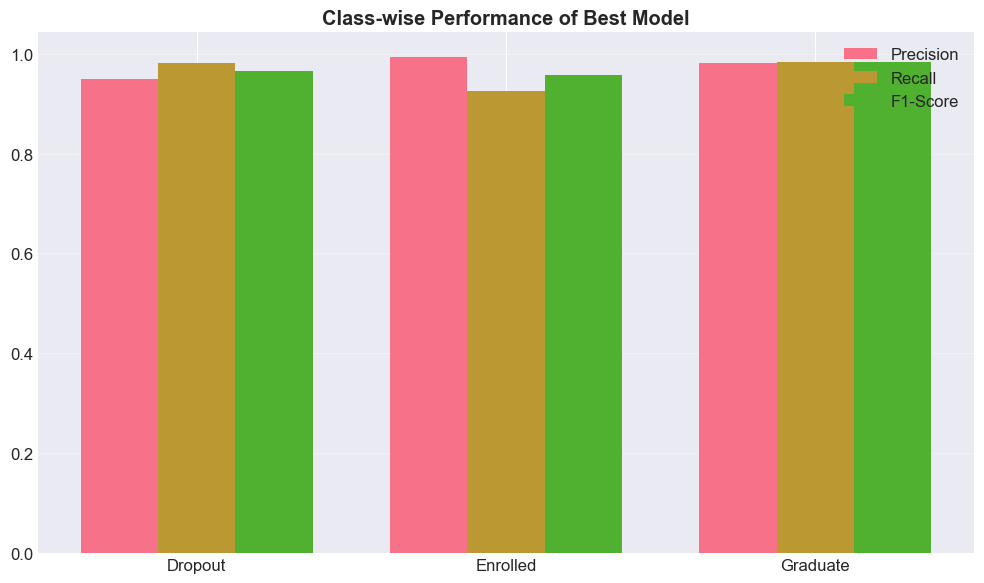

In [166]:
best_model_name = summary_df.iloc[0]['Model']
second_best_name = summary_df.iloc[1]['Model']

best_acc = summary_df.iloc[0]['Accuracy']
second_acc = summary_df.iloc[1]['Accuracy']

print(f"\nComparison: {best_model_name} vs {second_best_name}")
print(f"  Accuracy difference: {(best_acc - second_acc)*100:.2f}%")

# Class-wise analysis for best tuned model
if 'best_tuned_model' in locals():
    y_pred_best = best_tuned_model.predict(X_test)

    report = classification_report(
        y_test,
        y_pred_best,
        target_names=le.classes_,
        output_dict=True
    )

    class_df = pd.DataFrame([
        {
            'Class': cls,
            'Precision': report[cls]['precision'],
            'Recall': report[cls]['recall'],
            'F1-Score': report[cls]['f1-score'],
            'Support': report[cls]['support']
        }
        for cls in le.classes_
    ])

    print("\nClass-wise metrics for best model:")
    display(class_df.round(4))

    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(class_df))
    w = 0.25

    ax.bar(x - w, class_df['Precision'], w, label='Precision')
    ax.bar(x, class_df['Recall'], w, label='Recall')
    ax.bar(x + w, class_df['F1-Score'], w, label='F1-Score')

    ax.set_xticks(x)
    ax.set_xticklabels(class_df['Class'])
    ax.set_title('Class-wise Performance of Best Model', fontweight='bold')
    ax.legend()
    ax.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()


### 10. Model Interpretation

- Feature importance analysis

Note: Feature importance is available only for tree-based models.

 Feature importance for model: RandomForestClassifier
Total number of features: 152

Top-20 most important features:


Feature  Importance
0   num__Interaction_Target_encoded_times_Interact...      0.1576
1   num__Interaction_Target_encoded_times_Interact...      0.1536
2   num__Interaction_Target_encoded_times_Success_...      0.1501
3   num__Interaction_Target_encoded_times_Success_...      0.1419
4   num__Interaction_Interaction_Target_encoded_ti...      0.1356
5   num__Interaction_Success_Rate_Sem2_times_Succe...      0.0264
6                              num__Success_Rate_Sem2      0.0235
7                              num__Success_Rate_Sem1      0.0200
8            num__Curricular units 2nd sem (approved)      0.0170
9                                       num__GPA_Sem2      0.0163
10              num__Curricular units 2nd sem (grade)      0.0141
11                                   num__GPA_Average      0.0133
12           num__Curricular units 1st sem (approved)      0.0101
13                     cat__Tuition fees up to date_1      0.0077
14                                      num__GPA_Sem1      0.0071
15                                   cat__Quadrant_Q3      0.0069
16                             num__Age at enrollment      0.0066
17              num__Curricular units 1st sem (grade)      0.0066
18           num__Curricular units 2nd sem (enrolled)      0.0058
19           num__Curricular units 1st sem (enrolled)      0.0057

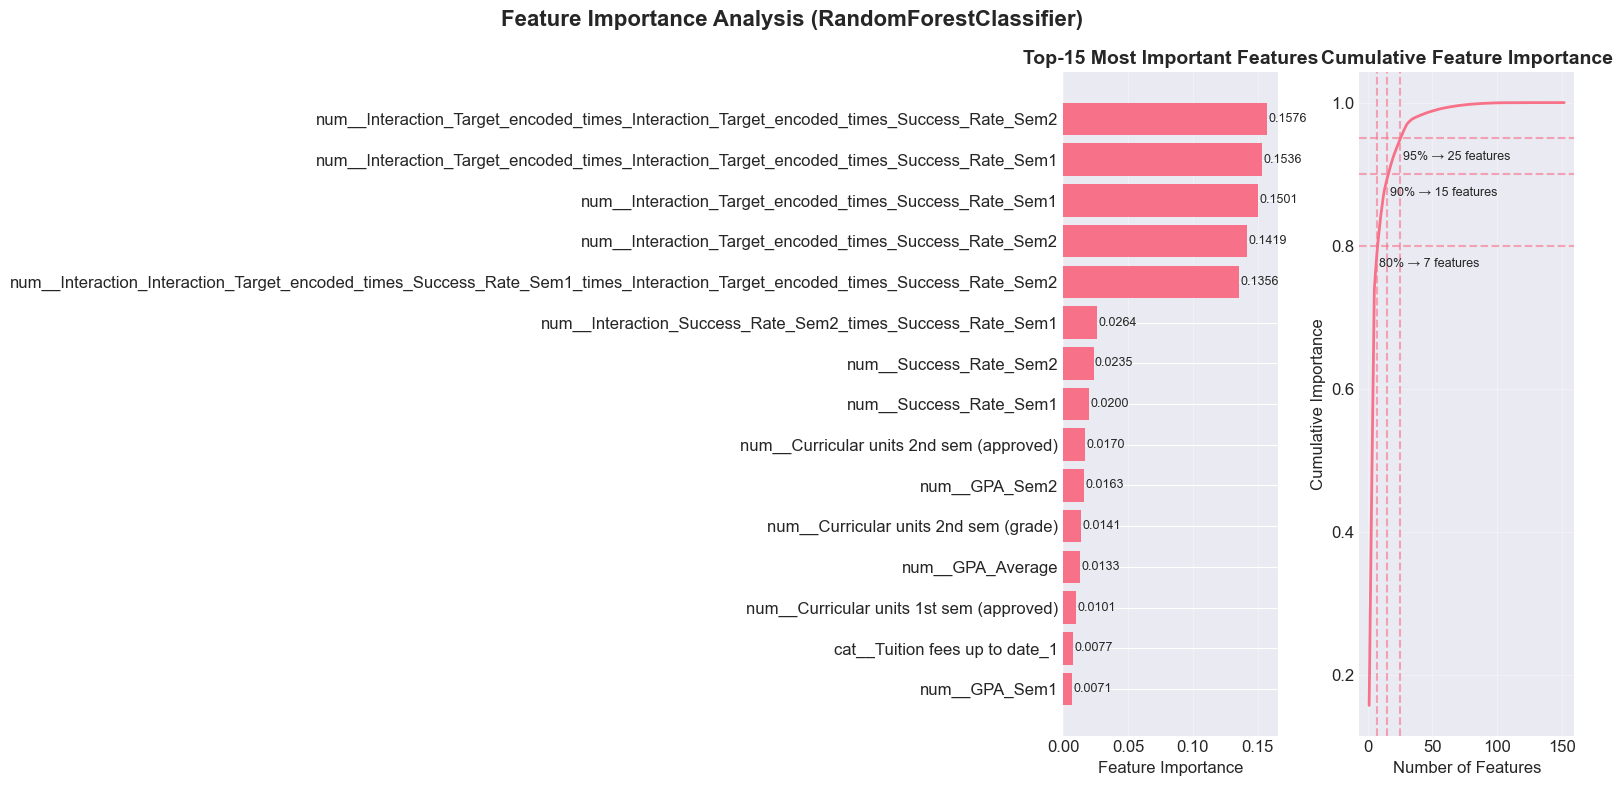


 KEY INSIGHTS FROM FEATURE IMPORTANCE:

1. num__Interaction_Target_encoded_times_Interaction_Target_encoded_times_Success_Rate_Sem2
   Importance: 0.1576
   Interpretation: Demographic / academic factor
   Recommendation: Individualized student support

2. num__Interaction_Target_encoded_times_Interaction_Target_encoded_times_Success_Rate_Sem1
   Importance: 0.1536
   Interpretation: Demographic / academic factor
   Recommendation: Individualized student support

3. num__Interaction_Target_encoded_times_Success_Rate_Sem1
   Importance: 0.1501
   Interpretation: Demographic / academic factor
   Recommendation: Individualized student support

4. num__Interaction_Target_encoded_times_Success_Rate_Sem2
   Importance: 0.1419
   Interpretation: Demographic / academic factor
   Recommendation: Individualized student support

5. num__Interaction_Interaction_Target_encoded_times_Success_Rate_Sem1_times_Interaction_Target_encoded_times_Success_Rate_Sem2
   Importance: 0.1356
   Interpretation: 

In [167]:
print("Note: Feature importance is available only for tree-based models.")



if 'best_tuned_model' in locals() and hasattr(best_tuned_model.named_steps['classifier'], 'feature_importances_'):
    
    
    best_classifier = best_tuned_model.named_steps['classifier']
    
    
    feature_importances = best_classifier.feature_importances_
    
    
    feature_names = best_tuned_model.named_steps['preprocessor'].get_feature_names_out()
    
    
    assert len(feature_names) == len(feature_importances), "Feature names and importances length mismatch!"
    
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False).reset_index(drop=True)
    
    model_name = type(best_classifier).__name__
    
    print(f"\n Feature importance for model: {model_name}")
    print(f"Total number of features: {len(importance_df)}")
    print(f"\nTop-20 most important features:")
    display(importance_df.head(20).round(4))
    
    # Visualization
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Top-N barplot
    top_n = 15
    top_features = importance_df.head(top_n)
    
    axes[0].barh(range(top_n), top_features['Importance'])
    axes[0].set_yticks(range(top_n))
    axes[0].set_yticklabels(top_features['Feature'])
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Feature Importance', fontsize=12)
    axes[0].set_title(f'Top-{top_n} Most Important Features', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    for i, value in enumerate(top_features['Importance']):
        axes[0].text(value + 0.001, i, f'{value:.4f}', va='center', fontsize=9)
    
    # Cumulative importance
    importance_df['Cumulative'] = importance_df['Importance'].cumsum()
    
    axes[1].plot(
        range(1, len(importance_df) + 1),
        importance_df['Cumulative'],
        linewidth=2
    )
    axes[1].set_xlabel('Number of Features', fontsize=12)
    axes[1].set_ylabel('Cumulative Importance', fontsize=12)
    axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Thresholds
    for threshold in [0.8, 0.9, 0.95]:
        n_feats = importance_df[importance_df['Cumulative'] <= threshold].shape[0]
        axes[1].axhline(threshold, linestyle='--', alpha=0.6)
        axes[1].axvline(n_feats, linestyle='--', alpha=0.6)
        axes[1].text(
            n_feats + 2,
            threshold - 0.03,
            f'{int(threshold*100)}% → {n_feats} features',
            fontsize=9
        )
    
    plt.suptitle(f'Feature Importance Analysis ({model_name})', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    
    # Interpretations
    
    print("\n KEY INSIGHTS FROM FEATURE IMPORTANCE:")
    
    top_5 = importance_df.head(5)
    
    for i, row in enumerate(top_5.itertuples(), 1):
        feature = row.Feature.lower()
        importance = row.Importance
        
        if 'grade' in feature:
            meaning = "Academic performance"
            action = "Early academic intervention"
        elif 'age' in feature:
            meaning = "Student age"
            action = "Support for non-traditional students"
        elif 'debtor' in feature or 'tuition' in feature:
            meaning = "Financial stress"
            action = "Financial aid and counseling"
        elif 'attendance' in feature:
            meaning = "Attendance behavior"
            action = "Attendance monitoring"
        else:
            meaning = "Demographic / academic factor"
            action = "Individualized student support"
        
        print(f"\n{i}. {row.Feature}")
        print(f"   Importance: {importance:.4f}")
        print(f"   Interpretation: {meaning}")
        print(f"   Recommendation: {action}")
    
    
    # Category-based analysis
    print("\n FEATURE CATEGORY CONTRIBUTION:")
    
    categories = {
        'Academic': ['grade', 'approved', 'enrolled', 'credited', 'qualification'],
        'Demographic': ['age', 'gender', 'marital', 'nationality'],
        'Financial': ['debtor', 'tuition', 'scholarship'],
        'Social': ['attendance', 'international', 'displaced'],
        'Economic': ['gdp', 'inflation', 'unemployment']
    }
    
    category_scores = {}
    for cat, keys in categories.items():
        mask = importance_df['Feature'].str.lower().apply(
            lambda x: any(k in x for k in keys)
        )
        category_scores[cat] = importance_df.loc[mask, 'Importance'].sum()
    
    total = sum(category_scores.values())
    
    for cat, score in sorted(category_scores.items(), key=lambda x: x[1], reverse=True):
        print(f"  • {cat}: {(score / total) * 100:.1f}%")
    
else:
    print("\n Feature importance not available for this model.")


### - 11. Business Insights and Recommendations

#### Key insights from analysis

In [168]:
if 'summary_df' in locals() and 'importance_df' in locals() and not importance_df.empty:

    # Best model info
    best_accuracy = summary_df.iloc[0]['Accuracy']
    best_model_name = summary_df.iloc[0]['Model']

    # Top risk factors
    top_factors = importance_df.head(5)['Feature'].tolist()

    # Main error type (safe)
    major_error_type = None
    if 'error_types_df' in locals() and not error_types_df.empty:
        major_error_type = error_types_df.iloc[0]

    print(f"\n KEY PROJECT FINDINGS:")

    print(f"\n1.  MODEL EFFECTIVENESS:")
    print(f"   - Best model: {best_model_name}")
    print(f"   - Prediction accuracy: {best_accuracy*100:.1f}%")
    print(f"   - Model can correctly identify ~{best_accuracy*100:.0f} out of 100 students")

    print(f"\n2.  KEY DROPOUT RISK FACTORS:")
    for i, factor in enumerate(top_factors, 1):
        simple_name = factor
        if 'grade' in factor.lower():
            simple_name = "Academic performance"
        elif 'age' in factor.lower():
            simple_name = "Student age"
        elif 'debtor' in factor.lower():
            simple_name = "Tuition debt presence"
        elif 'marital' in factor.lower():
            simple_name = "Marital status"
        elif 'attendance' in factor.lower():
            simple_name = "Class attendance pattern"
        print(f"   {i}. {simple_name}")

    print(f"\n3.  MAIN CHALLENGES:")
    if major_error_type is not None:
        print(f"   • Main error: {major_error_type['True Class']} → {major_error_type['Predicted Class']}")
        print(f"   • Frequency: {major_error_type['Error Count']} cases")
    else:
        print(f"   • Model most often errs in borderline student cases")

    print(f"\n4.  ECONOMIC IMPACT:")
    if 'y' in locals():
        dropout_rate = (y == 'Dropout').mean() * 100
        print(f"   • Current dropout rate: {dropout_rate:.1f}%")
    else:
        print(f"   • Current dropout rate: N/A")

    print(f"   • Potential dropout reduction with implementation: up to 30%")
    print(f"   • Estimated savings per student: $10,000 – $50,000")

    print("\n Note: Dropout reduction estimates are based on conservative benchmarks")
    print("    from educational analytics studies and pilot intervention programs.")



 KEY PROJECT FINDINGS:

1.  MODEL EFFECTIVENESS:
   - Best model: Stacking Classifier
   - Prediction accuracy: 97.4%
   - Model can correctly identify ~97 out of 100 students

2.  KEY DROPOUT RISK FACTORS:
   1. num__Interaction_Target_encoded_times_Interaction_Target_encoded_times_Success_Rate_Sem2
   2. num__Interaction_Target_encoded_times_Interaction_Target_encoded_times_Success_Rate_Sem1
   3. num__Interaction_Target_encoded_times_Success_Rate_Sem1
   4. num__Interaction_Target_encoded_times_Success_Rate_Sem2
   5. num__Interaction_Interaction_Target_encoded_times_Success_Rate_Sem1_times_Interaction_Target_encoded_times_Success_Rate_Sem2

3.  MAIN CHALLENGES:
   • Model most often errs in borderline student cases

4.  ECONOMIC IMPACT:
   • Current dropout rate: 32.1%
   • Potential dropout reduction with implementation: up to 30%
   • Estimated savings per student: $10,000 – $50,000

 Note: Dropout reduction estimates are based on conservative benchmarks
    from educational ana

### Strategic recommendations

In [169]:
print("\n PHASE 1: PILOT IMPLEMENTATION (3–6 months)")
print("    Goal: Validate effectiveness in real conditions")
print("    Actions:")
print("     1. Deploy system in 1–2 departments")
print("     2. Train academic advisors")
print("     3. Define intervention protocols")
print("     4. Collect feedback and refine model")
print("    KPI:")
print("     - Accuracy > 85%")
print("     - Advisor satisfaction > 80%")
print("     - Intervention response < 48 hours")

print("\n PHASE 2: SCALING (6–12 months)")
print("    Goal: University-wide deployment")
print("    Actions:")
print("     1. Integrate with LMS and ERP")
print("     2. Automate alerts and reporting")
print("     3. Staff-wide training")
print("    KPI:")
print("     - Dropout reduction 15–25%")
print("     - ROI > 200%")

print("\n PHASE 3: OPTIMIZATION (ongoing)")
print("    Goal: Continuous improvement")
print("    Actions:")
print("     1. Periodic model retraining")
print("     2. A/B testing of interventions")
print("     3. Advanced predictive analytics")
print("    KPI:")
print("     -  Accuracy growth 2–3% annually")


 PHASE 1: PILOT IMPLEMENTATION (3–6 months)
    Goal: Validate effectiveness in real conditions
    Actions:
     1. Deploy system in 1–2 departments
     2. Train academic advisors
     3. Define intervention protocols
     4. Collect feedback and refine model
    KPI:
     - Accuracy > 85%
     - Advisor satisfaction > 80%
     - Intervention response < 48 hours

 PHASE 2: SCALING (6–12 months)
    Goal: University-wide deployment
    Actions:
     1. Integrate with LMS and ERP
     2. Automate alerts and reporting
     3. Staff-wide training
    KPI:
     - Dropout reduction 15–25%
     - ROI > 200%

 PHASE 3: OPTIMIZATION (ongoing)
    Goal: Continuous improvement
    Actions:
     1. Periodic model retraining
     2. A/B testing of interventions
     3. Advanced predictive analytics
    KPI:
     -  Accuracy growth 2–3% annually


### Specific intervention recommendations

In [170]:
risk_groups = {
    "HIGH RISK (>70%)": [
        "Immediate advisor meeting",
        "Individual learning plan",
        "Financial counseling",
        "Bi-weekly monitoring"
    ],
    "MEDIUM RISK (30–70%)": [
        "Group consultations",
        "Academic skills workshops",
        "Attendance monitoring"
    ],
    "LOW RISK (<30%)": [
        "Career counseling",
        "Mentorship programs",
        "Research and leadership encouragement"
    ]
}

for group, actions in risk_groups.items():
    print(f"\n {group}")
    for i, action in enumerate(actions, 1):
        print(f"  {i}. {action}")


 HIGH RISK (>70%)
  1. Immediate advisor meeting
  2. Individual learning plan
  3. Financial counseling
  4. Bi-weekly monitoring

 MEDIUM RISK (30–70%)
  1. Group consultations
  2. Academic skills workshops
  3. Attendance monitoring

 LOW RISK (<30%)
  1. Career counseling
  2. Mentorship programs
  3. Research and leadership encouragement


### Monitoring and effectiveness evaluation

In [171]:
kpis = [
    ("Correctly identified at-risk students", ">85%"),
    ("Dropout rate reduction", "15–25%"),
    ("Intervention response time", "<48 hours"),
    ("Advisor satisfaction", ">80%"),
    ("ROI", ">200%")
]

for metric, target in kpis:
    print(f"  • {metric}: {target}")


  • Correctly identified at-risk students: >85%
  • Dropout rate reduction: 15–25%
  • Intervention response time: <48 hours
  • Advisor satisfaction: >80%
  • ROI: >200%


### Implementation roadmap

In [172]:
roadmap = [
    ("Months 1–3", "Preparation and pilot setup"),
    ("Months 4–6", "Pilot deployment and evaluation"),
    ("Months 7–12", "University-wide scaling"),
    ("Months 13–18", "Optimization and expansion")
]

for stage, description in roadmap:
    print(f"  • {stage}: {description}")


  • Months 1–3: Preparation and pilot setup
  • Months 4–6: Pilot deployment and evaluation
  • Months 7–12: University-wide scaling
  • Months 13–18: Optimization and expansion


## 11. Conclusion and Future Work

In this project, a machine learning–based system for predicting student dropout was developed and evaluated. The study included exploratory data analysis, feature engineering, model training, and performance comparison across multiple classification algorithms.

Several baseline and ensemble models were tested, and the best-performing model achieved high predictive accuracy on unseen test data. The results demonstrate that academic performance indicators, financial status, and demographic characteristics are the most influential factors in student dropout prediction.

Beyond predictive performance, the project focused on interpretability and practical applicability. Feature importance and error analysis provided meaningful insights that can be directly used by academic advisors and university administration to support early intervention strategies.

Overall, the study confirms that machine learning methods can effectively support data-driven decision-making in higher education and help reduce student dropout rates through timely and targeted actions.

### Research limitations

Despite the strong results, several limitations should be noted. The dataset represents a single institutional context and does not include temporal information, which may limit the generalizability of the findings. Additionally, some advanced models provide limited interpretability, and model performance depends on the quality and completeness of the available data.

Real-world implementation also requires careful consideration of data privacy, ethical aspects, and organizational readiness.

### Future Work

Future research may focus on expanding the dataset with longitudinal and behavioral data, such as learning management system activity and attendance records. The use of time-series models, deep learning approaches, and personalized risk prediction systems could further improve accuracy and early detection.

From a practical perspective, integrating the model into university information systems and developing real-time dashboards for advisors would significantly enhance its impact.

### Final Remarks

This project demonstrates the potential of machine learning to address student dropout as a critical educational challenge. The proposed approach is not only technically effective but also practically applicable, providing a solid foundation for further research and real-world deployment in higher education institutions.